In [48]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_rel
import pingouin

In [2]:
# Factor analysis in gpt3-human-nlp dir

In [2]:
expert1_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/Item_level_scores_Katarina.csv'
expert2_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/Item_level_scores_Veerle.csv'
self_report_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/self_report_unified.csv'
gpt4_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/expt_gpt-4-1106-preview.dep_list_phq9items_score_classify2_editted_unified.csv'

In [3]:
expert1_df = pd.read_csv(expert1_file)
expert2_df = pd.read_csv(expert2_file)
self_report_df = pd.read_csv(self_report_file)
gpt4_df = pd.read_csv(gpt4_file)

In [4]:
gpt4_df.columns

Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation',
       'spans_Anhedonia', 'spans_Depressed_Mood',
       'spans_Insomnia_or_Hypersomnia', 'spans_Fatigue',
       'spans_Poor_appetite_or_overeating', 'spans_Worthlessness_or_Guilt',
       'spans_Difficulty_concentrating',
       'spans_Psychomotor_agitation_or_retardation', 'spans_Suicidal_ideation',
       'isInferred_Anhedonia', 'isInferred_Depressed_Mood',
       'isInferred_Insomnia_or_Hypersomnia', 'isInferred_Fatigue',
       'isInferred_Poor_appetite_or_overeating',
       'isInferred_Worthlessness_or_Guilt',
       'isInferred_Difficulty_concentrating',
       'isInferred_Psychomotor_agitation_or_retardation',
       'isInferred_Suicidal_ideation'],
    

In [5]:
self_report_df.columns

Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation',
       'score_Suicidal_ideation'],
      dtype='object')

In [6]:
expert1_df.columns

Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation',
       'spans_Anhedonia', 'spans_Depressed_Mood',
       'spans_Insomnia_or_Hypersomnia', 'spans_Fatigue',
       'spans_Poor_appetite_or_overeating', 'spans_Worthlessness_or_Guilt',
       'spans_Difficulty_concentrating',
       'spans_Psychomotor_agitation_or_retardation',
       'spans_Suicidal_ideation'],
      dtype='object')

In [7]:
expert2_df.columns

Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation',
       'spans_Anhedonia', 'spans_Depressed_Mood',
       'spans_Insomnia_or_Hypersomnia', 'spans_Fatigue',
       'spans_Poor_appetite_or_overeating', 'spans_Worthlessness_or_Guilt',
       'spans_Difficulty_concentrating',
       'spans_Psychomotor_agitation_or_retardation',
       'spans_Suicidal_ideation'],
      dtype='object')

In [8]:
score_columns = ['score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation']

In [9]:
gpt4_df[gpt4_df.isInferred_Depressed_Mood==1]['spans_Depressed_Mood'].str.startswith('[').sum()

9

In [10]:
gpt4_df[score_columns].isna().sum(1).value_counts(), self_report_df[score_columns].isna().sum(1).value_counts()

(0    955
 dtype: int64,
 0    963
 dtype: int64)

In [11]:
expert1_df[score_columns].isna().sum(1).value_counts(), expert2_df[score_columns].isna().sum(1).value_counts()

(0    184
 1     23
 2      2
 dtype: int64,
 0    208
 1      1
 dtype: int64)

In [12]:
expert1_df = expert1_df.fillna(0)
expert2_df = expert2_df.fillna(0)

## Correlations

In [13]:
gpt4_expert1_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert1_df[['user_id', col_name]], gpt4_df[['user_id', col_name]], on='user_id', suffixes=('_expert1', '_gpt4'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, gpt4_scores = temp[col_name+'_expert1'], temp[col_name+'_gpt4']
    pearson_score, p_val = pearsonr(expert_scores, gpt4_scores)
    gpt4_expert1_item_corr.append((col_name, round(pearson_score, 2), round(p_val, 3), len(expert_scores)))
pd.DataFrame(gpt4_expert1_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia           0.67  0.000  209
1                        score_Depressed_Mood           0.79  0.000  209
2               score_Insomnia_or_Hypersomnia           0.67  0.000  209
3                               score_Fatigue           0.63  0.000  209
4           score_Poor_appetite_or_overeating           0.44  0.000  209
5                score_Worthlessness_or_Guilt           0.67  0.000  209
6              score_Difficulty_concentrating           0.59  0.000  209
7  score_Psychomotor_agitation_or_retardation           0.18  0.007  209
8                     score_Suicidal_ideation           0.64  0.000  209

In [14]:
gpt4_expert2_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert2_df[['user_id', col_name]], gpt4_df[['user_id', col_name]], on='user_id', suffixes=('_expert1', '_gpt4'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, gpt4_scores = temp[col_name+'_expert1'], temp[col_name+'_gpt4']
    pearson_score, p_val = pearsonr(expert_scores, gpt4_scores)
    gpt4_expert2_item_corr.append((col_name, round(pearson_score, 2), round(p_val, 3), len(expert_scores)))
pd.DataFrame(gpt4_expert2_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia           0.63    0.0  209
1                        score_Depressed_Mood           0.83    0.0  209
2               score_Insomnia_or_Hypersomnia           0.70    0.0  209
3                               score_Fatigue           0.73    0.0  209
4           score_Poor_appetite_or_overeating           0.54    0.0  209
5                score_Worthlessness_or_Guilt           0.73    0.0  209
6              score_Difficulty_concentrating           0.64    0.0  209
7  score_Psychomotor_agitation_or_retardation           0.43    0.0  209
8                     score_Suicidal_ideation           0.62    0.0  209

In [15]:
sr_expert1_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert1_df[['user_id', col_name]], self_report_df[['user_id', col_name]], on='user_id', suffixes=('_expert1', '_sr'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, sr_scores = temp[col_name+'_expert1'], temp[col_name+'_sr']
    pearson_score, p_val = pearsonr(expert_scores, sr_scores)
    sr_expert1_item_corr.append((col_name, round(pearson_score, 3), round(p_val, 3), len(expert_scores)))
expert1_total_phq = pd.concat([expert1_df['user_id'], expert1_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
sr_total_phq = pd.concat([self_report_df['user_id'], self_report_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
temp = pd.merge(expert1_total_phq, sr_total_phq, on='user_id', suffixes=('_expert1', '_sr'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, sr_scores = temp['total_phq_expert1'], temp['total_phq_sr']
pearson_score, p_val = pearsonr(expert_scores, sr_scores)
sr_expert1_item_corr.append(('total_phq', round(pearson_score, 3), round(p_val, 3), len(expert_scores)))
pd.DataFrame(sr_expert1_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia          0.551  0.000  209
1                        score_Depressed_Mood          0.623  0.000  209
2               score_Insomnia_or_Hypersomnia          0.408  0.000  209
3                               score_Fatigue          0.491  0.000  209
4           score_Poor_appetite_or_overeating          0.375  0.000  209
5                score_Worthlessness_or_Guilt          0.504  0.000  209
6              score_Difficulty_concentrating          0.418  0.000  209
7  score_Psychomotor_agitation_or_retardation          0.108  0.118  209
8                     score_Suicidal_ideation          0.224  0.001  209
9                                   total_phq          0.681  0.000  209

In [16]:
sr_expert2_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert2_df[['user_id', col_name]], self_report_df[['user_id', col_name]], on='user_id', suffixes=('_expert1', '_sr'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, sr_scores = temp[col_name+'_expert1'], temp[col_name+'_sr']
    pearson_score, p_val = pearsonr(expert_scores, sr_scores)
    sr_expert2_item_corr.append((col_name, round(pearson_score, 3), round(p_val, 3), len(expert_scores)))
expert2_total_phq = pd.concat([expert1_df['user_id'], expert1_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
sr_total_phq = pd.concat([self_report_df['user_id'], self_report_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
temp = pd.merge(expert2_total_phq, sr_total_phq, on='user_id', suffixes=('_expert1', '_sr'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, sr_scores = temp['total_phq_expert1'], temp['total_phq_sr']
pearson_score, p_val = pearsonr(expert_scores, sr_scores)
sr_expert2_item_corr.append(('total_phq', round(pearson_score, 3), round(p_val, 3), len(expert_scores)))
pd.DataFrame(sr_expert2_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia          0.566  0.000  209
1                        score_Depressed_Mood          0.695  0.000  209
2               score_Insomnia_or_Hypersomnia          0.507  0.000  209
3                               score_Fatigue          0.566  0.000  209
4           score_Poor_appetite_or_overeating          0.490  0.000  209
5                score_Worthlessness_or_Guilt          0.549  0.000  209
6              score_Difficulty_concentrating          0.481  0.000  209
7  score_Psychomotor_agitation_or_retardation          0.181  0.009  209
8                     score_Suicidal_ideation          0.381  0.000  209
9                                   total_phq          0.681  0.000  209

In [17]:
# Average both pearson_score columns
sr_expert1_item_corr_df =  pd.DataFrame(sr_expert1_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])
sr_expert2_item_corr_df =  pd.DataFrame(sr_expert2_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

avg_pearson_score = (sr_expert1_item_corr_df['pearson_score'] + sr_expert2_item_corr_df['pearson_score'])/2
avg_sr_experts_item_corr_df = pd.concat([sr_expert1_item_corr_df[['item', 'n']], avg_pearson_score], axis=1)
avg_sr_experts_item_corr_df.round(2)

item    n  pearson_score
0                             score_Anhedonia  209           0.56
1                        score_Depressed_Mood  209           0.66
2               score_Insomnia_or_Hypersomnia  209           0.46
3                               score_Fatigue  209           0.53
4           score_Poor_appetite_or_overeating  209           0.43
5                score_Worthlessness_or_Guilt  209           0.53
6              score_Difficulty_concentrating  209           0.45
7  score_Psychomotor_agitation_or_retardation  209           0.14
8                     score_Suicidal_ideation  209           0.30
9                                   total_phq  209           0.68

In [18]:
expert1_df.columns, self_report_df.columns

(Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
        'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
        'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
        'score_Difficulty_concentrating',
        'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation',
        'spans_Anhedonia', 'spans_Depressed_Mood',
        'spans_Insomnia_or_Hypersomnia', 'spans_Fatigue',
        'spans_Poor_appetite_or_overeating', 'spans_Worthlessness_or_Guilt',
        'spans_Difficulty_concentrating',
        'spans_Psychomotor_agitation_or_retardation',
        'spans_Suicidal_ideation'],
       dtype='object'),
 Index(['user_id', 'user_text', 'score_Anhedonia', 'score_Depressed_Mood',
        'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
        'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
        'score_Difficulty_concentrating',
        'score_Psychomotor_agitation_or_retardation',
        'score_Suic

In [19]:
# Correlate expert scores with self report
self_report_expert1_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert1_df[['user_id', col_name]], self_report_df[['user_id', col_name]], on='user_id', suffixes=('_expert1', '_self_report'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, self_report_scores = temp[col_name+'_expert1'], temp[col_name+'_self_report']
    pearson_score, p_val = pearsonr(expert_scores, self_report_scores)
    self_report_expert1_item_corr.append((col_name, round(pearson_score, 2), round(p_val, 3), len(expert_scores)))

# calculate the correlation between phq9 total between expert1 and self report
expert1_df_temp = expert1_df.copy()
expert1_df_temp['phq9_total'] = expert1_df_temp[score_columns].sum(1)
self_report_df_temp = self_report_df.copy()
self_report_df_temp['phq9_total'] = self_report_df_temp[score_columns].sum(1)
temp = pd.merge(expert1_df_temp[['user_id', 'phq9_total']], self_report_df_temp[['user_id', 'phq9_total']], on='user_id', suffixes=('_expert1', '_self_report'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, self_report_scores = temp['phq9_total_expert1'], temp['phq9_total_self_report']
pearson_score, p_val = pearsonr(expert_scores, self_report_scores)
self_report_expert1_item_corr.append(('phq9_total', round(pearson_score, 2), round(p_val, 3), len(expert_scores)))

pd.DataFrame(self_report_expert1_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia           0.55  0.000  209
1                        score_Depressed_Mood           0.62  0.000  209
2               score_Insomnia_or_Hypersomnia           0.41  0.000  209
3                               score_Fatigue           0.49  0.000  209
4           score_Poor_appetite_or_overeating           0.38  0.000  209
5                score_Worthlessness_or_Guilt           0.50  0.000  209
6              score_Difficulty_concentrating           0.42  0.000  209
7  score_Psychomotor_agitation_or_retardation           0.11  0.118  209
8                     score_Suicidal_ideation           0.22  0.001  209
9                                  phq9_total           0.68  0.000  209

In [20]:
self_report_expert2_item_corr = []
for col_name in score_columns:
    temp = pd.merge(expert2_df[['user_id', col_name]], self_report_df[['user_id', col_name]], on='user_id', suffixes=('_expert2', '_self_report'))
    temp = temp[temp.isna().sum(1)==0]
    expert_scores, self_report_scores = temp[col_name+'_expert2'], temp[col_name+'_self_report']
    pearson_score, p_val = pearsonr(expert_scores, self_report_scores)
    self_report_expert2_item_corr.append((col_name, round(pearson_score, 2), round(p_val, 3), len(expert_scores)))

# calculate the correlation between phq9 total between expert2 and self report
expert2_df_temp = expert2_df.copy()
expert2_df_temp['phq9_total'] = expert2_df_temp[score_columns].sum(1)
self_report_df_temp = self_report_df.copy()
self_report_df_temp['phq9_total'] = self_report_df_temp[score_columns].sum(1)
temp = pd.merge(expert2_df_temp[['user_id', 'phq9_total']], self_report_df_temp[['user_id', 'phq9_total']], on='user_id', suffixes=('_expert2', '_self_report'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, self_report_scores = temp['phq9_total_expert2'], temp['phq9_total_self_report']
pearson_score, p_val = pearsonr(expert_scores, self_report_scores)
self_report_expert2_item_corr.append(('phq9_total', round(pearson_score, 2), round(p_val, 3), len(expert_scores)))


pd.DataFrame(self_report_expert2_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia           0.57  0.000  209
1                        score_Depressed_Mood           0.69  0.000  209
2               score_Insomnia_or_Hypersomnia           0.51  0.000  209
3                               score_Fatigue           0.57  0.000  209
4           score_Poor_appetite_or_overeating           0.49  0.000  209
5                score_Worthlessness_or_Guilt           0.55  0.000  209
6              score_Difficulty_concentrating           0.48  0.000  209
7  score_Psychomotor_agitation_or_retardation           0.18  0.009  209
8                     score_Suicidal_ideation           0.38  0.000  209
9                                  phq9_total           0.68  0.000  209

In [21]:
# Correlate self-report with gpt4 only for expert annotated user_ids
gpt4_self_report_item_corr = []
for col_name in score_columns:
    temp = pd.merge(self_report_df[['user_id', col_name]], gpt4_df[['user_id', col_name]], on='user_id', suffixes=('_self_report', '_gpt4'))
    temp = temp[temp.isna().sum(1)==0]
    temp = temp[temp.user_id.isin(expert1_df.user_id)]
    self_report_scores, gpt4_scores = temp[col_name+'_self_report'], temp[col_name+'_gpt4']
    pearson_score, p_val = pearsonr(self_report_scores, gpt4_scores)
    gpt4_self_report_item_corr.append((col_name, round(pearson_score, 2), round(p_val, 3), len(self_report_scores)))
pd.DataFrame(gpt4_self_report_item_corr, columns=['item', 'pearson_score', 'p_val', 'n'])

item  pearson_score  p_val    n
0                             score_Anhedonia           0.59  0.000  209
1                        score_Depressed_Mood           0.69  0.000  209
2               score_Insomnia_or_Hypersomnia           0.54  0.000  209
3                               score_Fatigue           0.59  0.000  209
4           score_Poor_appetite_or_overeating           0.43  0.000  209
5                score_Worthlessness_or_Guilt           0.50  0.000  209
6              score_Difficulty_concentrating           0.48  0.000  209
7  score_Psychomotor_agitation_or_retardation           0.23  0.001  209
8                     score_Suicidal_ideation           0.31  0.000  209

In [41]:
# Bootstrapped resampling of expert1, expert2, gpt and sr scores over 500 trials
# Compute Avg(r(expert1, gpt4), r(expert2, gpt4)), Avg(r(expert1, sr), r(expert2, sr)), r(sr, gpt4) for each trial
np.random.seed(42)

avg_gpt4_expert_corr = []
avg_sr_expert_corr = []
sr_gpt4_corr = []
num_trials=500

for trial in range(num_trials):
    user_ids = np.random.choice(expert1_df.user_id, len(expert1_df.user_id), replace=True)
    expert1_df_temp = expert1_df.set_index('user_id').loc[user_ids]
    expert2_df_temp = expert2_df.set_index('user_id').loc[user_ids]
    sr_df_temp = self_report_df.set_index('user_id').loc[user_ids]
    gpt4_df_temp = gpt4_df.set_index('user_id').loc[user_ids]
    
    temp_avg_gpt4_expert_corr = []
    temp_avg_sr_expert_corr = []
    temp_sr_gpt4_corr = []
    for column in score_columns:
        temp = pd.merge(expert1_df_temp[[column]], gpt4_df_temp[[column]], on='user_id', suffixes=('_expert1', '_gpt4'))
        temp = temp[temp.isna().sum(1)==0]
        expert1_scores, gpt4_scores = temp[column+'_expert1'], temp[column+'_gpt4']
        pearson_score1, p_val1 = pearsonr(expert1_scores, gpt4_scores)
        
        temp = pd.merge(expert2_df_temp[[column]], gpt4_df_temp[[column]], on='user_id', suffixes=('_expert2', '_gpt4'))
        temp = temp[temp.isna().sum(1)==0]
        expert2_scores, gpt4_scores = temp[column+'_expert2'], temp[column+'_gpt4']
        pearson_score2, p_val2 = pearsonr(expert2_scores, gpt4_scores)
        
        pearson_score = (pearson_score1 + pearson_score2)/2
        p_val = 2*p_val1*p_val2/(p_val1+p_val2)
        temp_avg_gpt4_expert_corr.append((pearson_score, p_val))
         
        temp = pd.merge(expert1_df_temp[[column]], sr_df_temp[[column]], on='user_id', suffixes=('_expert1', '_sr'))
        temp = temp[temp.isna().sum(1)==0]
        expert1_scores, sr_scores = temp[column+'_expert1'], temp[column+'_sr']
        pearson_score1, p_val1 = pearsonr(expert1_scores, sr_scores)
                
        temp = pd.merge(expert2_df_temp[[column]], sr_df_temp[[column]], on='user_id', suffixes=('_expert2', '_sr'))
        temp = temp[temp.isna().sum(1)==0]
        expert2_scores, sr_scores = temp[column+'_expert2'], temp[column+'_sr']
        pearson_score2, p_val2 = pearsonr(expert2_scores, sr_scores)
        
        pearson_score = (pearson_score1 + pearson_score2)/2
        p_val = 2*p_val1*p_val2/(p_val1+p_val2)
        temp_avg_sr_expert_corr.append((pearson_score, p_val))
        
        temp = pd.merge(sr_df_temp[[column]], gpt4_df_temp[[column]], on='user_id', suffixes=('_sr', '_gpt4'))
        temp = temp[temp.isna().sum(1)==0]
        pearson_score, p_val = pearsonr(temp[column+'_sr'], temp[column+'_gpt4'])
        temp_sr_gpt4_corr.append((pearson_score, p_val))

    # Compute the correlation for total phq9 score by summing the individual scores
    expert1_totalPHQ_df = pd.DataFrame(expert1_df_temp[score_columns].sum(1), columns=['total_phq'])
    expert2_totalPHQ_df = pd.DataFrame(expert2_df_temp[score_columns].sum(1), columns=['total_phq'])
    sr_totalPHQ_df = pd.DataFrame(sr_df_temp[score_columns].sum(1), columns=['total_phq'])
    gpt4_totalPHQ_df = pd.DataFrame(gpt4_df_temp[score_columns].sum(1), columns=['total_phq'])
    
    temp = pd.merge(expert1_totalPHQ_df, gpt4_totalPHQ_df, on='user_id', suffixes=('_expert1', '_gpt4'))
    pearson_score1, p_val1 = pearsonr(temp['total_phq_expert1'], temp['total_phq_gpt4'])
    temp = pd.merge(expert1_totalPHQ_df, gpt4_totalPHQ_df, on='user_id', suffixes=('_expert2', '_gpt4'))
    pearson_score2, p_val2 = pearsonr(temp['total_phq_expert2'], temp['total_phq_gpt4'])
    pearson_score = (pearson_score1 + pearson_score2)/2
    p_val = 2*p_val1*p_val2/(p_val1+p_val2)
    temp_avg_gpt4_expert_corr.append((pearson_score, p_val))
    
    temp = pd.merge(expert1_totalPHQ_df, sr_totalPHQ_df, on='user_id', suffixes=('_expert1', '_sr'))
    pearson_score1, p_val1 = pearsonr(temp['total_phq_expert1'], temp['total_phq_sr'])
    temp = pd.merge(expert1_totalPHQ_df, sr_totalPHQ_df, on='user_id', suffixes=('_expert2', '_sr'))
    pearson_score2, p_val2 = pearsonr(temp['total_phq_expert2'], temp['total_phq_sr'])
    pearson_score = (pearson_score1 + pearson_score2)/2
    p_val = 2*p_val1*p_val2/(p_val1+p_val2)
    temp_avg_sr_expert_corr.append((pearson_score, p_val))
    
    temp = pd.merge(sr_totalPHQ_df, gpt4_totalPHQ_df, on='user_id', suffixes=('_sr', '_gpt4'))
    pearson_score, p_val = pearsonr(temp['total_phq_sr'], temp['total_phq_gpt4'])
    temp_sr_gpt4_corr.append((pearson_score, p_val))
    
    avg_gpt4_expert_corr.append(temp_avg_gpt4_expert_corr)
    avg_sr_expert_corr.append(temp_avg_sr_expert_corr)
    sr_gpt4_corr.append(temp_sr_gpt4_corr)

In [42]:
# Compute the p value for two different NULL hypotheses
# NULL 1: AVG(r(expert1, gpt4), r(expert2, gpt4))  <= AVG(r(expert1, sr), r(expert2, sr))
# NULL 2: r(sr, gpt4) < AVG(r(expert1, sr), r(expert2, sr))

p_val_null1 = [0]*10
p_val_null2 = [0]*10
for trial in range(num_trials):
    for i in range(len(score_columns)+1):
        p_val_null1[i] += 1 if avg_gpt4_expert_corr[trial][i][0] <= avg_sr_expert_corr[trial][i][0] else 0 
        p_val_null2[i] += 1 if sr_gpt4_corr[trial][i][0] < avg_sr_expert_corr[trial][i][0] else 0

p_val_null1 = [p/num_trials for p in p_val_null1]
p_val_null2 = [p/num_trials for p in p_val_null2]

# Create a dataframe to store the results, with rows as items from PHQ9 and total PHQ9 score, columns for the two hypothesis p value
p_val_df = pd.DataFrame([p_val_null1, p_val_null2], columns=score_columns+['total_phq'], index=['p_val_null1', 'p_val_null2'])
p_val_df.T

p_val_null1  p_val_null2
score_Anhedonia                                   0.080        0.314
score_Depressed_Mood                              0.024        0.258
score_Insomnia_or_Hypersomnia                     0.018        0.126
score_Fatigue                                     0.022        0.148
score_Poor_appetite_or_overeating                 0.226        0.476
score_Worthlessness_or_Guilt                      0.024        0.642
score_Difficulty_concentrating                    0.046        0.324
score_Psychomotor_agitation_or_retardation        0.034        0.184
score_Suicidal_ideation                           0.006        0.408
total_phq                                         0.088        0.292

In [58]:
from scipy.stats import t

In [67]:
"""
yfinalpred_res_abs = absolute(array(ytrue) - array(ypred))
yconpred_res_abs = absolute(array(ytrue) - array(yconpred))
yfcra_diff = yfinalpred_res_abs - yconpred_res_abs
yfcra_diff_mean, yfcra_sd = mean(yfcra_diff), std(yfcra_diff)
yfcra_diff_t = yfcra_diff_mean / (yfcra_sd / sqrt(n))
yfcra_diff_p = t.sf(np.abs(yfcra_diff_t), n-1)
"""
for symptom_col in score_columns:
    temp_exp1_gpt4 = pd.merge(gpt4_df[['user_id', symptom_col]], expert1_df[['user_id', symptom_col]], on='user_id', suffixes=('_expert1', '_gpt4'))
    temp_exp1_gpt4 = temp_exp1_gpt4[temp_exp1_gpt4.isna().sum(1)==0]
    expert1_scores, gpt4_scores = temp_exp1_gpt4[symptom_col+'_expert1'], temp_exp1_gpt4[symptom_col+'_gpt4']
    
    temp_exp2_gpt4 = pd.merge(gpt4_df[['user_id', symptom_col]], expert2_df[['user_id', symptom_col]], on='user_id', suffixes=('_expert2', '_gpt4'))
    temp_exp2_gpt4 = temp_exp2_gpt4[temp_exp2_gpt4.isna().sum(1)==0]
    expert2_scores, gpt4_scores = temp_exp2_gpt4[symptom_col+'_expert2'], temp_exp2_gpt4[symptom_col+'_gpt4']
    
    avg_diff_exp_gpt4 = (np.abs(expert1_scores - gpt4_scores) + np.abs(expert2_scores - gpt4_scores))/2 
    
    temp_gpt4_sr = pd.merge(gpt4_df[['user_id', symptom_col]], self_report_df[['user_id', symptom_col]], on='user_id', suffixes=('_gpt4', '_sr'))
    temp_gpt4_sr = temp_gpt4_sr[(temp_gpt4_sr.isna().sum(1)==0) & (temp_gpt4_sr.user_id.isin(expert1_df.user_id))]
    gpt4_scores, sr_scores = temp_gpt4_sr[symptom_col+'_gpt4'], temp_gpt4_sr[symptom_col+'_sr']
    
    diff_gpt4_sr = np.abs(gpt4_scores - sr_scores)
    
    diff = avg_diff_exp_gpt4 - diff_gpt4_sr
    
    diff_mean, diff_sd = np.mean(diff), np.std(diff)
    diff_t = diff_mean / (diff_sd / np.sqrt(len(diff)))
    diff_p = t.sf(np.abs(diff_t), len(diff)-1)
    
    print (symptom_col, diff_mean, diff_sd, diff_t, diff_p)

# Perform the same for total phq9 score
exp1_total_phq = pd.concat([expert1_df['user_id'], expert1_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
exp2_total_phq = pd.concat([expert2_df['user_id'], expert2_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
gpt4_total_phq = pd.concat([gpt4_df['user_id'], gpt4_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
sr_total_phq = pd.concat([self_report_df['user_id'], self_report_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})

temp_exp1_gpt4 = pd.merge(gpt4_total_phq[['user_id', 'total_phq']], expert1_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_expert1', '_gpt4'))
temp_exp1_gpt4 = temp_exp1_gpt4[temp_exp1_gpt4.isna().sum(1)==0]
expert1_scores, gpt4_scores = temp_exp1_gpt4['total_phq_expert1'], temp_exp1_gpt4['total_phq_gpt4']

temp_exp2_gpt4 = pd.merge(gpt4_total_phq[['user_id', 'total_phq']], expert2_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_expert2', '_gpt4'))
temp_exp2_gpt4 = temp_exp2_gpt4[temp_exp2_gpt4.isna().sum(1)==0]
expert2_scores, gpt4_scores = temp_exp2_gpt4['total_phq_expert2'], temp_exp2_gpt4['total_phq_gpt4']

avg_diff_exp_gpt4 = (np.abs(expert1_scores - gpt4_scores) + np.abs(expert2_scores - gpt4_scores))/2

temp_gpt4_sr = pd.merge(gpt4_total_phq[['user_id', 'total_phq']], sr_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_gpt4', '_sr'))
temp_gpt4_sr = temp_gpt4_sr[(temp_gpt4_sr.isna().sum(1)==0) & (temp_gpt4_sr.user_id.isin(expert1_df.user_id))]
gpt4_scores, sr_scores = temp_gpt4_sr['total_phq_gpt4'], temp_gpt4_sr['total_phq_sr']

diff_gpt4_sr = np.abs(gpt4_scores - sr_scores)

diff = avg_diff_exp_gpt4 - diff_gpt4_sr

diff_mean, diff_sd = np.mean(diff), np.std(diff)
diff_t = diff_mean / (diff_sd / np.sqrt(len(diff)))
diff_p = t.sf(np.abs(diff_t), len(diff)-1)

print ('total_phq', diff_mean, diff_sd, diff_t, diff_p)

score_Anhedonia -0.07692307692307693 0.72975638311578 -2.0520991962161843 0.02042416002127254
score_Depressed_Mood 0.0 0.7510676161988108 0.0 0.5
score_Insomnia_or_Hypersomnia -0.28205128205128205 0.8755574912289165 -6.271378531012563 4.893896443168733e-10
score_Fatigue -0.5641025641025641 0.9280492856848134 -11.833320789872573 5.323353111022943e-28
score_Poor_appetite_or_overeating -0.358974358974359 0.8316551148834285 -8.40310462272012 4.464546645981126e-16
score_Worthlessness_or_Guilt -0.23076923076923078 0.9187934803676368 -4.889670592654776 7.481632720003533e-07
score_Difficulty_concentrating -0.05128205128205128 0.9593993299420362 -1.0406042200842465 0.1493621952919064
score_Psychomotor_agitation_or_retardation -0.10256410256410256 0.9817533189270076 -2.0338204561912114 0.0213337933185426
score_Suicidal_ideation -0.02564102564102564 0.6975113081402796 -0.7156550580846623 0.23732309822950548
total_phq -2.076923076923077 4.128603261578756 -9.793476048271973 1.2400785028327229e-20


In [68]:
# Perform the same ttest for avg(experts, self-report) and gpt4-self-report agreements

for symptom_col in score_columns:
    temp_exp1_sr = pd.merge(self_report_df[['user_id', symptom_col]], expert1_df[['user_id', symptom_col]], on='user_id', suffixes=('_sr', '_expert1'))
    temp_exp1_sr = temp_exp1_sr[temp_exp1_sr.isna().sum(1)==0]
    expert1_scores, sr_scores = temp_exp1_sr[symptom_col+'_expert1'], temp_exp1_sr[symptom_col+'_sr']
    
    temp_exp2_sr = pd.merge(self_report_df[['user_id', symptom_col]], expert2_df[['user_id', symptom_col]], on='user_id', suffixes=('_sr', '_expert2'))
    temp_exp2_sr = temp_exp2_sr[temp_exp2_sr.isna().sum(1)==0]
    expert2_scores, sr_scores = temp_exp2_sr[symptom_col+'_expert2'], temp_exp2_sr[symptom_col+'_sr']
    
    avg_diff_exp_sr = (np.abs(expert1_scores - sr_scores) + np.abs(expert2_scores - sr_scores))/2 
    
    temp_gpt4_sr = pd.merge(gpt4_df[['user_id', symptom_col]], self_report_df[['user_id', symptom_col]], on='user_id', suffixes=('_gpt4', '_sr'))
    temp_gpt4_sr = temp_gpt4_sr[(temp_gpt4_sr.isna().sum(1)==0) & (temp_gpt4_sr.user_id.isin(expert1_df.user_id))]
    gpt4_scores, sr_scores = temp_gpt4_sr[symptom_col+'_gpt4'], temp_gpt4_sr[symptom_col+'_sr']
    
    diff_gpt4_sr = np.abs(gpt4_scores - sr_scores)
    
    diff = avg_diff_exp_sr - diff_gpt4_sr
    
    diff_mean, diff_sd = np.mean(diff), np.std(diff)
    diff_t = diff_mean / (diff_sd / np.sqrt(len(diff)))
    diff_p = t.sf(np.abs(diff_t), len(diff)-1)
    
    print (symptom_col, diff_mean, diff_sd, diff_t, diff_p)

# Perform the same for total phq9 score
exp1_total_phq = pd.concat([expert1_df['user_id'], expert1_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
exp2_total_phq = pd.concat([expert2_df['user_id'], expert2_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
gpt4_total_phq = pd.concat([gpt4_df['user_id'], gpt4_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})
sr_total_phq = pd.concat([self_report_df['user_id'], self_report_df[score_columns].sum(1)], axis=1).rename(columns={0: 'total_phq'})

temp_exp1_sr = pd.merge(sr_total_phq[['user_id', 'total_phq']], expert1_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_sr', '_expert1'))
temp_exp1_sr = temp_exp1_sr[temp_exp1_sr.isna().sum(1)==0]
expert1_scores, sr_scores = temp_exp1_sr['total_phq_expert1'], temp_exp1_sr['total_phq_sr']

temp_exp2_sr = pd.merge(sr_total_phq[['user_id', 'total_phq']], expert2_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_sr', '_expert2'))
temp_exp2_sr = temp_exp2_sr[temp_exp2_sr.isna().sum(1)==0]
expert2_scores, sr_scores = temp_exp2_sr['total_phq_expert2'], temp_exp2_sr['total_phq_sr']

avg_diff_exp_sr = (np.abs(expert1_scores - sr_scores) + np.abs(expert2_scores - sr_scores))/2

temp_gpt4_sr = pd.merge(gpt4_total_phq[['user_id', 'total_phq']], sr_total_phq[['user_id', 'total_phq']], on='user_id', suffixes=('_gpt4', '_sr'))
temp_gpt4_sr = temp_gpt4_sr[(temp_gpt4_sr.isna().sum(1)==0) & (temp_gpt4_sr.user_id.isin(expert1_df.user_id))]
gpt4_scores, sr_scores = temp_gpt4_sr['total_phq_gpt4'], temp_gpt4_sr['total_phq_sr']

diff_gpt4_sr = np.abs(gpt4_scores - sr_scores)

diff = avg_diff_exp_sr - diff_gpt4_sr

diff_mean, diff_sd = np.mean(diff), np.std(diff)
diff_t = diff_mean / (diff_sd / np.sqrt(len(diff)))
diff_p = t.sf(np.abs(diff_t), len(diff)-1)

print ('total_phq', diff_mean, diff_sd, diff_t, diff_p)

score_Anhedonia 0.14102564102564102 0.9469838621856098 2.8991795279844035 0.0019798695186888974
score_Depressed_Mood 0.1794871794871795 0.8045318712685761 4.3431995611102465 9.030419107770903e-06
score_Insomnia_or_Hypersomnia 0.19230769230769232 0.9101661204768638 4.113349347811691 2.3941847785782565e-05
score_Fatigue -0.14102564102564102 1.1263095964408922 -2.437585753735699 0.007622960536703669
score_Poor_appetite_or_overeating 0.0 1.0439078454267836 0.0 0.5
score_Worthlessness_or_Guilt -0.038461538461538464 1.1456977237307124 -0.6535460690055039 0.25690082317387597
score_Difficulty_concentrating 0.07692307692307693 0.8954189789863706 1.67243773291555 0.047632736642187055
score_Psychomotor_agitation_or_retardation 0.11538461538461539 0.9161061582025563 2.452007019847599 0.007328859334697373
score_Suicidal_ideation 0.4358974358974359 1.0871008679846192 7.806099394754006 2.924794081667438e-14
total_phq -0.05128205128205128 4.950776773803967 -0.20165623236464114 0.4201469783709985


In [66]:
diff

0       2.0
1     -12.0
2      -8.0
3      -5.0
4       2.0
       ... 
950     NaN
951     NaN
952     NaN
953     NaN
954     NaN
Length: 955, dtype: float64

In [56]:
# # Perform paired t test between the correlation values of avg_gpt4_expert_corr, avg_sr_expert_corr and avg_gpt4_expert_corr, sr_gpt4_corr
# print ('Avg(gpt4, expert) vs Avg(sr, expert)')
# for symptom in range(10):
#     t_stat, p_val = ttest_rel([x[0] for x in avg_gpt4_expert_corr[symptom]], [x[0] for x in avg_sr_expert_corr[symptom]])
#     if symptom<9: 
#         print(f'{score_columns[symptom]}: t_stat={t_stat}, p_val={p_val}')
#     else:
#         print(f'total_phq: t_stat={t_stat}, p_val={p_val}')

In [23]:
# Correlate the phq9 scores between expert1 and gpt4
gpt4_phq9 = gpt4_df[score_columns].sum(1)
gpt4_phq9 = pd.concat([gpt4_df['user_id'], gpt4_phq9], axis=1).rename(columns={0: 'phq9_gpt4'})
expert1_phq9 = expert1_df[score_columns].sum(1)
expert1_phq9 = pd.concat([expert1_df['user_id'], expert1_phq9], axis=1).rename(columns={0: 'phq9_expert1'})
temp = pd.merge(gpt4_phq9, expert1_phq9, on='user_id', suffixes=('_gpt4', '_expert1'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, gpt4_scores = temp['phq9_expert1'], temp['phq9_gpt4']
pearson_score, p_val = pearsonr(expert_scores, gpt4_scores)
print ("Pearson Correlation between expert1 and gpt4 phq9 scores: {} (p={})".format(round(pearson_score, 3), round(p_val, 3)))


Pearson Correlation between expert1 and gpt4 phq9 scores: 0.796 (p=0.0)


In [24]:
# Correlate the phq9 scores between expert2 and gpt4 
gpt4_phq9 = gpt4_df[score_columns].sum(1)
gpt4_phq9 = pd.concat([gpt4_df['user_id'], gpt4_phq9], axis=1).rename(columns={0: 'phq9_gpt4'})
expert2_phq9 = expert2_df[score_columns].sum(1)
expert2_phq9 = pd.concat([expert2_df['user_id'], expert2_phq9], axis=1).rename(columns={0: 'phq9_expert2'})
temp = pd.merge(gpt4_phq9, expert2_phq9, on='user_id', suffixes=('_gpt4', '_expert2'))
temp = temp[temp.isna().sum(1)==0]
expert_scores, gpt4_scores = temp['phq9_expert2'], temp['phq9_gpt4']
pearson_score, p_val = pearsonr(expert_scores, gpt4_scores)
print ("Pearson Correlation between expert2 and gpt4 phq9 scores: {} (p={})".format(round(pearson_score, 3), round(p_val, 3)))


Pearson Correlation between expert2 and gpt4 phq9 scores: 0.808 (p=0.0)


In [25]:
# Correlate the phq9 scores between expert1 and expert2
expert1_phq9 = expert1_df[score_columns].sum(1)
expert1_phq9 = pd.concat([expert1_df['user_id'], expert1_phq9], axis=1).rename(columns={0: 'phq9_expert1'})
expert2_phq9 = expert2_df[score_columns].sum(1)
expert2_phq9 = pd.concat([expert2_df['user_id'], expert2_phq9], axis=1).rename(columns={0: 'phq9_expert2'})
temp = pd.merge(expert1_phq9, expert2_phq9, on='user_id', suffixes=('_expert1', '_expert2'))
temp = temp[temp.isna().sum(1)==0]
expert1_scores, expert2_scores = temp['phq9_expert1'], temp['phq9_expert2']
pearson_score, p_val = pearsonr(expert1_scores, expert2_scores)
print ("Pearson Correlation between expert1 and expert2 phq9 scores: {} (p={})".format(round(pearson_score, 3), round(p_val, 3)))

Pearson Correlation between expert1 and expert2 phq9 scores: 0.834 (p=0.0)


In [26]:
# Correlate self report and gpt4
self_report_phq9 = self_report_df[score_columns].sum(1)
self_report_phq9 = pd.concat([self_report_df['user_id'], self_report_phq9], axis=1).rename(columns={0: 'phq9_self_report'})
gpt4_phq9 = gpt4_df[score_columns].sum(1)
gpt4_phq9 = pd.concat([gpt4_df['user_id'], gpt4_phq9], axis=1).rename(columns={0: 'phq9_gpt4'})
temp = pd.merge(self_report_phq9, gpt4_phq9, on='user_id', suffixes=('_self_report', '_gpt4'))
temp = temp[temp.isna().sum(1)==0]
self_report_scores, gpt4_scores = temp['phq9_self_report'], temp['phq9_gpt4']
pearson_score, p_val = pearsonr(self_report_scores, gpt4_scores)
print ("Pearson Correlation between self report and gpt4 phq9 scores: {} (p={})".format(round(pearson_score, 3), round(p_val, 3)))

Pearson Correlation between self report and gpt4 phq9 scores: 0.71 (p=0.0)


In [27]:
# Correlate self report and gpt4 only for the expert annotated user_ids
temp2 = temp[temp.user_id.isin(expert1_df.user_id)]
self_report_scores, gpt4_scores = temp2['phq9_self_report'], temp2['phq9_gpt4']
pearson_score, p_val = pearsonr(self_report_scores, gpt4_scores)
print ("Pearson Correlation between self report and gpt4 phq9 scores for expert annotated user_ids: {} (p={})".format(round(pearson_score, 3), round(p_val, 3)))

Pearson Correlation between self report and gpt4 phq9 scores for expert annotated user_ids: 0.701 (p=0.0)


In [28]:
# Correlate expert1 with self report and expert2 with self report 
self_report_phq9 = self_report_df[score_columns].sum(1)
self_report_phq9 = pd.concat([self_report_df['user_id'], self_report_phq9], axis=1).rename(columns={0: 'phq9_self_report'})
expert1_phq9 = expert1_df[score_columns].sum(1)
expert1_phq9 = pd.concat([expert1_df['user_id'], expert1_phq9], axis=1).rename(columns={0: 'phq9_expert1'})
expert2_phq9 = expert2_df[score_columns].sum(1)
expert2_phq9 = pd.concat([expert2_df['user_id'], expert2_phq9], axis=1).rename(columns={0: 'phq9_expert2'})

temp = pd.merge(self_report_phq9, expert1_phq9, on='user_id', suffixes=('_self_report', '_expert1'))
temp = temp[temp.isna().sum(1)==0]
self_report_scores, expert1_scores = temp['phq9_self_report'], temp['phq9_expert1']
pearson_score, p_val = pearsonr(self_report_scores, expert1_scores)
print ("Pearson Correlation between self report and expert1 phq9 scores: {} (p={})".format(round(pearson_score, 5), round(p_val, 3)))

temp = pd.merge(self_report_phq9, expert2_phq9, on='user_id', suffixes=('_self_report', '_expert2'))
temp = temp[temp.isna().sum(1)==0]
self_report_scores, expert2_scores = temp['phq9_self_report'], temp['phq9_expert2']
pearson_score, p_val = pearsonr(self_report_scores, expert2_scores)
print ("Pearson Correlation between self report and expert2 phq9 scores: {} (p={})".format(round(pearson_score, 5), round(p_val, 3)))

Pearson Correlation between self report and expert1 phq9 scores: 0.68073 (p=0.0)
Pearson Correlation between self report and expert2 phq9 scores: 0.68102 (p=0.0)


In [29]:
# calculate ICC on the PHQ9 items of gpt4 using pingouin
# de-pivot the table such that we have user_id, symptom_name, symptom_score as columns

temp_df = gpt4_df.melt(id_vars=['user_id'], value_vars=score_columns, var_name='symptom_name', value_name='symptom_score')
temp_df = temp_df.dropna()

pingouin.intraclass_corr(data=temp_df, targets='user_id', raters='symptom_name', ratings='symptom_score')

Type              Description       ICC          F  df1   df2  pval  \
0   ICC1   Single raters absolute  0.435773   7.951017  954  7640   0.0   
1   ICC2     Single random raters  0.448312  12.473380  954  7632   0.0   
2   ICC3      Single fixed raters  0.560405  12.473380  954  7632   0.0   
3  ICC1k  Average raters absolute  0.874230   7.951017  954  7640   0.0   
4  ICC2k    Average random raters  0.879715  12.473380  954  7632   0.0   
5  ICC3k     Average fixed raters  0.919829  12.473380  954  7632   0.0   

          CI95%  
0  [0.41, 0.46]  
1  [0.35, 0.53]  
2  [0.54, 0.59]  
3  [0.86, 0.89]  
4  [0.83, 0.91]  
5  [0.91, 0.93]

In [30]:
# calculate ICC on the PHQ9 items of expert1 and expert2 using pingouin

temp_df1 = expert1_df.melt(id_vars=['user_id'], value_vars=score_columns, var_name='symptom_name', value_name='symptom_score')
temp_df1 = temp_df1.dropna()

temp_df2 = expert2_df.melt(id_vars=['user_id'], value_vars=score_columns, var_name='symptom_name', value_name='symptom_score')
temp_df2 = temp_df2.dropna()

In [31]:
pingouin.intraclass_corr(data=temp_df1, targets='user_id', raters='symptom_name', ratings='symptom_score')

Type              Description       ICC         F  df1   df2  \
0   ICC1   Single raters absolute  0.244015  3.904991  208  1672   
1   ICC2     Single random raters  0.268107  6.421430  208  1664   
2   ICC3      Single fixed raters  0.375929  6.421430  208  1664   
3  ICC1k  Average raters absolute  0.743917  3.904991  208  1672   
4  ICC2k    Average random raters  0.767273  6.421430  208  1664   
5  ICC3k     Average fixed raters  0.844271  6.421430  208  1664   

            pval         CI95%  
0   1.067772e-54    [0.2, 0.3]  
1  2.631088e-110  [0.18, 0.36]  
2  2.631088e-110  [0.32, 0.44]  
3   1.067772e-54  [0.69, 0.79]  
4  2.631088e-110  [0.67, 0.83]  
5  2.631088e-110  [0.81, 0.87]

In [32]:
pingouin.intraclass_corr(data=temp_df2, targets='user_id', raters='symptom_name', ratings='symptom_score')

Type              Description       ICC          F  df1   df2  \
0   ICC1   Single raters absolute  0.542689  11.680242  208  1672   
1   ICC2     Single random raters  0.550714  18.012083  208  1664   
2   ICC3      Single fixed raters  0.654007  18.012083  208  1664   
3  ICC1k  Average raters absolute  0.914385  11.680242  208  1672   
4  ICC2k    Average random raters  0.916887  18.012083  208  1664   
5  ICC3k     Average fixed raters  0.944482  18.012083  208  1664   

            pval         CI95%  
0  3.057790e-210   [0.49, 0.6]  
1  9.845129e-304  [0.44, 0.64]  
2  9.845129e-304   [0.61, 0.7]  
3  3.057790e-210   [0.9, 0.93]  
4  9.845129e-304  [0.88, 0.94]  
5  9.845129e-304  [0.93, 0.96]

In [33]:
temp_df = self_report_df.melt(id_vars=['user_id'], value_vars=score_columns, var_name='symptom_name', value_name='symptom_score')
temp_df = temp_df.dropna()

pingouin.intraclass_corr(data=temp_df, targets='user_id', raters='symptom_name', ratings='symptom_score')

Type              Description       ICC          F  df1   df2  pval  \
0   ICC1   Single raters absolute  0.503856  10.139891  962  7704   0.0   
1   ICC2     Single random raters  0.509511  12.821677  962  7696   0.0   
2   ICC3      Single fixed raters  0.567758  12.821677  962  7696   0.0   
3  ICC1k  Average raters absolute  0.901380  10.139891  962  7704   0.0   
4  ICC2k    Average random raters  0.903373  12.821677  962  7696   0.0   
5  ICC3k     Average fixed raters  0.922007  12.821677  962  7696   0.0   

          CI95%  
0  [0.48, 0.53]  
1  [0.45, 0.56]  
2  [0.54, 0.59]  
3  [0.89, 0.91]  
4  [0.88, 0.92]  
5  [0.91, 0.93]

In [34]:
# Use pingouin to calculate the Cronbach's alpha for self report
alpha, confidence_interval = pingouin.cronbach_alpha(data=self_report_df[score_columns])
print ("Cronbach's alpha for self report: {} (CI: {})".format(round(alpha, 3), confidence_interval))

# Use pingouin to calculate the Cronbach's alpha for gpt4
alpha, confidence_interval = pingouin.cronbach_alpha(data=gpt4_df[score_columns])
print ("Cronbach's alpha for gpt4: {} (CI: {})".format(round(alpha, 3), confidence_interval))

# Use pingouin to calculate the Cronbach's alpha for expert1
alpha, confidence_interval = pingouin.cronbach_alpha(data=expert1_df[score_columns])
print ("Cronbach's alpha for expert1: {} (CI: {})".format(round(alpha, 3), confidence_interval))

# Use pingouin to calculate the Cronbach's alpha for expert2
alpha, confidence_interval = pingouin.cronbach_alpha(data=expert2_df[score_columns])
print ("Cronbach's alpha for expert2: {} (CI: {})".format(round(alpha, 3), confidence_interval))

Cronbach's alpha for self report: 0.922 (CI: [0.914 0.929])
Cronbach's alpha for gpt4: 0.92 (CI: [0.912 0.927])
Cronbach's alpha for expert1: 0.844 (CI: [0.811 0.874])
Cronbach's alpha for expert2: 0.944 (CI: [0.932 0.955])


## Distribution

In [75]:
from matplotlib import font_manager
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
bold_font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
italics_font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)
custom_font_bold = font_manager.FontProperties(fname=bold_font_path)
custom_font_italics = font_manager.FontProperties(fname=italics_font_path)

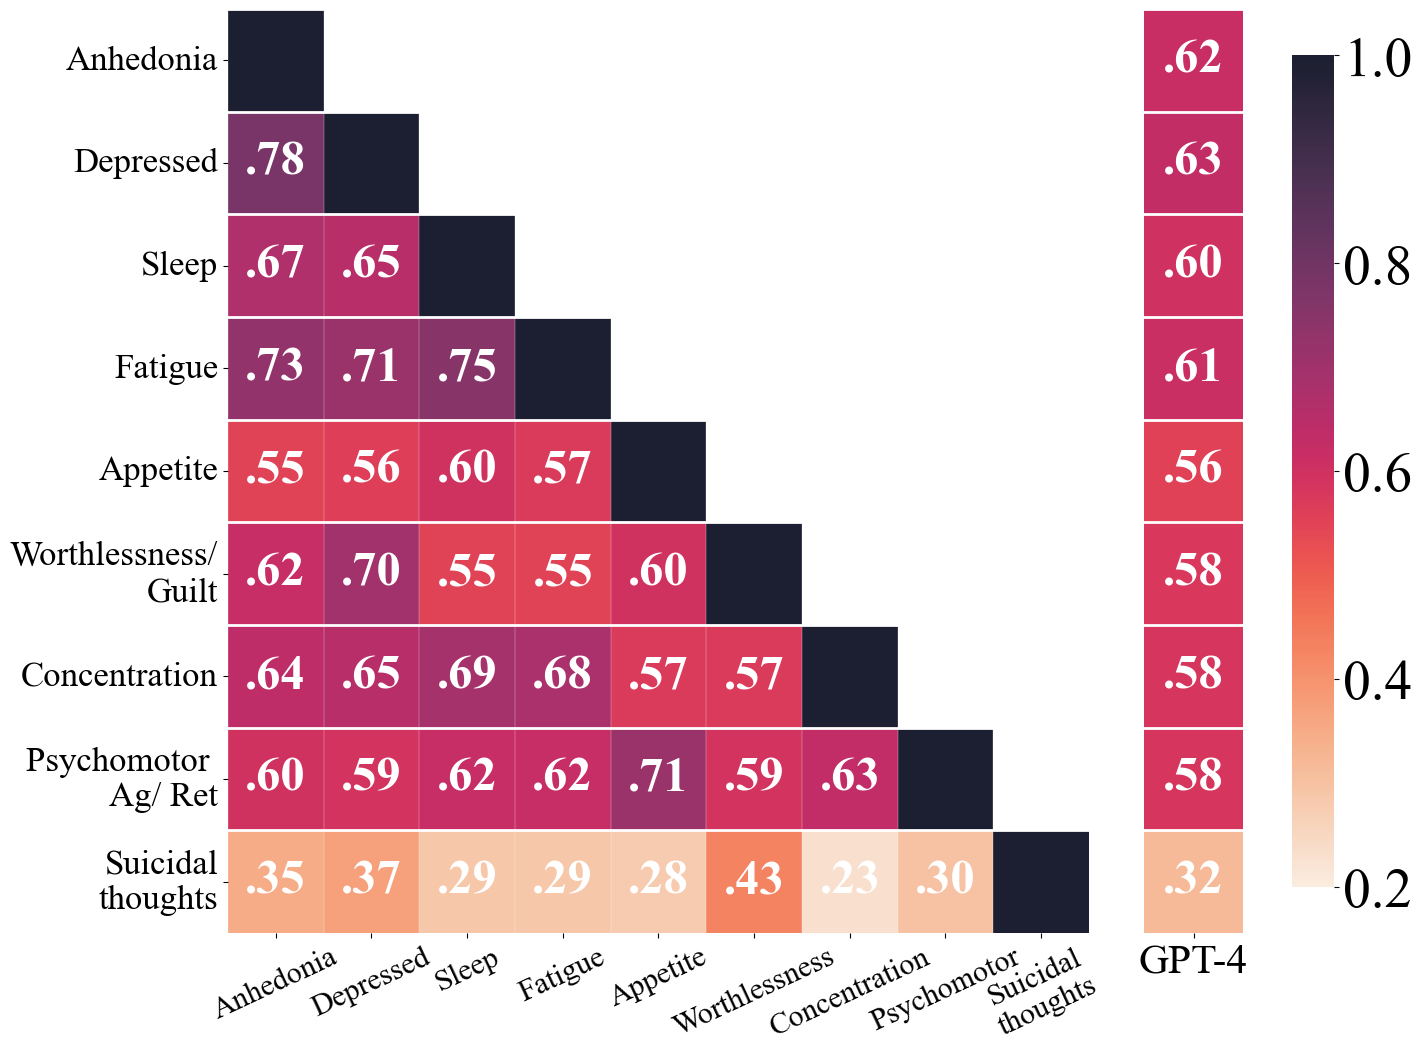

In [36]:
# Correlation in between all the items 
corr_df = gpt4_df[[i for i in score_columns]].corr().values.round(2)
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

f, (a0, a1) = plt.subplots(1, 2, figsize=(15, 12), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

corr_df_annot = gpt4_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9):
    corr_df_annot.iloc[i, i] = ''

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=0.2, vmax=1, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a0, cbar=False)

for i in range(9):
    a0.axhline(i, color='white', lw=2)
    a0.axvline(i, color='white', lw=.2)

# a0.axhline(7, color='white', lw=6)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor \nAg/ Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=22, fontproperties=custom_font)
a0.set_yticklabels(tick_labels_y, rotation=0, fontsize=25,  fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=0.2, vmax=1, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)

for i in range(9):
    # a1.axvline(i, color='white', lw=2)
    a1.axhline(i, color='white', lw=2)
# a1.axhline(7, color='white', lw=6)

a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['GPT-4'], rotation=0, fontsize=30,  fontproperties=custom_font)
cbar = a1.collections[0].colorbar

# Apply font properties to the colorbar's tick labels
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(custom_font)

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=40)

# plt.savefig('../data/figures/gpt4_item_corr_triu.png', dpi=1040, bbox_inches='tight')
plt.show()
# save figure


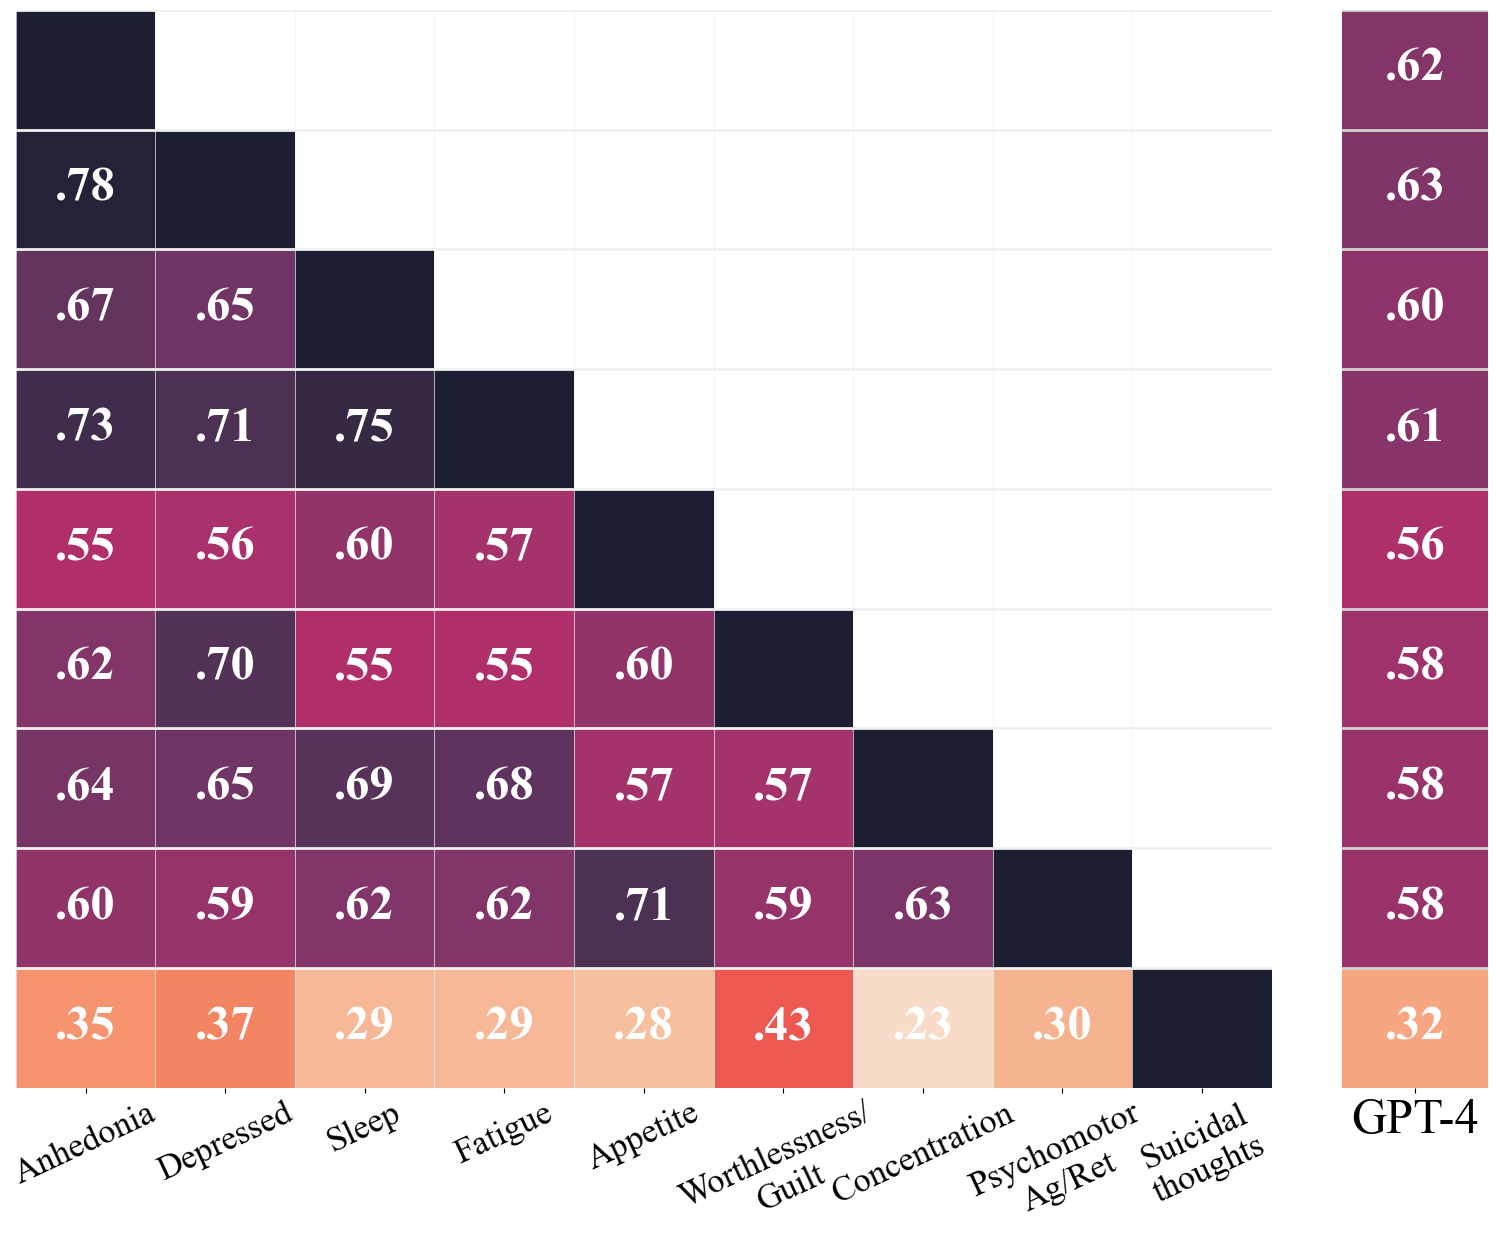

In [37]:
# Correlation in between all the items 
corr_df = gpt4_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = gpt4_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

f, (a0, a1) = plt.subplots(1, 2, figsize=(19, 14), gridspec_kw={'width_ratios': [3, 0.35], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a0, cbar=False)

a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
# a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=25, fontproperties=custom_font)
a0.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a1.axhline(i, color='lightgray', lw=2)
# a1.axhline(7, color='white', lw=6)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['GPT-4'], rotation=0, fontsize=35,  fontproperties=custom_font)

# cbar = a1.collections[0].colorbar
# # Apply font properties to the colorbar's tick labels
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(custom_font)
# # here set the labelsize by 20
# cbar.ax.tick_params(labelsize=40)

# plt.savefig('../data/figures/gpt4_item_corr_triu.png', dpi=1040, bbox_inches='tight')
# plt.savefig('../data/figures/gpt4_item_corr_triu.svg', dpi=2080, bbox_inches='tight')
plt.show()


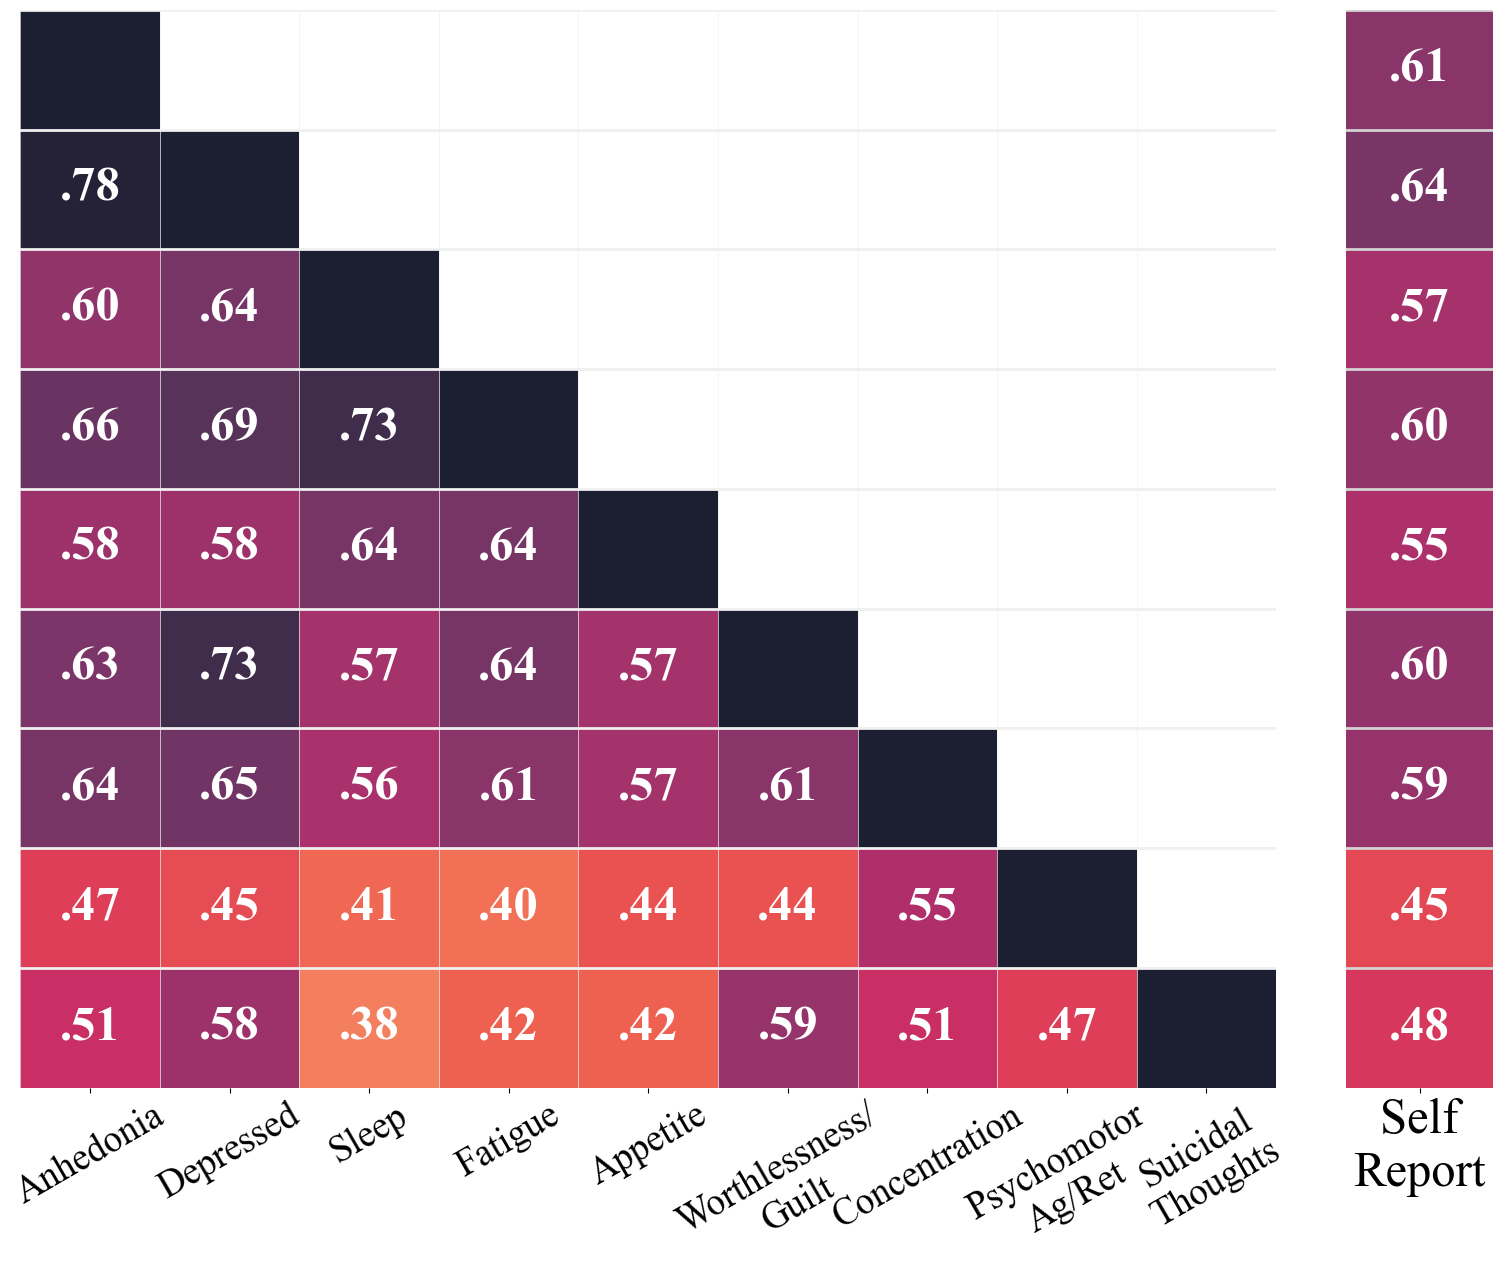

In [38]:
# Correlation in between all the items 
corr_df = self_report_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = self_report_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

f, (a0, a1) = plt.subplots(1, 2, figsize=(19, 14), gridspec_kw={'width_ratios': [3, 0.35], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a0, cbar=False)

a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
# a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']

a0.set_xticklabels(tick_labels, rotation=30, fontsize=27, fontproperties=custom_font)
a0.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a1.axhline(i, color='lightgray', lw=2)
# a1.axhline(7, color='white', lw=6)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

# cbar = a1.collections[0].colorbar
# # Apply font properties to the colorbar's tick labels
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(custom_font)
# # here set the labelsize by 20
# cbar.ax.tick_params(labelsize=40)

# plt.savefig('../data/figures/sr_item_corr_triu_trns.png', dpi=1040, bbox_inches='tight', transparent=True)
# plt.savefig('../data/figures/sr_item_corr_triu_trns.svg', dpi=2080, bbox_inches='tight', transparent=True)
plt.show()
# save figure



In [39]:
from matplotlib.colorbar import ColorbarBase
from matplotlib import gridspec
import matplotlib.colors

Text(0.5, 1.0, 'Average\n')

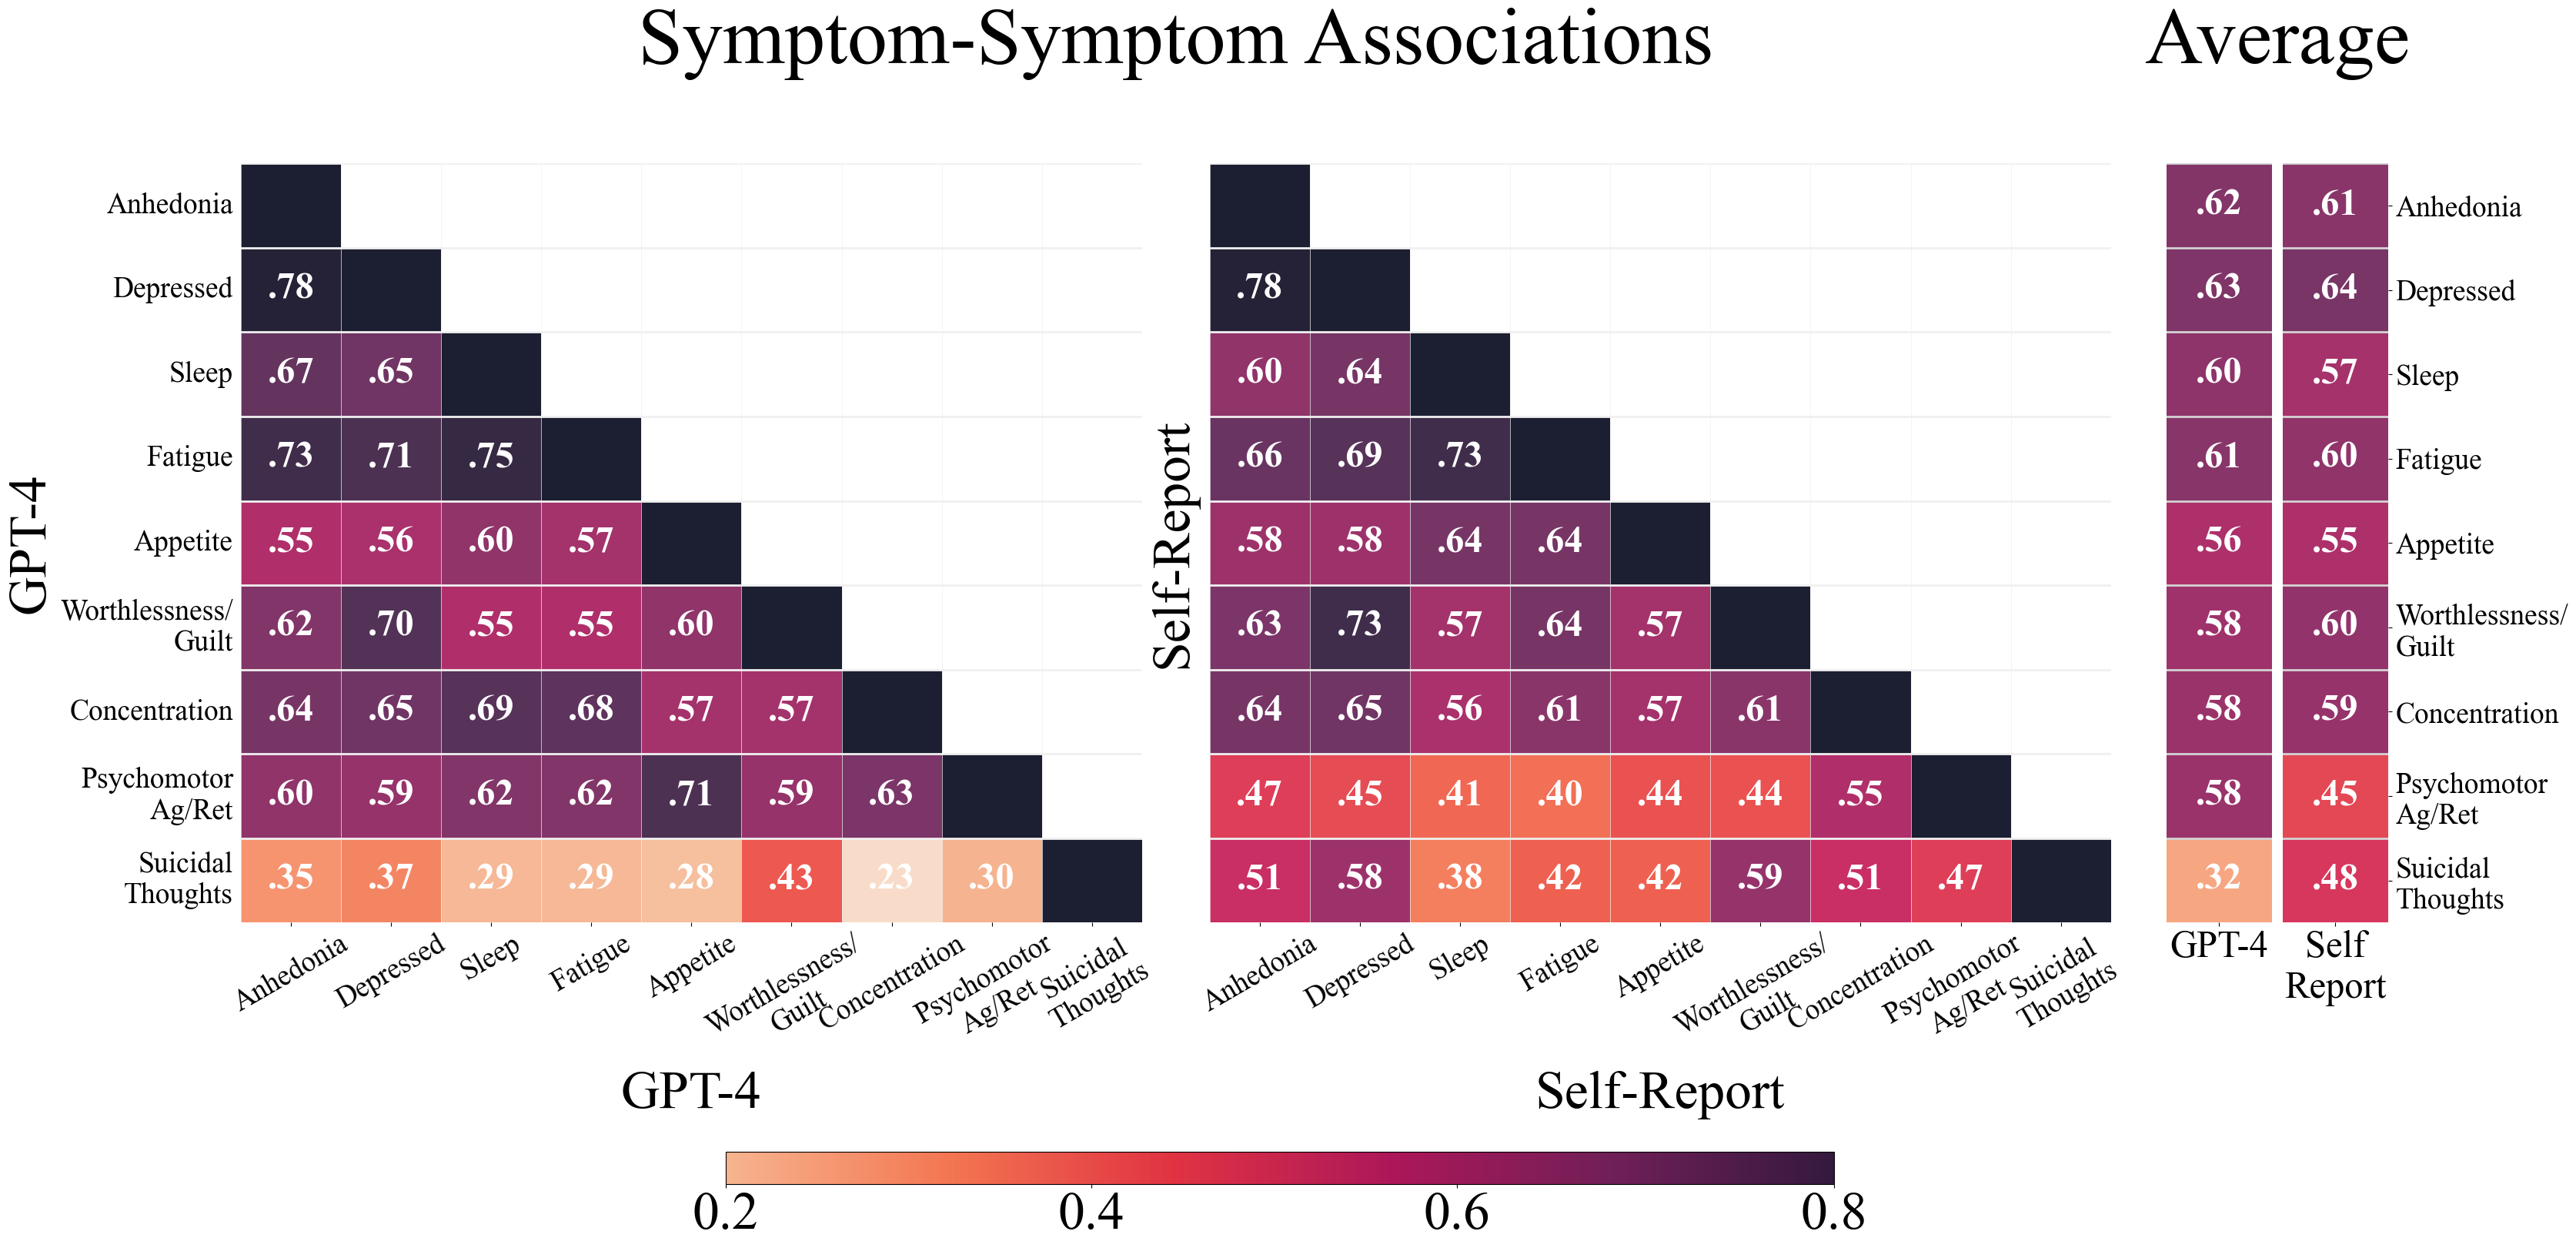

In [40]:
# Make gridspec such that there are two parts to the figure, 
# one which will be split into subplots for correlation matrix 
# and the other will be for the average
# The former will have more wspace between the heatmaps and the latter will have less wspace

f = plt.figure(figsize=(36, 17))
gs1 = gridspec.GridSpec(1, 2, figure=f, right=0.80, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.075)
gs2 = gridspec.GridSpec(1, 2, figure=f, left=0.82, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.1)
gs3 = gridspec.GridSpec(1, 1, figure=f, top=0.125, bottom=0.1, left=0.3, right=0.7, hspace=0.1)

# put gpt4 corr map in a0 and self report corr map in a1
# put gpt4 avg in a2 and self report avg in a3
a0 = f.add_subplot(gs1[0])
a1 = f.add_subplot(gs1[1])
a2 = f.add_subplot(gs2[0])
a3 = f.add_subplot(gs2[1])
a4 = f.add_subplot(gs3[0])

# Correlation in between all the items 
corr_df = gpt4_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = gpt4_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

# corrs_trials = []
# for trial in range(10):
#     # sample shape[0] users with replacement
#     sample = gpt4_df.sample(n=gpt4_df.shape[0], replace=True)
#     # calculate the correlation matrix
#     corr_df = sample[[i for i in score_columns]].corr().values.round(2)
#     # append to corrs_trials
#     corrs_trials.append(corr_df)

# # create a 3D array of the correlation matrices
# corrs_trials = np.array(corrs_trials)
# # sort along the trials axis and take the 2.5th and 97.5th percentiles
# lower_bound = np.percentile(corrs_trials, 2.5, axis=0)
# upper_bound = np.percentile(corrs_trials, 97.5, axis=0)

# # annotate the corr_df_annot with [lower_bound, upper_bound] below the correlation values in smaller font
# conf_bounds_annot = corr_df_annot.copy()
# for idx in range(9):
#     for jdx in range(9):
#         if idx != jdx:
#             conf_bounds_annot.iloc[idx, jdx] = '['+f'{lower_bound[idx, jdx]:.2f}'[-3:]+','+ f'{upper_bound[idx, jdx]:.2f}]'[-4:]

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

# f, (a0, a1, a2, a3) = plt.subplots(1, 4, figsize=(36, 15), gridspec_kw={'width_ratios': [3, 3, 0.35, 0.35], 'wspace': 0.1})

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a0, cbar=False)

# # Add custom annotations
# for i in range(corr_df.shape[0]):
#     for j in range(corr_df.shape[1]):
#         if not mask[i, j]:
#             corr_text = corr_df_annot.iloc[i, j]
#             conf_bounds = conf_bounds_annot.iloc[i, j]
            
#             a0.text(j + 0.5, i + 0.5, corr_text, ha='center', va='center',
#                     fontsize=30, fontweight='bold', color='white', fontproperties=custom_font_bold)
#             a0.text(j + 0.5, i + 0.75, conf_bounds, ha='center', va='center',
#                     fontsize=18, color='white', fontproperties=custom_font)


a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)


tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']

a0.set_xticklabels(tick_labels, rotation=30, fontsize=27, fontproperties=custom_font)
a0.set_yticklabels(tick_labels_y, rotation=0, fontsize=27,  fontproperties=custom_font)
a0.set_xlabel('GPT-4', fontsize=50, fontproperties=custom_font)
a0.set_ylabel('GPT-4', fontsize=50, fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a2, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a2.axhline(i, color='lightgray', lw=2)

a2.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a2.yaxis.tick_right()
a2.tick_params(right=False, bottom=True, left=False)
a2.set_xticklabels(['GPT-4'], rotation=0, fontsize=35,  fontproperties=custom_font)

###########################
###########################

# Correlation in between all the items 
corr_df = self_report_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = self_report_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a1, cbar=False)

a1.tick_params(left=False, bottom=True)

for i in range(9):
    a1.axhline(i, color='#f0f0f0', lw=2)
    a1.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
# a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']

a1.set_xticklabels(tick_labels, rotation=30, fontsize=27, fontproperties=custom_font)
a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.set_xlabel('Self-Report', fontsize=50, fontproperties=custom_font)
a1.set_ylabel('Self-Report', fontsize=50, fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a3, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a3.axhline(i, color='lightgray', lw=2)

a3.set_yticklabels(tick_labels_y, rotation=0, fontsize=27,  fontproperties=custom_font)
a3.yaxis.tick_right()
a3.tick_params(right=True, bottom=True, left=False)
a3.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

###########################
###########################

rocket_r_colors = sns.color_palette("rocket_r").as_hex()
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", rocket_r_colors)

# Add colorbar to a4
cb1 = ColorbarBase(a4, cmap=my_cmap, orientation='horizontal', alpha=0.9)
# set 4 x ticks
cb1.set_ticks([0.0, 0.33, 0.66, 1.0])
a4.set_xticklabels([0.2, 0.4, 0.6, 0.8], fontsize=50, fontproperties=custom_font)

###########################
###########################

# Add ghost axes and titles on gs1 and gs2
ax_left = f.add_subplot(gs1[:])
ax_left.axis('off')
ax_left.set_title('Symptom-Symptom Associations\n', fontsize=75, fontproperties=custom_font)

ax_right = f.add_subplot(gs2[:])
ax_right.axis('off')
ax_right.set_title('Average\n', fontsize=75, fontproperties=custom_font)

# plt.savefig('../data/figures/InterSymptomrelationship2.pdf', dpi=1040, bbox_inches='tight', format='pdf')

In [41]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as clr

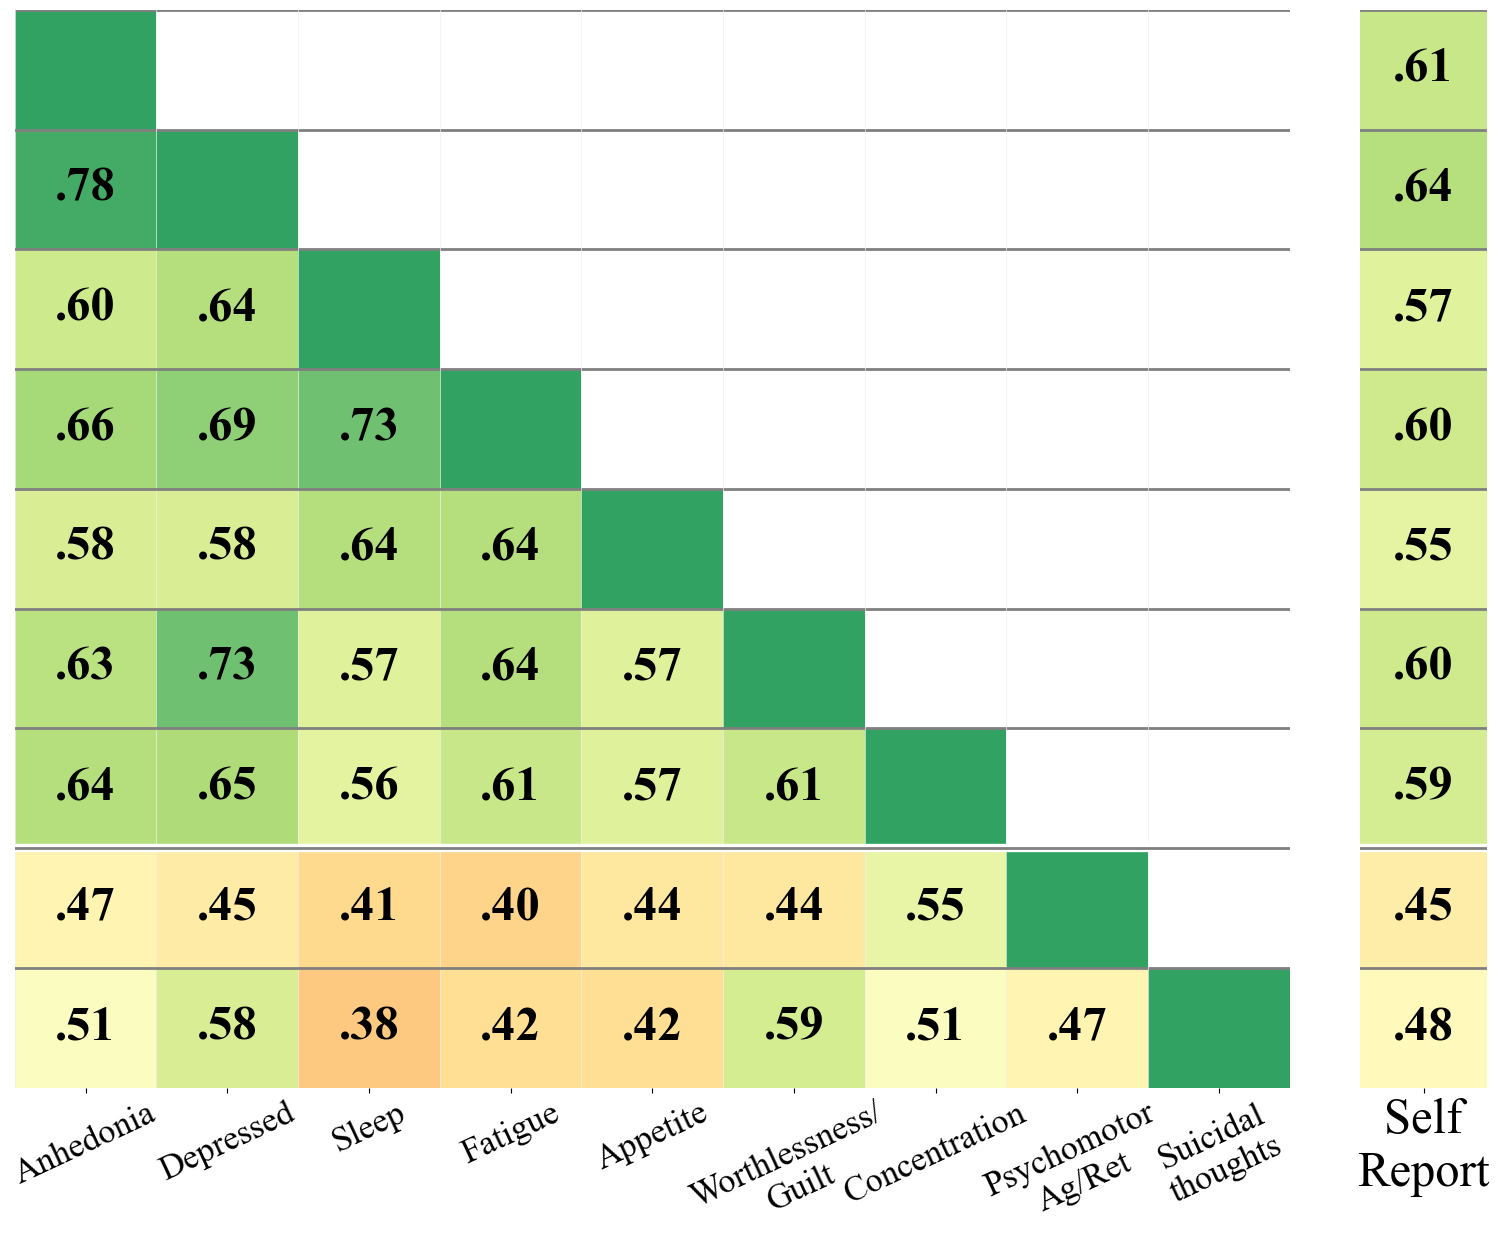

In [42]:
# Correlation in between all the items 
corr_df = self_report_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = self_report_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

# https://stackoverflow.com/questions/38147997/how-to-change-a-linearsegmentedcolormap-to-a-different-distribution-of-color
clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850'])))
# clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e'])))
custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=512)

f, (a0, a1) = plt.subplots(1, 2, figsize=(19, 14), gridspec_kw={'width_ratios': [3.5, 0.35], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap=custom_cmap, vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'}, 
            ax=a0, cbar=False)

a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='gray', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
a0.axhline(7, color='white', lw=6)
a0.axhline(7, color='gray', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=25, fontproperties=custom_font)
a0.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap=custom_cmap, vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a1.axhline(i, color='gray', lw=2)
a1.axhline(7, color='white', lw=6)
a1.axhline(7, color='gray', lw=2)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

# cbar = a1.collections[0].colorbar
# # Apply font properties to the colorbar's tick labels
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(custom_font)
# # here set the labelsize by 20
# cbar.ax.tick_params(labelsize=40)

# plt.savefig('../data/figures/sr_item_corr_triu.png', dpi=1040, bbox_inches='tight')
# plt.savefig('../data/figures/sr_item_corr_triu.svg', dpi=2080, bbox_inches='tight')
plt.show()
# save figure


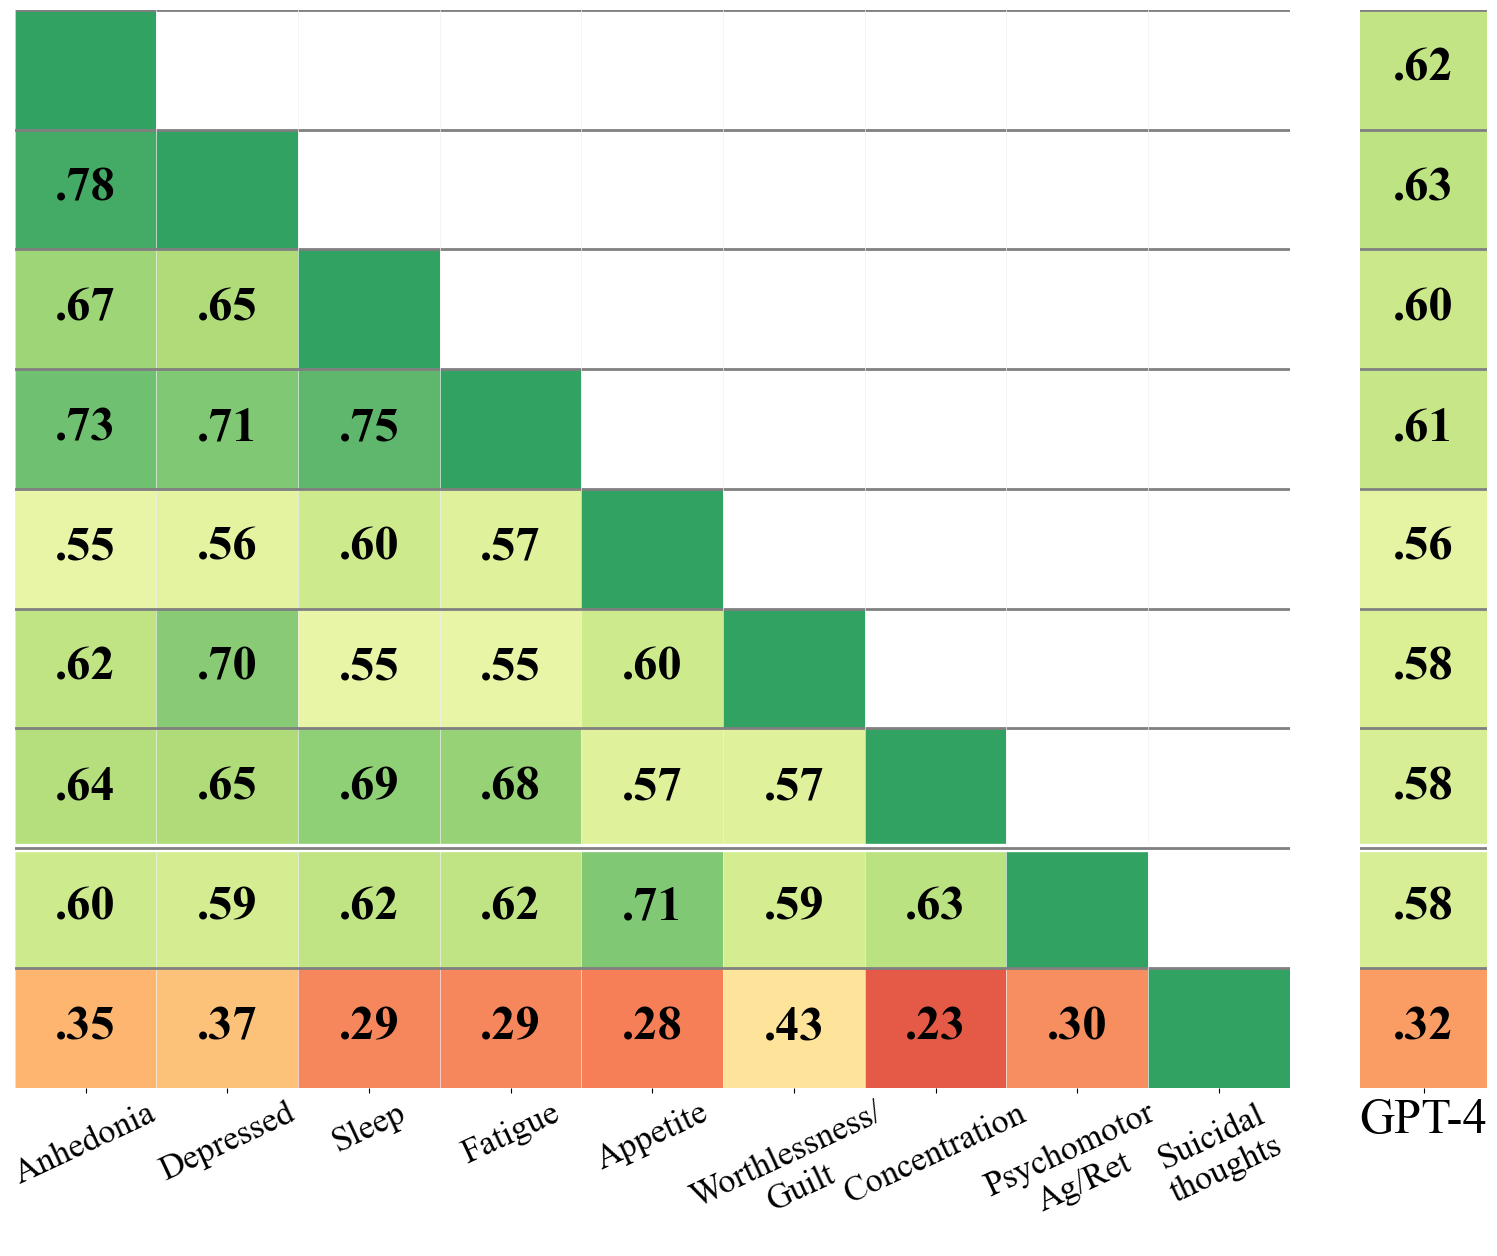

In [43]:
# Correlation in between all the items 
corr_df = gpt4_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = gpt4_df[[i for i in score_columns]].corr().apply(lambda col: [f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

# https://stackoverflow.com/questions/38147997/how-to-change-a-linearsegmentedcolormap-to-a-different-distribution-of-color
clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850'])))
# clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e'])))
custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=512)

f, (a0, a1) = plt.subplots(1, 2, figsize=(19, 14), gridspec_kw={'width_ratios': [3.5, 0.35], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap=custom_cmap, vmin=0.2, vmax=0.8, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'}, 
            ax=a0, cbar=False)

a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='gray', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
a0.axhline(7, color='white', lw=6)
a0.axhline(7, color='gray', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=25, fontproperties=custom_font)
a0.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap=custom_cmap, vmin=0.2, vmax=0.8, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a1.axhline(i, color='gray', lw=2)
a1.axhline(7, color='white', lw=6)
a1.axhline(7, color='gray', lw=2)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['GPT-4'], rotation=0, fontsize=35,  fontproperties=custom_font)

# cbar = a1.collections[0].colorbar
# # Apply font properties to the colorbar's tick labels
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(custom_font)
# # here set the labelsize by 20
# cbar.ax.tick_params(labelsize=40)

# plt.savefig('../data/figures/sr_item_corr_triu.png', dpi=1040, bbox_inches='tight')
# plt.savefig('../data/figures/sr_item_corr_triu.svg', dpi=2080, bbox_inches='tight')
plt.show()
# save figure


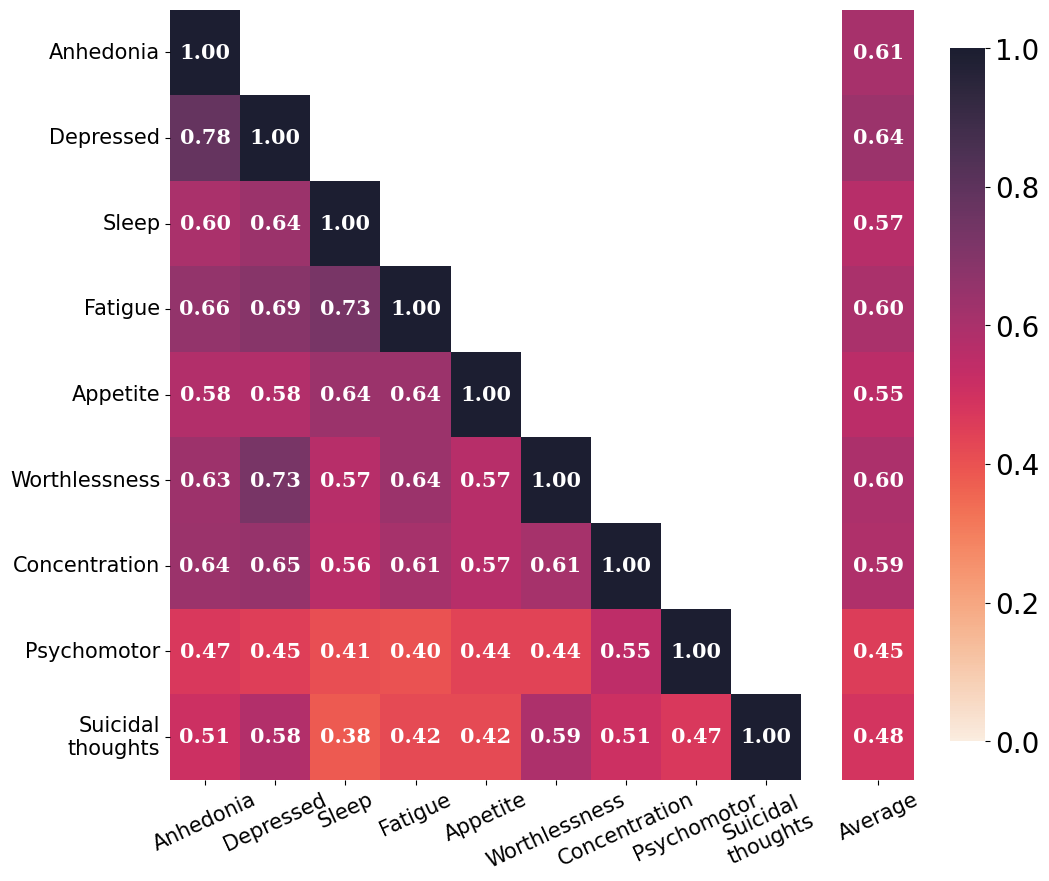

In [44]:
# Correlation in between all the items 
corr_df = self_report_df[[i for i in score_columns]].corr().values.round(2)
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False


sns.heatmap(corr_df, mask=mask, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f',  annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('../data/figures/sr_item_corr_triu.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure


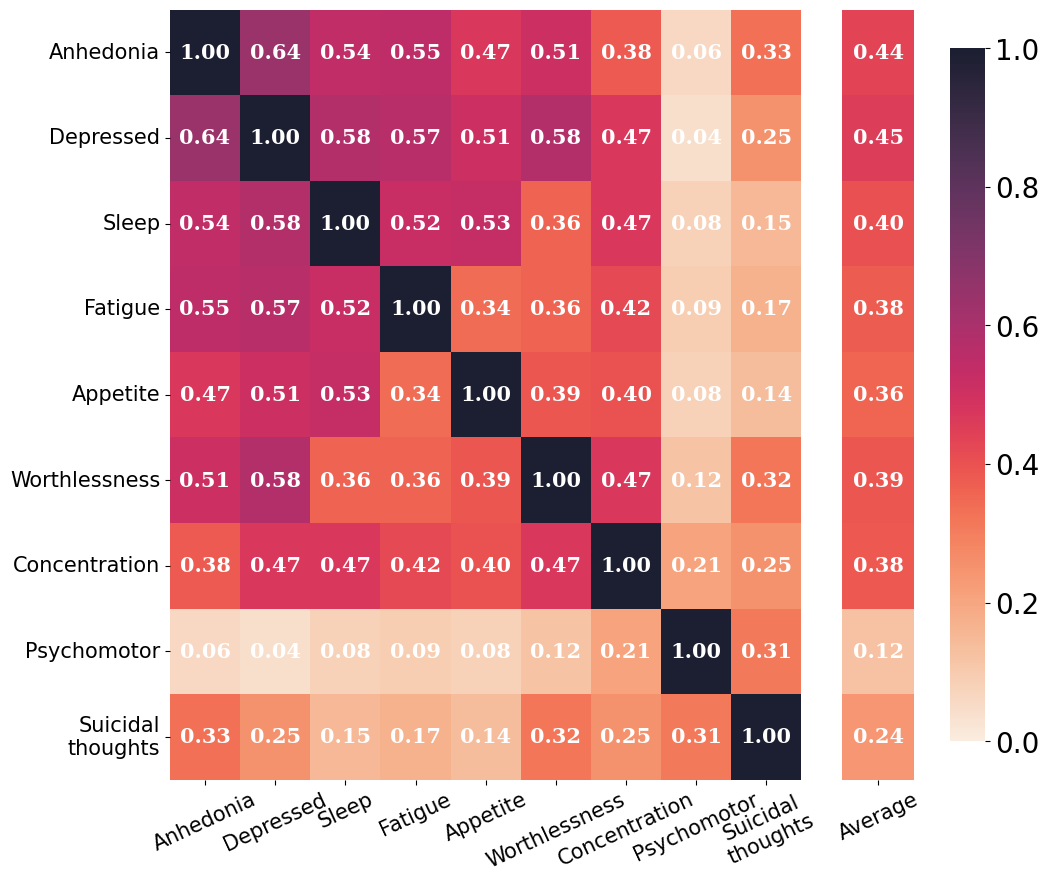

In [45]:
# Correlation in between all the items 
corr_df = expert1_df[[i for i in score_columns]].corr().values.round(2)
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})


sns.heatmap(corr_df, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f',  annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/expert1_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure


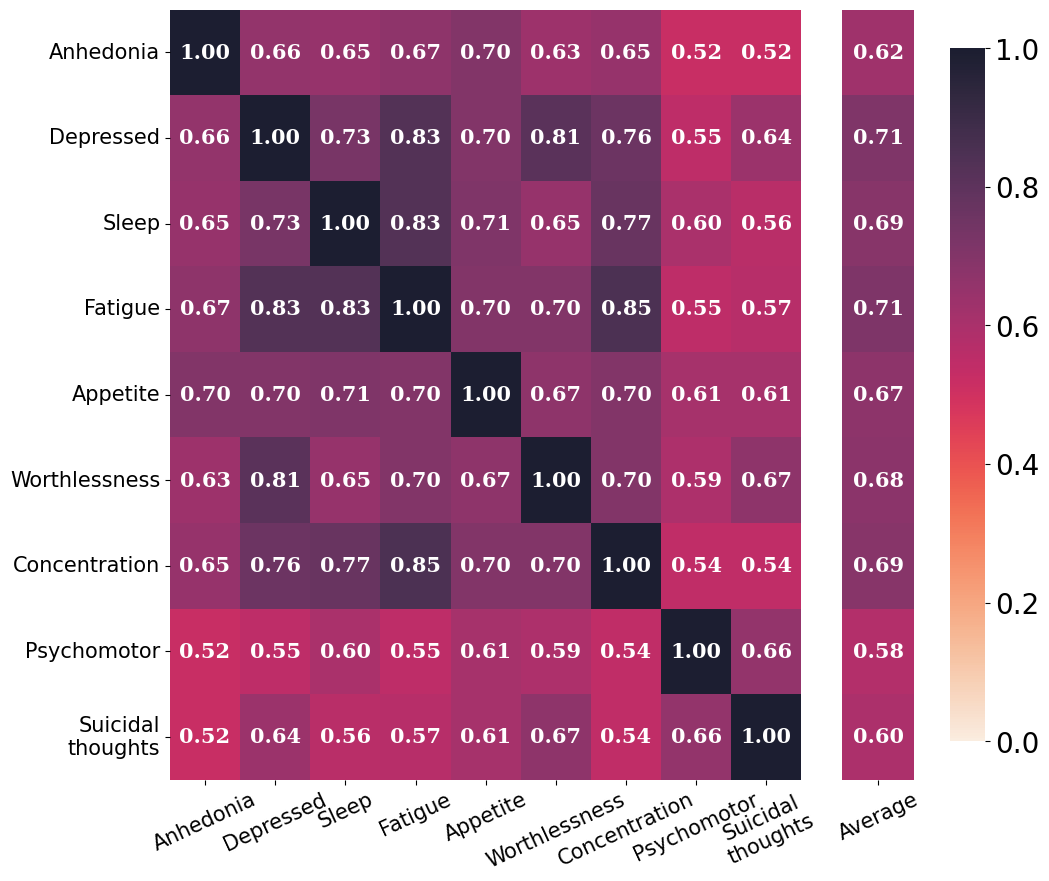

In [46]:
# Correlation in between all the items 
corr_df = expert2_df[[i for i in score_columns]].corr().values.round(2)
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20


f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})


sns.heatmap(corr_df, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f',  annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = ((corr_df.sum(axis=1)-1.0)/8).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap='rocket_r', vmin=0.0, vmax=1, alpha=0.9, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/expert2_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure


In [47]:
# https://stackoverflow.com/questions/38147997/how-to-change-a-linearsegmentedcolormap-to-a-different-distribution-of-color
clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#c9d7f0', '#8c93a1', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))
clrs = list(map(lambda x: (x[0]/6.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#a9aaab', '#f7a889', '#e26952', '#c95a44'])))
# clrs = list(map(lambda x: (x[0]/7.0, x[1]), enumerate(['#5a77d1', '#9abbff', '#c9d7f0', '#aeb9cf', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))

custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=256)

# cmap = {obsv_id:np.random.random() for obsv_id in range(9)}
# sm = ScalarMappable(norm=Normalize(vmin=min(list(cmap.values())), vmax=max(list(cmap.values()))), cmap=sns.cubehelix_palette(as_cmap=True))

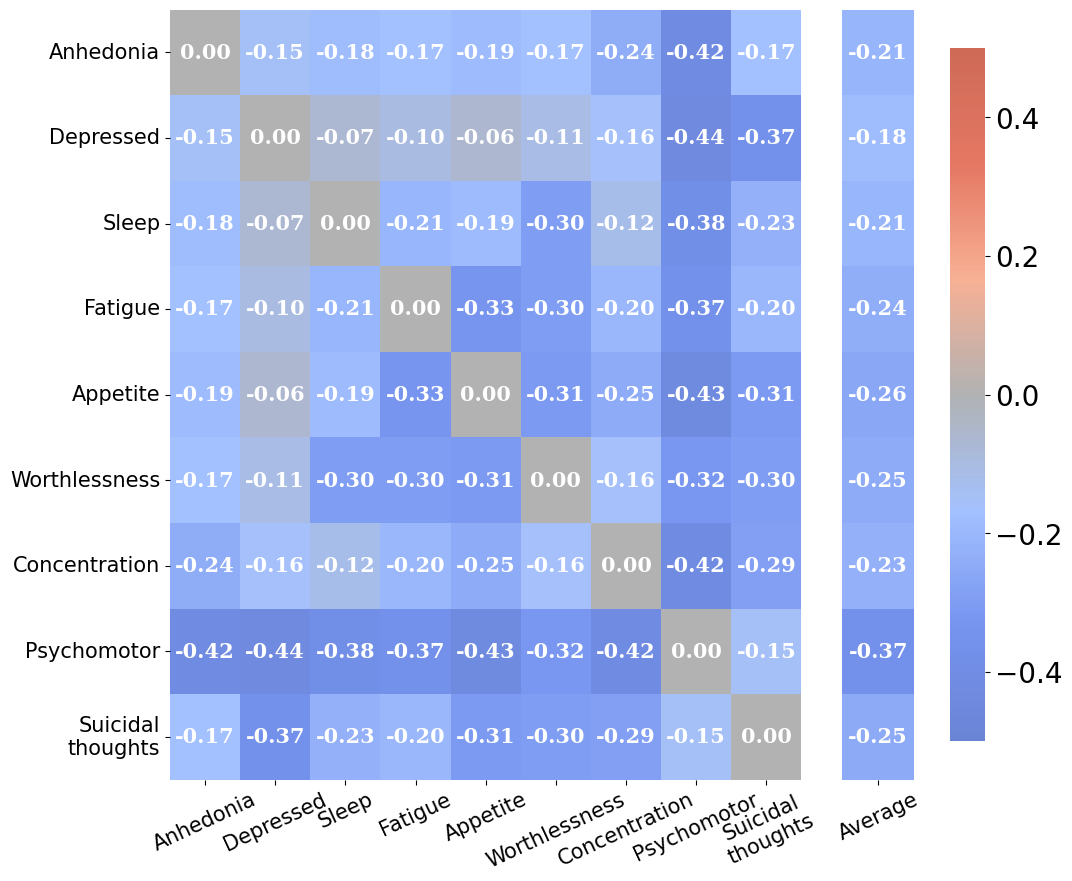

In [48]:
# Difference between Expert1 estimated items correlations and Self report items correlations

x_y = pd.merge(expert1_df, self_report_df, on='user_id', suffixes=('_expert1', '_selfreport'))
expert1_items_corr = x_y[['{}_expert1'.format(i) for i in score_columns]].corr()
selfreport_items_corr = x_y[['{}_selfreport'.format(i) for i in score_columns]].corr()

diff_corr = np.round(expert1_items_corr.values - selfreport_items_corr.values, 2)

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, annot=True,cmap=custom_cmap,vmin=-0.5, vmax=0.5, alpha=0.90, fmt='.2f', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap=custom_cmap, vmin=-0.5, vmax=0.5, alpha=0.90, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/diff_gpt4_sr_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

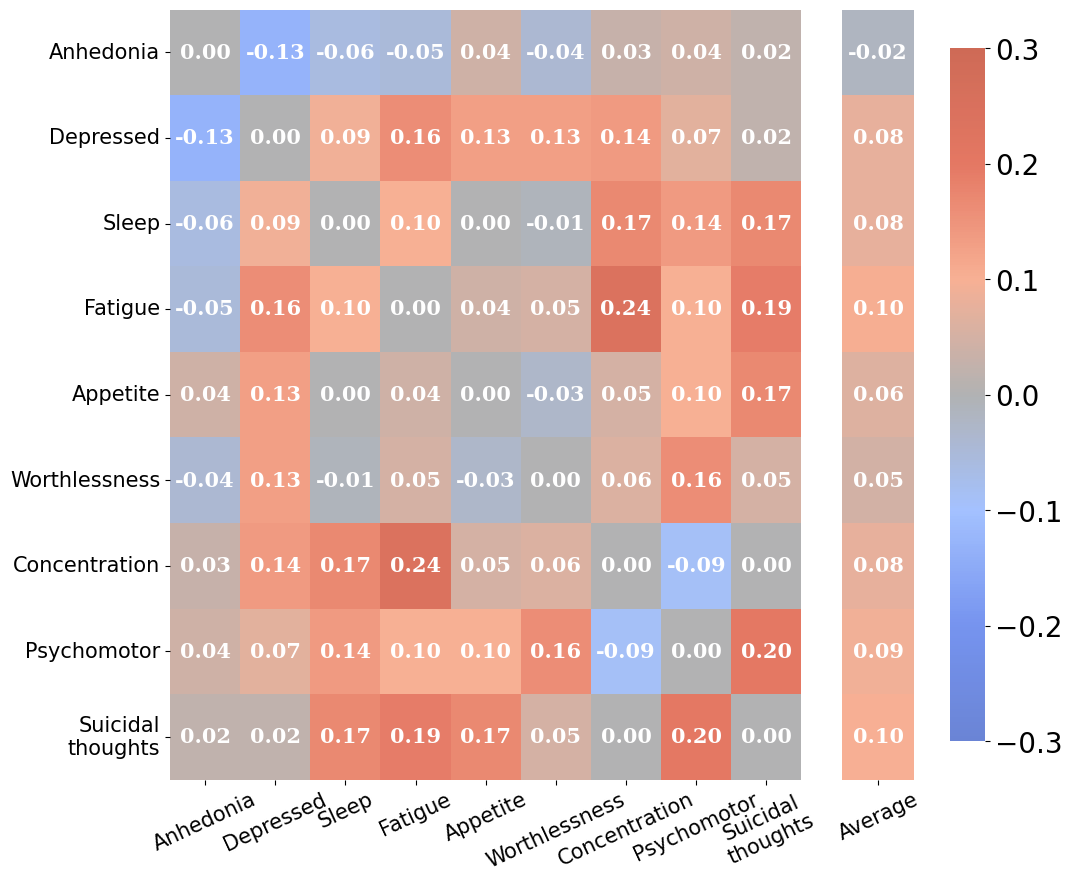

In [49]:
# Difference between Expert2 estimated items correlations and Self report items correlations

x_y = pd.merge(expert2_df, self_report_df, on='user_id', suffixes=('_expert2', '_selfreport'))
expert2_items_corr = x_y[['{}_expert2'.format(i) for i in score_columns]].corr()
selfreport_items_corr = x_y[['{}_selfreport'.format(i) for i in score_columns]].corr()

diff_corr = np.round(expert2_items_corr.values - selfreport_items_corr.values, 2)

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, annot=True,cmap=custom_cmap,vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/diff_gpt4_sr_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

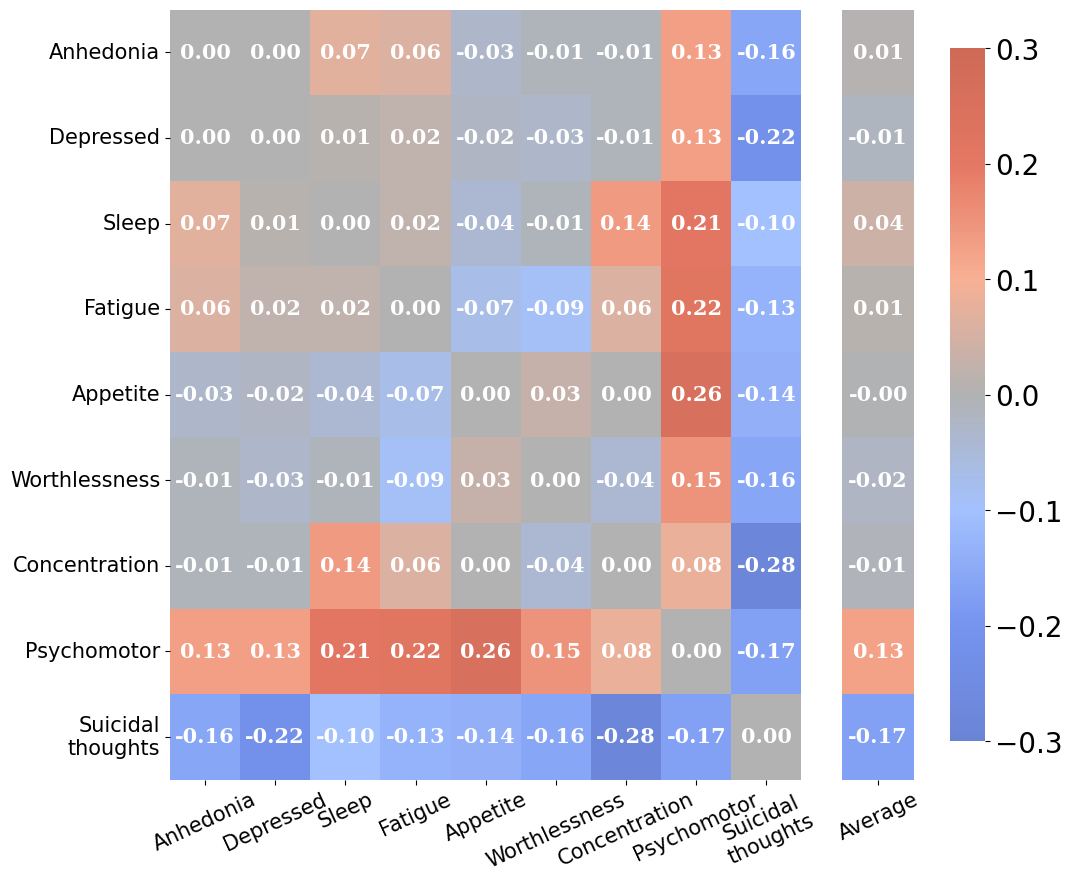

In [50]:
# Difference between GPT4 estimated items correlations and Self report items correlations

x_y = pd.merge(gpt4_df, self_report_df, on='user_id', suffixes=('_gpt4', '_selfreport'))
gpt4_items_corr = x_y[['{}_gpt4'.format(i) for i in score_columns]].corr()
selfreport_items_corr = x_y[['{}_selfreport'.format(i) for i in score_columns]].corr()

diff_corr = np.round(gpt4_items_corr.values - selfreport_items_corr.values, 2)

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, annot=True,cmap=custom_cmap,vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/diff_gpt4_sr_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

In [51]:
# clrs = list(map(lambda x: (x[0]/10.0, x[1]), enumerate(['#8e0152','#c51b7d','#de77ae','#f1b6da','#fde0ef','#f7f7f7','#e6f5d0','#b8e186','#7fbc41','#4d9221','#276419'])))
clrs = list(map(lambda x: (x[0]/10.0, x[1]), enumerate(['#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#f7f7f7','#d9f0d3','#a6dba0','#5aae61','#1b7837','#00441b'])))
# clrs = list(map(lambda x: (x[0]/6.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#a9aaab', '#f7a889', '#e26952', '#c95a44'])))

# clrs = list(map(lambda x: (x[0]/7.0, x[1]), enumerate(['#5a77d1', '#9abbff', '#c9d7f0', '#aeb9cf', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))

custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=256)

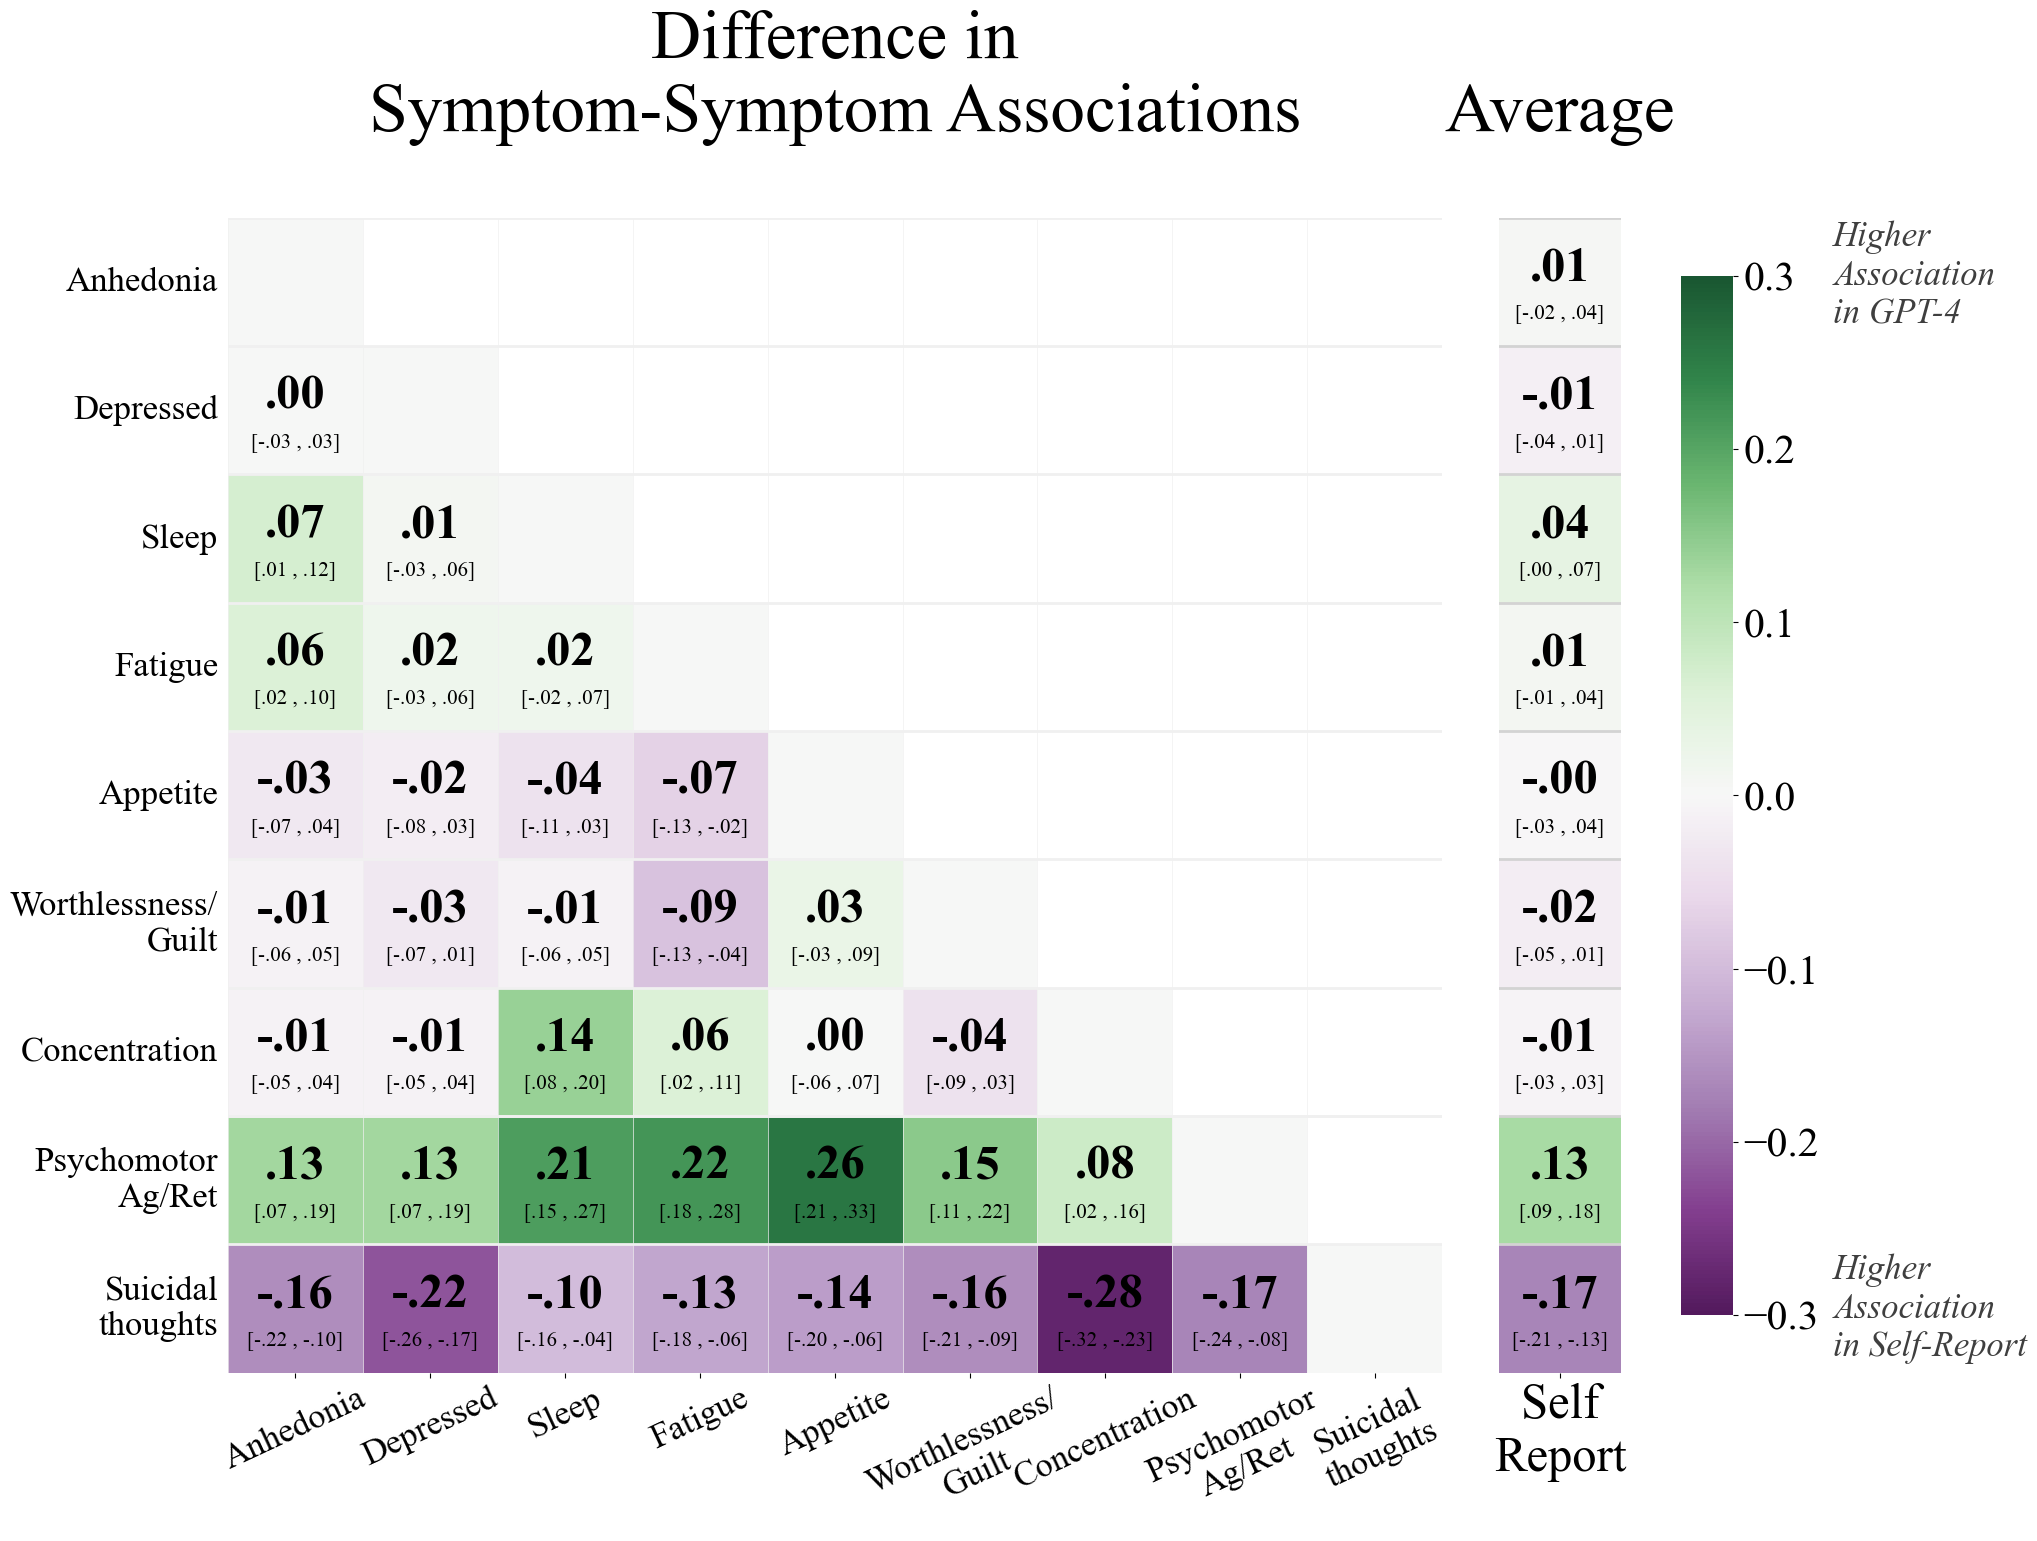

In [90]:
x_y = pd.merge(gpt4_df, self_report_df, on='user_id', suffixes=('_gpt4', '_selfreport'))
gpt4_items_corr = x_y[['{}_gpt4'.format(i) for i in score_columns]].corr()
selfreport_items_corr = x_y[['{}_selfreport'.format(i) for i in score_columns]].corr()

diff_corr = np.round(gpt4_items_corr.values - selfreport_items_corr.values, 2)
diff_corr_annot = [[f'{val:.2f}'[-3:] if val>=0 else '-'+f'{val:.2f}'[-3:] for val in row] for row in diff_corr]
for i in range(9): diff_corr_annot[i][i] = '' 

corrs_trials = []
avg_corr_trials = []
for trial in range(100):
    # sample shape[0] users with replacement
    x_y_sample = x_y.sample(n=x_y.shape[0], replace=True, random_state=trial)
    gpt4_sample_corr = x_y_sample[[f'{i}_gpt4' for i in score_columns]].corr()\
                        .rename(columns={f'{i}_gpt4':i for i in score_columns}, 
                                index={f'{i}_gpt4':i for i in score_columns})
    sr_sample_corr = x_y_sample[[f'{i}_selfreport' for i in score_columns]].corr()\
                        .rename(columns={f'{i}_selfreport':i for i in score_columns}, 
                                index={f'{i}_selfreport':i for i in score_columns})
    sample = gpt4_sample_corr - sr_sample_corr
    # calculate the correlation matrix
    diff_corr_df = sample.values.round(2)
    # append to corrs_trials
    corrs_trials.append(diff_corr_df)
    avg_sample = (diff_corr_df.sum(axis=1)/8.0).reshape(-1, 1)
    avg_corr_trials.append(avg_sample)

# create a 3D array of the correlation matrices
corrs_trials = np.array(corrs_trials)
avg_corr_trials = np.array(avg_corr_trials)
# sort along the trials axis and take the 2.5th and 97.5th percentiles
lower_bound = np.percentile(corrs_trials, 2.5, axis=0)
upper_bound = np.percentile(corrs_trials, 97.5, axis=0)
avg_lower_bound = np.percentile(avg_corr_trials, 2.5, axis=0)
avg_upper_bound = np.percentile(avg_corr_trials, 97.5, axis=0)

# annotate the corr_df_annot with [lower_bound, upper_bound] below the correlation values in smaller font
conf_bounds_annot = corr_df_annot.copy()
for idx in range(9):
    for jdx in range(9):
        if idx != jdx:
            lwr_bound_annot = f'{lower_bound[idx, jdx]:.2f}'[-3:] if lower_bound[idx, jdx]>=0 else '-'+f'{lower_bound[idx, jdx]:.2f}'[-3:]
            upr_bound_annot = f'{upper_bound[idx, jdx]:.2f}'[-3:] if upper_bound[idx, jdx]>=0 else '-'+f'{upper_bound[idx, jdx]:.2f}'[-3:]
            conf_bounds_annot.iloc[idx, jdx] = '['+lwr_bound_annot+' , '+ upr_bound_annot+']'

conf_bounds_avg_annot = []
for i in range(9):
    lower_bound_annot = f'{avg_lower_bound[i][0]:.2f}'[-3:] if avg_lower_bound[i][0]>=0 else '-'+f'{avg_lower_bound[i][0]:.2f}'[-3:]
    upper_bound_annot = f'{avg_upper_bound[i][0]:.2f}'[-3:] if avg_upper_bound[i][0]>=0 else '-'+f'{avg_upper_bound[i][0]:.2f}'[-3:]
    conf_bounds_avg_annot.append('['+lower_bound_annot+' , '+ upper_bound_annot+']')

mask = np.zeros_like(diff_corr, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False


f = plt.figure(figsize=(21, 15))
gs1 = gridspec.GridSpec(1, 2, figure=f, right=0.875, width_ratios=[0.80, 0.20], wspace=0.075)
# gs2 = gridspec.GridSpec(1, 2, figure=f, left=0.82, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.1)

a0 = f.add_subplot(gs1[0])
a1 = f.add_subplot(gs1[1])


sns.heatmap(diff_corr, annot=False, mask=mask, cmap=custom_cmap, vmin=-.3, vmax=.3, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'}, 
            ax=a0, cbar=False)

# Add custom annotations
for i in range(9):
    for j in range(9):
        if not mask[i, j]:
            corr_text = f'{diff_corr_annot[i][j]}'
            conf_bounds = conf_bounds_annot.iloc[i, j]
            
            a0.text(j + 0.5, i + 0.4, corr_text, ha='center', va='center',
                    fontsize=35, fontweight='bold', color='black', fontproperties=custom_font_bold)
            if i!= j:
                a0.text(j + 0.5, i + 0.75, conf_bounds, ha='center', va='center',
                    fontsize=15, color='black', fontproperties=custom_font)


a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=25, fontproperties=custom_font)
a0.set_yticklabels(tick_labels_y, rotation=0, fontsize=25,  fontproperties=custom_font)

avgs = (diff_corr.sum(axis=1)/8.0).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:] for v in row] for row in avgs]

sns.heatmap(avgs, annot=False, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)

for i in range(9):
    corr_text = avgs_annot[i][0]
    conf_bounds = conf_bounds_avg_annot[i]
    a1.text(0.5, i + 0.4, corr_text, ha='center', va='center',
            fontsize=35, fontweight='bold', color='black', fontproperties=custom_font_bold)
    a1.text(0.5, i + 0.75, conf_bounds, ha='center', va='center',
            fontsize=15, color='black', fontproperties=custom_font)
    a1.axhline(i, color='lightgray', lw=2)
# a1.axhline(7, color='white', lw=6)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

cbar = a1.collections[0].colorbar
# Apply font properties to the colorbar's tick labels
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(custom_font)
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)

a1.text(2.75, 0.45, 'Higher\nAssociation\nin GPT-4', ha='left', va='center', fontsize=30, fontproperties=custom_font_italics, color='#3f3f3f')
a1.text(2.75, 8.5, 'Higher\nAssociation\nin Self-Report', ha='left', va='center', fontsize=30, fontproperties=custom_font_italics, color='#3f3f3f')

# # Add ghost axes and titles on gs1 and gs2
# ax_left = f.add_subplot(gs1[:])
# ax_left.axis('off')
a0.set_title('Difference in\nSymptom-Symptom Associations\n', fontsize=50, fontproperties=custom_font)

# ax_right = f.add_subplot(gs2[:])
# ax_right.axis('off')
a1.set_title('Average\n', fontsize=50, fontproperties=custom_font)



# plt.savefig('../data/figures/diff_gpt4_sr_corr_triu.png', dpi=1040, bbox_inches='tight')
# plt.savefig('../data/figures/diff_gpt4_sr_corr_triu.pdf', dpi=1040, bbox_inches='tight')
plt.show()
# save figure


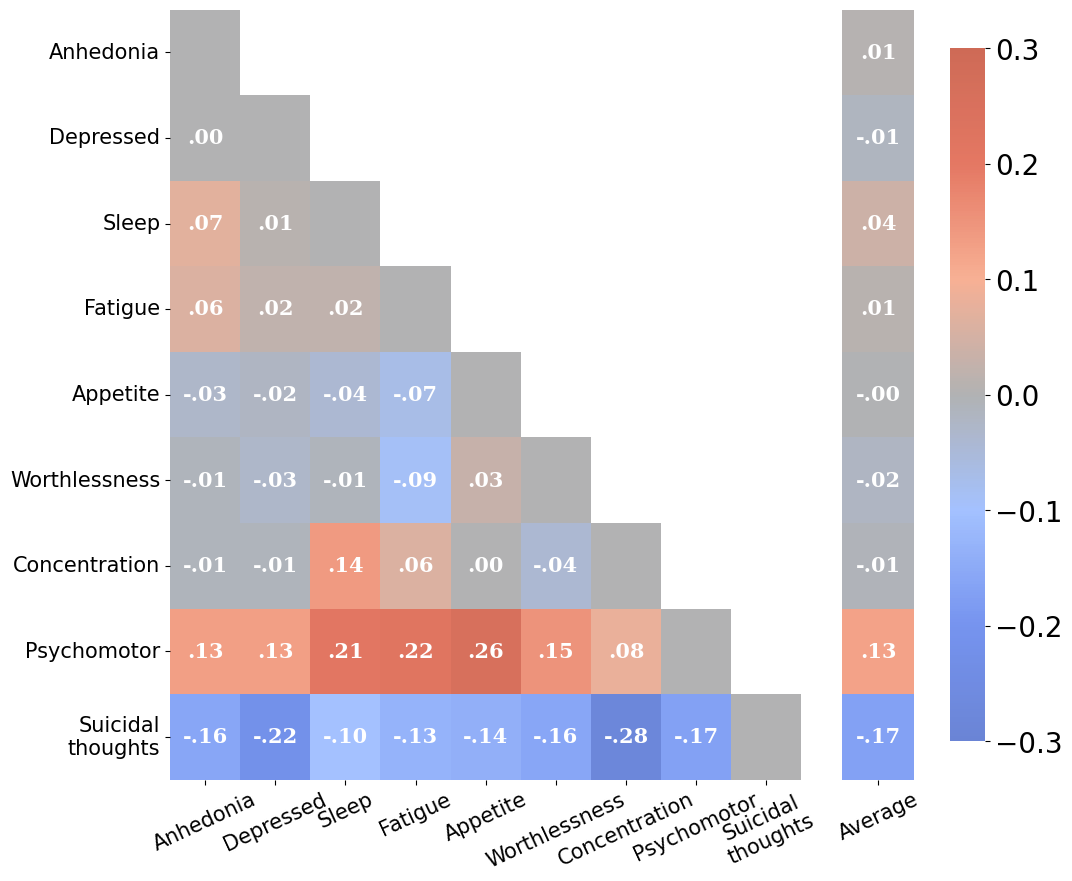

In [33]:
# Difference between GPT4 estimated items correlations and Self report items correlations

x_y = pd.merge(gpt4_df, self_report_df, on='user_id', suffixes=('_gpt4', '_selfreport'))
gpt4_items_corr = x_y[['{}_gpt4'.format(i) for i in score_columns]].corr()
selfreport_items_corr = x_y[['{}_selfreport'.format(i) for i in score_columns]].corr()

diff_corr = np.round(gpt4_items_corr.values - selfreport_items_corr.values, 2)
diff_corr_annot = [[f'{val:.2f}'[-3:] if val>=0 else '-'+f'{val:.2f}'[-3:] for val in row] for row in diff_corr]
for i in range(9): diff_corr_annot[i][i] = '' 

mask = np.zeros_like(diff_corr, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, mask=mask, annot=pd.DataFrame(diff_corr_annot),cmap=custom_cmap,vmin=-0.3, vmax=0.3, alpha=0.90, fmt='', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:] for v in row] for row in avgs]

sns.heatmap(avgs, annot=avgs_annot, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.90, fmt='', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('../data/figures/diff_gpt4_sr_item_corr_triu.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

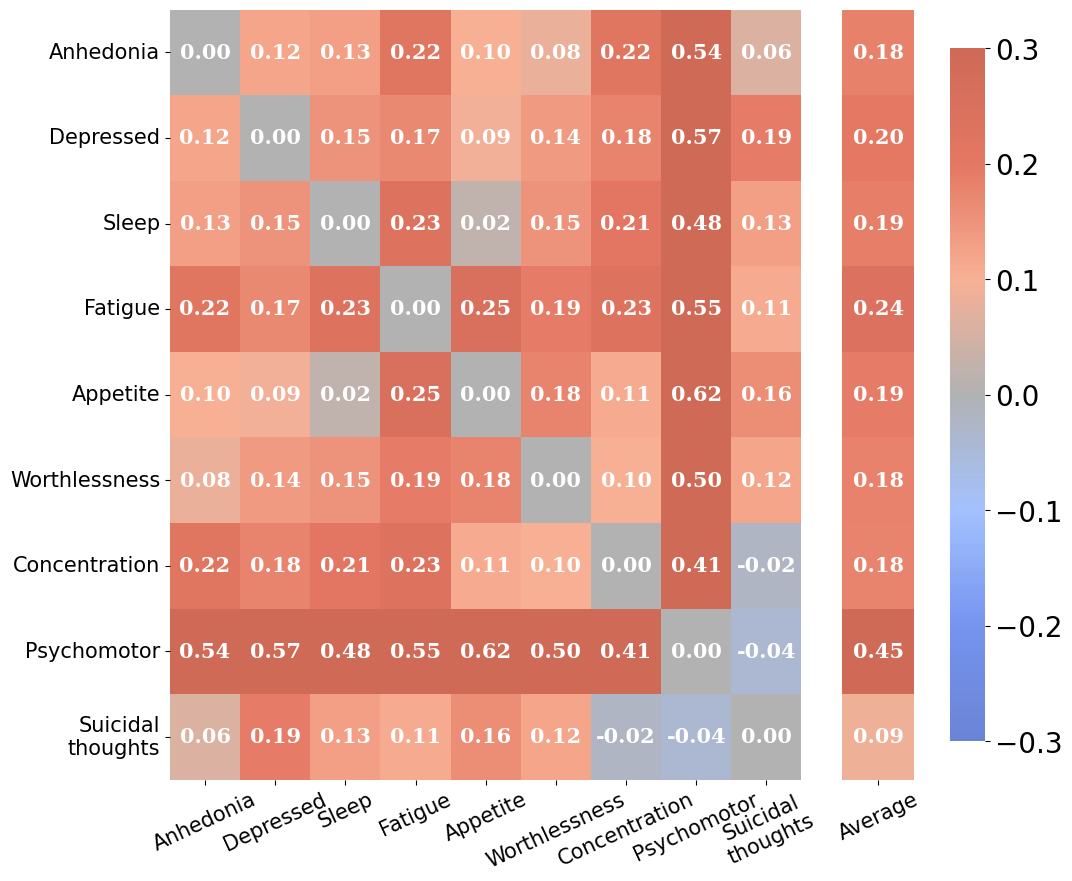

In [40]:
# Difference between GPT4 estimated items correlations and Expert1 items correlations

x_y = pd.merge(gpt4_df, expert1_df, on='user_id', suffixes=('_gpt4', '_expert1'))
gpt4_items_corr = x_y[['{}_gpt4'.format(i) for i in score_columns]].corr()
expert1_items_corr = x_y[['{}_expert1'.format(i) for i in score_columns]].corr()

diff_corr = np.round(gpt4_items_corr.values - expert1_items_corr.values, 2)

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, annot=True,cmap=custom_cmap,vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/diff_gpt4_sr_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

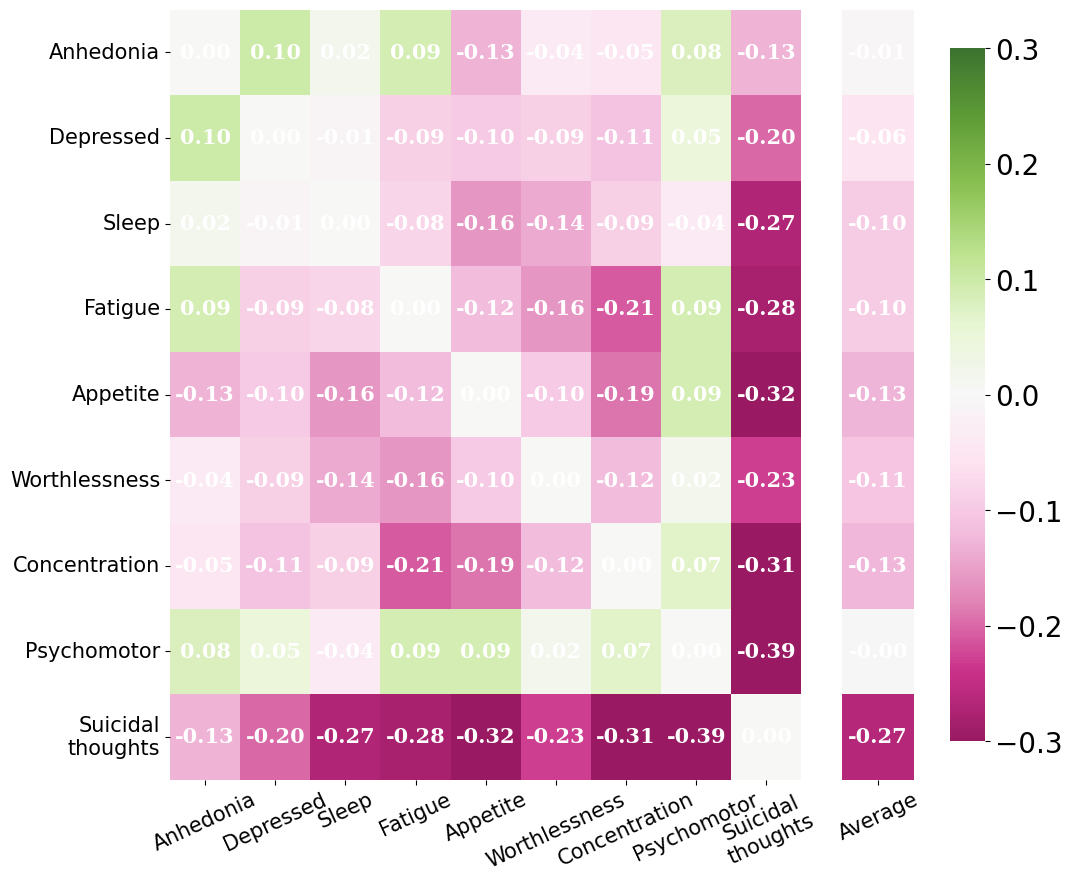

In [61]:
# Difference between GPT4 estimated items correlations and Expert2 items correlations

x_y = pd.merge(gpt4_df, expert2_df, on='user_id', suffixes=('_gpt4', '_expert2'))
gpt4_items_corr = x_y[['{}_gpt4'.format(i) for i in score_columns]].corr()
expert2_items_corr = x_y[['{}_expert2'.format(i) for i in score_columns]].corr()

diff_corr = np.round(gpt4_items_corr.values - expert2_items_corr.values, 2)

f, (a0, a1) = plt.subplots(1, 2, figsize=(11, 10), gridspec_kw={'width_ratios': [3.5, 1], 'wspace': 0.1})

sns.heatmap(diff_corr, annot=True,cmap=custom_cmap,vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, ax=a0, cbar=False)
tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness', 'Concentration', 'Psychomotor', 'Suicidal\nthoughts']
a0.set_xticklabels(tick_labels, rotation=25, fontsize=15)
a0.set_yticklabels(tick_labels, rotation=0, fontsize=15)

avgs = (diff_corr.mean(axis=1)*9/8.0).reshape(-1, 1)
sns.heatmap(avgs, annot=True, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.90, fmt='.2f', ax=a1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)
a1.set_yticklabels([])
a1.tick_params(left=False)
a1.set_xticklabels(['Average'], rotation=25, fontsize=15)
cbar = a1.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)

# plt.savefig('./figures/diff_gpt4_sr_item_corr.png', dpi=750, bbox_inches='tight')
plt.show()
# save figure

In [17]:
# In a dataframe print the % times for each symptom the response was 0, 1, 2 or 3 for self report
total_responses = self_report_df.shape[0]
symptom_count = self_report_df[score_columns].apply(lambda x: x.value_counts()).T
symptom_count = (symptom_count/total_responses*100).round(2)
symptom_count

0.0    1.0    2.0    3.0
score_Anhedonia                             24.30  32.50  24.40  18.80
score_Depressed_Mood                        23.78  32.09  21.91  22.22
score_Insomnia_or_Hypersomnia               25.13  23.78  21.08  30.01
score_Fatigue                               15.47  27.21  22.74  34.58
score_Poor_appetite_or_overeating           30.63  25.86  19.11  24.40
score_Worthlessness_or_Guilt                29.39  25.44  22.95  22.22
score_Difficulty_concentrating              28.04  30.94  24.09  16.93
score_Psychomotor_agitation_or_retardation  55.45  23.16  14.95   6.44
score_Suicidal_ideation                     60.33  21.39   9.97   8.31

In [23]:
# In a dataframe print the % times for each symptom the response was 0, 1, 2 or 3 for gpt4
total_responses = gpt4_df.shape[0]
symptom_count = gpt4_df[score_columns].apply(lambda x: x.value_counts()).T.fillna(0)
symptom_count = (symptom_count/total_responses*100).round(2)
symptom_count

0      1      2     3
score_Anhedonia                             28.48  43.35  26.49  1.68
score_Depressed_Mood                        24.92  24.61  43.98  6.49
score_Insomnia_or_Hypersomnia               35.18  54.35  10.05  0.42
score_Fatigue                               29.32  50.89  19.37  0.42
score_Poor_appetite_or_overeating           57.17  40.00   2.72  0.10
score_Worthlessness_or_Guilt                43.25  37.49  18.32  0.94
score_Difficulty_concentrating              36.02  58.32   5.65  0.00
score_Psychomotor_agitation_or_retardation  53.30  45.34   1.36  0.00
score_Suicidal_ideation                     87.85   8.80   2.30  1.05

### Separating explicit and implicit

### GPT4

In [39]:
columns_for_chord = ['user_id', 'score_Anhedonia_explicit', 'score_Anhedonia_implicit', 'score_Depressed_Mood_explicit', 'score_Depressed_Mood_implicit', 
                     'score_Insomnia_or_Hypersomnia_explicit', 'score_Insomnia_or_Hypersomnia_implicit', 'score_Fatigue_explicit', 'score_Fatigue_implicit',
                     'score_Poor_appetite_or_overeating_explicit', 'score_Poor_appetite_or_overeating_implicit', 'score_Worthlessness_or_Guilt_explicit', 'score_Worthlessness_or_Guilt_implicit',
                     'score_Difficulty_concentrating_explicit', 'score_Difficulty_concentrating_implicit', 'score_Psychomotor_agitation_or_retardation_explicit', 'score_Psychomotor_agitation_or_retardation_implicit',
                     'score_Suicidal_ideation_explicit', 'score_Suicidal_ideation_implicit']

symptom_columns = ['Anhedonia', 'Depressed_Mood', 'Insomnia_or_Hypersomnia', 'Fatigue', 'Poor_appetite_or_overeating', 'Worthlessness_or_Guilt', 
                   'Difficulty_concentrating', 'Psychomotor_agitation_or_retardation', 'Suicidal_ideation']

gpt4_df_chord = pd.DataFrame(columns=columns_for_chord)
gpt4_df_chord['user_id'] = gpt4_df['user_id']
for col in symptom_columns:
    gpt4_df_chord.loc[gpt4_df['isInferred_'+col]==0, 'score_'+col+'_explicit'] = gpt4_df['score_'+col][gpt4_df['isInferred_'+col]==0]
    gpt4_df_chord.loc[gpt4_df['isInferred_'+col]==1, 'score_'+col+'_implicit'] = gpt4_df['score_'+col][gpt4_df['isInferred_'+col]==1]

In [40]:
# calculate correlation for all pairs of symptoms considering implicit and explicit separately
symptom_corr = []
for i, col1 in enumerate(symptom_columns):
    for j, col2 in enumerate(symptom_columns):
        if i >= j:
            continue
        
        # Calculate correlation for four combinations for implicit - explicit pairs
        for col1_type in ['explicit', 'implicit']:
            for col2_type in ['explicit', 'implicit']:
                temp = gpt4_df_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
                temp = temp[temp.isna().sum(1)==0]
                score1, score2 = temp['score_'+col1+'_'+col1_type], temp['score_'+col2+'_'+col2_type]                
                pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
                symptom_corr.append((col1, col2, col1_type, col2_type, round(pearson_score, 3), round(p_val, 3), len(score1)))
                
symptom_corr_df = pd.DataFrame(symptom_corr, columns=['symptom1', 'symptom2', 'symptom1_type', 'symptom2_type', 'pearson_score', 'p_val', 'n'])

/chronos_data/conda_envs/gpt3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [41]:
symptom_corr_df[symptom_corr_df.p_val<0.05]

symptom1                 symptom2  \
0                               Anhedonia           Depressed_Mood   
1                               Anhedonia           Depressed_Mood   
2                               Anhedonia           Depressed_Mood   
3                               Anhedonia           Depressed_Mood   
4                               Anhedonia  Insomnia_or_Hypersomnia   
..                                    ...                      ...   
138              Difficulty_concentrating        Suicidal_ideation   
139              Difficulty_concentrating        Suicidal_ideation   
141  Psychomotor_agitation_or_retardation        Suicidal_ideation   
142  Psychomotor_agitation_or_retardation        Suicidal_ideation   
143  Psychomotor_agitation_or_retardation        Suicidal_ideation   

    symptom1_type symptom2_type  pearson_score  p_val    n  
0        explicit      explicit          0.873  0.000  498  
1        explicit      implicit          0.831  0.000   15  
2        implicit      explicit          0.710  0.000  423  
3        implicit      implicit          0.880  0.000   19  
4        explicit      explicit          0.792  0.000   51  
..            ...           ...            ...    ...  ...  
138      implicit      explicit          0.632  0.000   46  
139      implicit      implicit          0.250  0.000  819  
141      explicit      implicit          0.443  0.014   30  
142      implicit      explicit          0.528  0.000   51  
143      implicit      implicit          0.289  0.000  872  

[119 rows x 7 columns]

In [42]:
gpt4_exp_imp_corr_matrix = np.nan*np.ones((9, 9))

# Explicit along the row and implicit along the columns. Diagnol should be ns
for idx, col_i in enumerate(symptom_columns):
    for jdx, col_j in enumerate(symptom_columns):
        if idx == jdx: continue
        p_val, n = 1, 0
        temp1 = symptom_corr_df[(symptom_corr_df.symptom1 == col_i) & (symptom_corr_df.symptom2 == col_j) & 
                                                (symptom_corr_df.symptom1_type == 'explicit') & (symptom_corr_df.symptom2_type == 'implicit')][['pearson_score', 'p_val', 'n']].values
        temp2 = symptom_corr_df[(symptom_corr_df.symptom1 == col_j) & (symptom_corr_df.symptom2 == col_i) & 
                                                (symptom_corr_df.symptom1_type == 'implicit') & (symptom_corr_df.symptom2_type == 'explicit')][['pearson_score', 'p_val', 'n']].values
        if temp1.shape[0]: 
            pearson_score, p_val, n = temp1[0]
        elif temp2.shape[0]:
            pearson_score, p_val, n = temp2[0]
        if p_val < 0.05 and n > 20: 
            gpt4_exp_imp_corr_matrix[idx, jdx] = pearson_score

gpt4_exp_imp_corr_matrix.round(2)


array([[ nan,  nan, 0.79, 0.8 , 0.63, 0.74, 0.75, 0.7 , 0.32],
       [0.71,  nan, 0.7 , 0.76, 0.57, 0.7 , 0.68, 0.6 , 0.34],
       [0.44,  nan,  nan, 0.64, 0.46, 0.48, 0.63, 0.43, 0.2 ],
       [0.54,  nan, 0.58,  nan, 0.44, 0.53, 0.58, 0.56, 0.19],
       [ nan,  nan, 0.43, 0.62,  nan, 0.41, 0.48, 0.46, 0.4 ],
       [0.51,  nan, 0.67, 0.65, 0.58,  nan, 0.63, 0.56, 0.32],
       [0.47,  nan, 0.62, 0.57, 0.37, 0.48,  nan, 0.47,  nan],
       [0.55,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.44],
       [0.55,  nan, 0.73, 0.79, 0.5 , 0.68, 0.63, 0.53,  nan]])

In [43]:
pd.DataFrame(gpt4_exp_imp_corr_matrix, columns=symptom_columns, index=symptom_columns).fillna('ns').to_csv('../data/gpt4_exp_imp_corr_matrix.csv')

In [44]:
col1, col2 = 'Depressed_Mood', 'Psychomotor_agitation_or_retardation'
col1_type, col2_type = 'implicit', 'explicit'
temp = gpt4_df_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
temp[temp.isna().sum(1)==0]

score_Depressed_Mood_implicit  \
697                             2   
811                             1   

    score_Psychomotor_agitation_or_retardation_explicit  
697                                                  2   
811                                                  2

In [45]:
symptom_corr_df[(symptom_corr_df.p_val<0.05) & (symptom_corr_df.n > 20)].sort_values('pearson_score', ascending=False)

symptom1                  symptom2 symptom1_type  \
0                      Anhedonia            Depressed_Mood      explicit   
63       Insomnia_or_Hypersomnia                   Fatigue      implicit   
20                     Anhedonia  Difficulty_concentrating      explicit   
8                      Anhedonia                   Fatigue      explicit   
35                Depressed_Mood   Insomnia_or_Hypersomnia      implicit   
..                           ...                       ...           ...   
119  Poor_appetite_or_overeating         Suicidal_ideation      implicit   
139     Difficulty_concentrating         Suicidal_ideation      implicit   
83       Insomnia_or_Hypersomnia         Suicidal_ideation      implicit   
81       Insomnia_or_Hypersomnia         Suicidal_ideation      explicit   
101                      Fatigue         Suicidal_ideation      explicit   

    symptom2_type  pearson_score  p_val    n  
0        explicit          0.873  0.000  498  
63       implicit          0.871  0.000  662  
20       explicit          0.834  0.000   39  
8        explicit          0.832  0.000  118  
35       implicit          0.831  0.000   26  
..            ...            ...    ...  ...  
119      implicit          0.258  0.000  857  
139      implicit          0.250  0.000  819  
83       implicit          0.232  0.000  798  
81       implicit          0.196  0.046  104  
101      implicit          0.192  0.004  224  

[110 rows x 7 columns]

In [46]:
symptom_corr_df[(symptom_corr_df.p_val<0.05) & (symptom_corr_df.n > 20)].sort_values('pearson_score', ascending=False).head(20)

symptom1                              symptom2  \
0                      Anhedonia                        Depressed_Mood   
63       Insomnia_or_Hypersomnia                               Fatigue   
20                     Anhedonia              Difficulty_concentrating   
8                      Anhedonia                               Fatigue   
35                Depressed_Mood               Insomnia_or_Hypersomnia   
92                       Fatigue              Difficulty_concentrating   
47                Depressed_Mood                Worthlessness_or_Guilt   
16                     Anhedonia                Worthlessness_or_Guilt   
9                      Anhedonia                               Fatigue   
102                      Fatigue                     Suicidal_ideation   
4                      Anhedonia               Insomnia_or_Hypersomnia   
5                      Anhedonia               Insomnia_or_Hypersomnia   
115  Poor_appetite_or_overeating  Psychomotor_agitation_or_retardation   
95                       Fatigue              Difficulty_concentrating   
51                Depressed_Mood              Difficulty_concentrating   
75       Insomnia_or_Hypersomnia              Difficulty_concentrating   
11                     Anhedonia                               Fatigue   
37                Depressed_Mood                               Fatigue   
68       Insomnia_or_Hypersomnia                Worthlessness_or_Guilt   
44                Depressed_Mood                Worthlessness_or_Guilt   

    symptom1_type symptom2_type  pearson_score  p_val    n  
0        explicit      explicit          0.873    0.0  498  
63       implicit      implicit          0.871    0.0  662  
20       explicit      explicit          0.834    0.0   39  
8        explicit      explicit          0.832    0.0  118  
35       implicit      implicit          0.831    0.0   26  
92       explicit      explicit          0.820    0.0   36  
47       implicit      implicit          0.803    0.0   29  
16       explicit      explicit          0.803    0.0   80  
9        explicit      implicit          0.797    0.0  395  
102      implicit      explicit          0.794    0.0   37  
4        explicit      explicit          0.792    0.0   51  
5        explicit      implicit          0.789    0.0  462  
115      implicit      implicit          0.776    0.0  879  
95       implicit      implicit          0.772    0.0  661  
51       implicit      implicit          0.772    0.0   21  
75       implicit      implicit          0.766    0.0  775  
11       implicit      implicit          0.764    0.0  320  
37       explicit      implicit          0.763    0.0  697  
68       explicit      explicit          0.756    0.0   21  
44       explicit      explicit          0.755    0.0  226

In [47]:
# symptom_corr_df[(symptom_corr_df.p_val<0.05) & (symptom_corr_df.n > 10)]
# Turn this into an 18x18 matrix for chord plot

symptom_corr_matrix = np.nan*np.ones((18, 18))
# Fill diagnol with 1
for i in range(18):
    symptom_corr_matrix[i, i] = 1

for i, row in symptom_corr_df.iterrows():
    symptom1_idx = symptom_columns.index(row.symptom1)
    symptom2_idx = symptom_columns.index(row.symptom2)
    if symptom1_idx >= symptom2_idx or row.p_val > 0.05 or row.n < 20:
        continue
    symptom1_idx = symptom1_idx*2 if row.symptom1_type == 'explicit' else symptom1_idx*2+1
    symptom2_idx = symptom2_idx*2 if row.symptom2_type == 'explicit' else symptom2_idx*2+1
    symptom_corr_matrix[symptom1_idx, symptom2_idx] = row.pearson_score if not np.isnan(row.pearson_score) else 0 
    symptom_corr_matrix[symptom2_idx, symptom1_idx] = row.pearson_score if not np.isnan(row.pearson_score) else 0
        
symptom_corr_matrix

array([[1.   ,   nan, 0.873,   nan, 0.792, 0.789, 0.832, 0.797, 0.737,
        0.634, 0.803, 0.743, 0.834, 0.748,   nan, 0.697, 0.817, 0.324],
       [  nan, 1.   , 0.71 ,   nan, 0.441, 0.625, 0.541, 0.764,   nan,
        0.505, 0.506, 0.628, 0.468, 0.605, 0.554, 0.531, 0.551, 0.386],
       [0.873, 0.71 , 1.   ,   nan, 0.68 , 0.695, 0.753, 0.763, 0.63 ,
        0.567, 0.755, 0.701, 0.612, 0.676, 0.382, 0.603, 0.75 , 0.341],
       [  nan,   nan,   nan, 1.   ,   nan, 0.831,   nan,   nan,   nan,
        0.54 ,   nan, 0.803,   nan, 0.772,   nan, 0.563,   nan,   nan],
       [0.792, 0.441, 0.68 ,   nan, 1.   ,   nan, 0.658, 0.644, 0.847,
        0.463, 0.756, 0.478,   nan, 0.628,   nan, 0.429,   nan, 0.196],
       [0.789, 0.625, 0.695, 0.831,   nan, 1.   , 0.582, 0.871, 0.434,
        0.64 , 0.667, 0.625, 0.622, 0.766,   nan, 0.667, 0.734, 0.232],
       [0.832, 0.541, 0.753,   nan, 0.658, 0.582, 1.   ,   nan, 0.681,
        0.437, 0.617, 0.53 , 0.82 , 0.576,   nan, 0.555,   nan, 0.192],

In [48]:
columns_for_chord2 = ['user_id', 'score_Anhedonia', 'score_Depressed_Mood', 'score_Insomnia_or_Hypersomnia', 'score_Fatigue', 'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
                      'score_Difficulty_concentrating', 'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation']


# calculate correlation for all pairs of symptoms 
symptom_corr2 = []
for i, col1 in enumerate(symptom_columns):
    for j, col2 in enumerate(symptom_columns):
        if i >= j:
            continue
    
        temp = gpt4_df[['score_'+col1, 'score_'+col2]]
        temp = temp[temp.isna().sum(1)==0]
        score1, score2 = temp['score_'+col1], temp['score_'+col2]                
        pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
        symptom_corr2.append((col1, col2, round(pearson_score, 2), round(p_val, 3), len(score1)))
                
symptom_corr_df2 = pd.DataFrame(symptom_corr2, columns=['symptom1', 'symptom2', 'pearson_score', 'p_val', 'n'])

In [49]:
symptom_corr_df2.sort_values(['pearson_score', 'symptom1', 'symptom2'], ascending=False)

symptom1  \
0                              Anhedonia   
15               Insomnia_or_Hypersomnia   
2                              Anhedonia   
28           Poor_appetite_or_overeating   
9                         Depressed_Mood   
11                        Depressed_Mood   
18               Insomnia_or_Hypersomnia   
23                               Fatigue   
1                              Anhedonia   
8                         Depressed_Mood   
12                        Depressed_Mood   
5                              Anhedonia   
33              Difficulty_concentrating   
19               Insomnia_or_Hypersomnia   
24                               Fatigue   
4                              Anhedonia   
26           Poor_appetite_or_overeating   
16               Insomnia_or_Hypersomnia   
6                              Anhedonia   
31                Worthlessness_or_Guilt   
13                        Depressed_Mood   
30                Worthlessness_or_Guilt   
27           Poor_appetite_or_overeating   
21                               Fatigue   
10                        Depressed_Mood   
17               Insomnia_or_Hypersomnia   
22                               Fatigue   
3                              Anhedonia   
32                Worthlessness_or_Guilt   
14                        Depressed_Mood   
7                              Anhedonia   
35  Psychomotor_agitation_or_retardation   
20               Insomnia_or_Hypersomnia   
25                               Fatigue   
29           Poor_appetite_or_overeating   
34              Difficulty_concentrating   

                                symptom2  pearson_score  p_val    n  
0                         Depressed_Mood           0.78    0.0  955  
15                               Fatigue           0.75    0.0  955  
2                                Fatigue           0.73    0.0  955  
28  Psychomotor_agitation_or_retardation           0.71    0.0  955  
9                                Fatigue           0.71    0.0  955  
11                Worthlessness_or_Guilt           0.70    0.0  955  
18              Difficulty_concentrating           0.69    0.0  955  
23              Difficulty_concentrating           0.68    0.0  955  
1                Insomnia_or_Hypersomnia           0.67    0.0  955  
8                Insomnia_or_Hypersomnia           0.65    0.0  955  
12              Difficulty_concentrating           0.65    0.0  955  
5               Difficulty_concentrating           0.64    0.0  955  
33  Psychomotor_agitation_or_retardation           0.63    0.0  955  
19  Psychomotor_agitation_or_retardation           0.62    0.0  955  
24  Psychomotor_agitation_or_retardation           0.62    0.0  955  
4                 Worthlessness_or_Guilt           0.62    0.0  955  
26                Worthlessness_or_Guilt           0.60    0.0  955  
16           Poor_appetite_or_overeating           0.60    0.0  955  
6   Psychomotor_agitation_or_retardation           0.60    0.0  955  
31  Psychomotor_agitation_or_retardation           0.59    0.0  955  
13  Psychomotor_agitation_or_retardation           0.59    0.0  955  
30              Difficulty_concentrating           0.57    0.0  955  
27              Difficulty_concentrating           0.57    0.0  955  
21           Poor_appetite_or_overeating           0.57    0.0  955  
10           Poor_appetite_or_overeating           0.56    0.0  955  
17                Worthlessness_or_Guilt           0.55    0.0  955  
22                Worthlessness_or_Guilt           0.55    0.0  955  
3            Poor_appetite_or_overeating           0.55    0.0  955  
32                     Suicidal_ideation           0.43    0.0  955  
14                     Suicidal_ideation           0.37    0.0  955  
7                      Suicidal_ideation           0.35    0.0  955  
35                     Suicidal_ideation           0.30    0.0  955  
20                     Suicidal_ideation           0.29    0.0  955  
25                     

In [50]:
# symptom_corr_df[(symptom_corr_df.p_val<0.05) & (symptom_corr_df.n > 10)]
# Turn this into an 9x9 matrix for chord plot

symptom_corr_matrix2 = np.zeros((9, 9))
# Fill diagnol with 1
for i in range(9):
    symptom_corr_matrix2[i, i] = 1

for i, row in symptom_corr_df2.iterrows():
    symptom1_idx = symptom_columns.index(row.symptom1)
    symptom2_idx = symptom_columns.index(row.symptom2)
    if symptom1_idx >= symptom2_idx or row.p_val > 0.05:
        continue
    symptom_corr_matrix2[symptom1_idx, symptom2_idx] = row.pearson_score if not np.isnan(row.pearson_score) else 0 
    symptom_corr_matrix2[symptom2_idx, symptom1_idx] = row.pearson_score if not np.isnan(row.pearson_score) else 0
        
symptom_corr_matrix2

array([[1.  , 0.78, 0.67, 0.73, 0.55, 0.62, 0.64, 0.6 , 0.35],
       [0.78, 1.  , 0.65, 0.71, 0.56, 0.7 , 0.65, 0.59, 0.37],
       [0.67, 0.65, 1.  , 0.75, 0.6 , 0.55, 0.69, 0.62, 0.29],
       [0.73, 0.71, 0.75, 1.  , 0.57, 0.55, 0.68, 0.62, 0.29],
       [0.55, 0.56, 0.6 , 0.57, 1.  , 0.6 , 0.57, 0.71, 0.28],
       [0.62, 0.7 , 0.55, 0.55, 0.6 , 1.  , 0.57, 0.59, 0.43],
       [0.64, 0.65, 0.69, 0.68, 0.57, 0.57, 1.  , 0.63, 0.23],
       [0.6 , 0.59, 0.62, 0.62, 0.71, 0.59, 0.63, 1.  , 0.3 ],
       [0.35, 0.37, 0.29, 0.29, 0.28, 0.43, 0.23, 0.3 , 1.  ]])

### Expert1 and Expert2

In [51]:
gpt4_df_subsample_chord = gpt4_df_chord[gpt4_df_chord.user_id.isin(expert1_df.user_id)]
gpt4_df_subsample_chord.shape

(209, 19)

In [52]:
columns_for_chord = ['user_id', 'score_Anhedonia_explicit', 'score_Anhedonia_implicit', 'score_Depressed_Mood_explicit', 'score_Depressed_Mood_implicit', 
                     'score_Insomnia_or_Hypersomnia_explicit', 'score_Insomnia_or_Hypersomnia_implicit', 'score_Fatigue_explicit', 'score_Fatigue_implicit',
                     'score_Poor_appetite_or_overeating_explicit', 'score_Poor_appetite_or_overeating_implicit', 'score_Worthlessness_or_Guilt_explicit', 'score_Worthlessness_or_Guilt_implicit',
                     'score_Difficulty_concentrating_explicit', 'score_Difficulty_concentrating_implicit', 'score_Psychomotor_agitation_or_retardation_explicit', 'score_Psychomotor_agitation_or_retardation_implicit',
                     'score_Suicidal_ideation_explicit', 'score_Suicidal_ideation_implicit']

symptom_columns = ['Anhedonia', 'Depressed_Mood', 'Insomnia_or_Hypersomnia', 'Fatigue', 'Poor_appetite_or_overeating', 'Worthlessness_or_Guilt', 
                   'Difficulty_concentrating', 'Psychomotor_agitation_or_retardation', 'Suicidal_ideation']

expert1_df_chord = pd.DataFrame(columns=columns_for_chord)
expert1_df_chord['user_id'] = expert1_df['user_id']
for col in symptom_columns:
    expert1_df_chord.loc[expert1_df['spans_'+col].str.len()==2, 'score_'+col+'_explicit'] = expert1_df['score_'+col][expert1_df['spans_'+col].str.len()==2]
    expert1_df_chord.loc[expert1_df['spans_'+col].str.len()>2, 'score_'+col+'_implicit'] = expert1_df['score_'+col][expert1_df['spans_'+col].str.len()>2]

expert2_df_chord = pd.DataFrame(columns=columns_for_chord)
expert2_df_chord['user_id'] = expert2_df['user_id']
for col in symptom_columns:
    expert2_df_chord.loc[expert2_df['spans_'+col].str.len()==2, 'score_'+col+'_explicit'] = expert2_df['score_'+col][expert2_df['spans_'+col].str.len()==2]
    expert2_df_chord.loc[expert2_df['spans_'+col].str.len()>2, 'score_'+col+'_implicit'] = expert2_df['score_'+col][expert2_df['spans_'+col].str.len()>2]

In [53]:
# calculate correlation for all pairs of symptoms considering implicit and explicit separately
expert1_symptom_corr = []
expert2_symptom_corr = []

for i, col1 in enumerate(symptom_columns):
    for j, col2 in enumerate(symptom_columns):
        if i >= j:
            continue
        
        # Calculate correlation for four combinations for implicit - explicit pairs
        for col1_type in ['explicit', 'implicit']:
            for col2_type in ['explicit', 'implicit']:
                temp = expert1_df_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
                temp = temp[temp.isna().sum(1)==0]
                score1, score2 = temp['score_'+col1+'_'+col1_type], temp['score_'+col2+'_'+col2_type]                
                pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
                expert1_symptom_corr.append((col1, col2, col1_type, col2_type, round(pearson_score, 3), round(p_val, 3), len(score1)))

                temp = expert2_df_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
                temp = temp[temp.isna().sum(1)==0]
                score1, score2 = temp['score_'+col1+'_'+col1_type], temp['score_'+col2+'_'+col2_type]                
                pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
                expert2_symptom_corr.append((col1, col2, col1_type, col2_type, round(pearson_score, 3), round(p_val, 3), len(score1)))

expert1_symptom_corr_df = pd.DataFrame(expert1_symptom_corr, columns=['symptom1', 'symptom2', 'symptom1_type', 'symptom2_type', 'pearson_score', 'p_val', 'n'])
expert2_symptom_corr_df = pd.DataFrame(expert2_symptom_corr, columns=['symptom1', 'symptom2', 'symptom1_type', 'symptom2_type', 'pearson_score', 'p_val', 'n'])

/chronos_data/conda_envs/gpt3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [54]:
# calculate correlation for all pairs of symptoms considering implicit and explicit separately
gpt4_subsystem_symptom_corr = []

for i, col1 in enumerate(symptom_columns):
    for j, col2 in enumerate(symptom_columns):
        if i >= j:
            continue
        
        # Calculate correlation for four combinations for implicit - explicit pairs
        for col1_type in ['explicit', 'implicit']:
            for col2_type in ['explicit', 'implicit']:
                temp = gpt4_df_subsample_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
                temp = temp[temp.isna().sum(1)==0]
                score1, score2 = temp['score_'+col1+'_'+col1_type], temp['score_'+col2+'_'+col2_type]                
                pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
                gpt4_subsystem_symptom_corr.append((col1, col2, col1_type, col2_type, round(pearson_score, 3), round(p_val, 3), len(score1)))

gpt4_subsystem_symptom_corr_df = pd.DataFrame(gpt4_subsystem_symptom_corr, columns=['symptom1', 'symptom2', 'symptom1_type', 'symptom2_type', 'pearson_score', 'p_val', 'n'])

In [55]:
gpt4_subsystem_exp_imp_corr_matrix = np.nan*np.ones((9, 9))

# Explicit along the row and implicit along the columns. Diagnol should be ns
for idx, col_i in enumerate(symptom_columns):
    for jdx, col_j in enumerate(symptom_columns):
        if idx == jdx: continue
        p_val, n = 1, 0
        temp1 = expert1_symptom_corr_df[(gpt4_subsystem_symptom_corr_df.symptom1 == col_i) & (gpt4_subsystem_symptom_corr_df.symptom2 == col_j) & 
                                        (gpt4_subsystem_symptom_corr_df.symptom1_type == 'explicit') & (gpt4_subsystem_symptom_corr_df.symptom2_type == 'implicit')][['pearson_score', 'p_val', 'n']].values
        temp2 = expert1_symptom_corr_df[(gpt4_subsystem_symptom_corr_df.symptom1 == col_j) & (gpt4_subsystem_symptom_corr_df.symptom2 == col_i) & 
                                        (gpt4_subsystem_symptom_corr_df.symptom1_type == 'implicit') & (gpt4_subsystem_symptom_corr_df.symptom2_type == 'explicit')][['pearson_score', 'p_val', 'n']].values
        if temp1.shape[0]: 
            pearson_score, p_val, n = temp1[0]
        elif temp2.shape[0]:
            pearson_score, p_val, n = temp2[0]
        if p_val < 0.05 and n > 10: 
            gpt4_subsystem_exp_imp_corr_matrix[idx, jdx] = pearson_score
            

gpt4_subsystem_exp_imp_corr_matrix.round(2)

array([[ nan, 0.58,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.69, 0.62,  nan, 0.66,  nan, 0.43,  nan,  nan,  nan],
       [0.63, 0.59, 0.77,  nan,  nan, 0.46,  nan,  nan,  nan],
       [0.55, 0.5 ,  nan,  nan,  nan, 0.44,  nan,  nan,  nan],
       [0.55, 0.59,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.56, 0.53, 0.62,  nan,  nan, 0.67,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.28, 0.2 ,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [56]:
expert1_exp_imp_corr_matrix = np.nan*np.ones((9, 9))
expert2_exp_imp_corr_matrix = np.nan*np.ones((9, 9))

# Explicit along the row and implicit along the columns. Diagnol should be ns
for idx, col_i in enumerate(symptom_columns):
    for jdx, col_j in enumerate(symptom_columns):
        if idx == jdx: continue
        p_val, n = 1, 0
        temp1 = expert1_symptom_corr_df[(expert1_symptom_corr_df.symptom1 == col_i) & (expert1_symptom_corr_df.symptom2 == col_j) & 
                                        (expert1_symptom_corr_df.symptom1_type == 'explicit') & (expert1_symptom_corr_df.symptom2_type == 'implicit')][['pearson_score', 'p_val', 'n']].values
        temp2 = expert1_symptom_corr_df[(expert1_symptom_corr_df.symptom1 == col_j) & (expert1_symptom_corr_df.symptom2 == col_i) & 
                                        (expert1_symptom_corr_df.symptom1_type == 'implicit') & (expert1_symptom_corr_df.symptom2_type == 'explicit')][['pearson_score', 'p_val', 'n']].values
        if temp1.shape[0]: 
            pearson_score, p_val, n = temp1[0]
        elif temp2.shape[0]:
            pearson_score, p_val, n = temp2[0]
        if p_val < 0.05 and n > 10: 
            expert1_exp_imp_corr_matrix[idx, jdx] = pearson_score
            
        p_val, n = 1, 0
        temp1 = expert2_symptom_corr_df[(expert2_symptom_corr_df.symptom1 == col_i) & (expert2_symptom_corr_df.symptom2 == col_j) & 
                                        (expert2_symptom_corr_df.symptom1_type == 'explicit') & (expert2_symptom_corr_df.symptom2_type == 'implicit')][['pearson_score', 'p_val', 'n']].values
        temp2 = expert2_symptom_corr_df[(expert2_symptom_corr_df.symptom1 == col_j) & (expert2_symptom_corr_df.symptom2 == col_i) & 
                                        (expert2_symptom_corr_df.symptom1_type == 'implicit') & (expert2_symptom_corr_df.symptom2_type == 'explicit')][['pearson_score', 'p_val', 'n']].values
        if temp1.shape[0]: 
            pearson_score, p_val, n = temp1[0]
        elif temp2.shape[0]:
            pearson_score, p_val, n = temp2[0]
        if p_val < 0.05 and n > 10: 
            expert2_exp_imp_corr_matrix[idx, jdx] = pearson_score
        
expert1_exp_imp_corr_matrix.round(2)

array([[ nan, 0.58,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.69, 0.62,  nan, 0.66,  nan, 0.43,  nan,  nan,  nan],
       [0.63, 0.59, 0.77,  nan,  nan, 0.46,  nan,  nan,  nan],
       [0.55, 0.5 ,  nan,  nan,  nan, 0.44,  nan,  nan,  nan],
       [0.55, 0.59,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.56, 0.53, 0.62,  nan,  nan, 0.67,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.28, 0.2 ,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [57]:
expert2_exp_imp_corr_matrix.round(2) 

array([[ nan, 0.68,  nan, 0.77, 0.6 , 0.85, 0.64,  nan,  nan],
       [0.49,  nan, 0.78, 0.72,  nan, 0.91, 0.76,  nan,  nan],
       [0.61, 0.75,  nan, 0.84,  nan, 0.87, 0.77,  nan,  nan],
       [0.68, 0.87, 0.8 ,  nan,  nan, 0.87, 0.89,  nan,  nan],
       [0.7 , 0.7 , 0.6 , 0.8 ,  nan, 0.81, 0.74,  nan,  nan],
       [0.49, 0.7 , 0.66,  nan,  nan,  nan, 0.58,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.54, 0.56, 0.54, 0.64, 0.74, 0.69, 0.58,  nan,  nan],
       [0.55, 0.62, 0.57, 0.71,  nan, 0.82, 0.55, 0.66,  nan]])

In [69]:
expert1_df_isInferred = pd.DataFrame(columns=['user_id']+[col.replace('score_', 'isInferred_') for col in score_columns])
expert1_df_isInferred['user_id'] = expert1_df['user_id']
for col in score_columns:
    expert1_df_isInferred[col.replace('score', 'isInferred')] = (expert1_df[col.replace('score_', 'spans_')].str.len()>2).astype(int)

expert2_df_isInferred = pd.DataFrame(columns=['user_id']+[col.replace('score_', 'isInferred_') for col in score_columns])
expert2_df_isInferred['user_id'] = expert2_df['user_id']
for col in score_columns:
    expert2_df_isInferred[col.replace('score', 'isInferred')] = (expert2_df[col.replace('score_', 'spans_')].str.len()>2).astype(int)

gpt4_df_isInferred = gpt4_df[['user_id']+[col for col in gpt4_df.columns if col.startswith("isInferred_")]]
gpt4_subsystem_df_isinferred = gpt4_df_isInferred[gpt4_df_isInferred.user_id.isin(expert1_df.user_id)]

In [73]:
gpt4_df_isInferred.corr().round(2).values.tolist()

[[1.0, 0.11, 0.06, -0.08, -0.11, -0.09, -0.09, -0.04, -0.08, -0.03],
 [0.11, 1.0, 0.04, -0.05, -0.05, 0.01, -0.22, -0.07, -0.1, -0.08],
 [0.06, 0.04, 1.0, -0.07, -0.1, -0.06, 0.04, -0.19, -0.03, -0.0],
 [-0.08, -0.05, -0.07, 1.0, 0.21, 0.22, -0.04, 0.09, 0.03, -0.03],
 [-0.11, -0.05, -0.1, 0.21, 1.0, 0.1, 0.06, 0.11, 0.07, 0.03],
 [-0.09, 0.01, -0.06, 0.22, 0.1, 1.0, 0.07, 0.07, 0.06, 0.01],
 [-0.09, -0.22, 0.04, -0.04, 0.06, 0.07, 1.0, -0.01, -0.02, 0.18],
 [-0.04, -0.07, -0.19, 0.09, 0.11, 0.07, -0.01, 1.0, -0.02, 0.03],
 [-0.08, -0.1, -0.03, 0.03, 0.07, 0.06, -0.02, -0.02, 1.0, 0.01],
 [-0.03, -0.08, -0.0, -0.03, 0.03, 0.01, 0.18, 0.03, 0.01, 1.0]]

In [77]:
gpt4_subsystem_df_isinferred.corr().round(2).values.tolist()

[[1.0, 0.11, 0.09, -0.15, -0.18, -0.16, -0.08, -0.02, -0.09, 0.01],
 [0.11, 1.0, 0.04, -0.07, -0.01, 0.07, -0.13, -0.14, 0.01, -0.09],
 [0.09, 0.04, 1.0, 0.09, -0.14, -0.1, 0.05, -0.21, -0.08, 0.07],
 [-0.15, -0.07, 0.09, 1.0, 0.24, 0.18, -0.16, -0.03, 0.01, -0.05],
 [-0.18, -0.01, -0.14, 0.24, 1.0, 0.08, 0.09, -0.03, 0.12, 0.03],
 [-0.16, 0.07, -0.1, 0.18, 0.08, 1.0, 0.08, 0.03, -0.05, -0.01],
 [-0.08, -0.13, 0.05, -0.16, 0.09, 0.08, 1.0, 0.01, -0.05, 0.19],
 [-0.02, -0.14, -0.21, -0.03, -0.03, 0.03, 0.01, 1.0, 0.03, -0.04],
 [-0.09, 0.01, -0.08, 0.01, 0.12, -0.05, -0.05, 0.03, 1.0, 0.05],
 [0.01, -0.09, 0.07, -0.05, 0.03, -0.01, 0.19, -0.04, 0.05, 1.0]]

In [74]:
expert1_df_isInferred.corr().round(2).values.tolist()

[[1.0, -0.02, 0.08, 0.18, 0.14, 0.19, 0.16, 0.12, -0.01, -0.08],
 [-0.02, 1.0, 0.11, 0.11, 0.11, 0.08, 0.01, -0.12, -0.09, 0.05],
 [0.08, 0.11, 1.0, 0.13, 0.09, 0.08, 0.06, -0.08, -0.12, -0.14],
 [0.18, 0.11, 0.13, 1.0, 0.39, 0.27, -0.06, 0.01, 0.12, -0.06],
 [0.14, 0.11, 0.09, 0.39, 1.0, 0.06, 0.03, 0.16, 0.27, -0.06],
 [0.19, 0.08, 0.08, 0.27, 0.06, 1.0, -0.03, 0.07, -0.02, -0.04],
 [0.16, 0.01, 0.06, -0.06, 0.03, -0.03, 1.0, -0.01, -0.04, 0.03],
 [0.12, -0.12, -0.08, 0.01, 0.16, 0.07, -0.01, 1.0, 0.24, -0.03],
 [-0.01, -0.09, -0.12, 0.12, 0.27, -0.02, -0.04, 0.24, 1.0, -0.02],
 [-0.08, 0.05, -0.14, -0.06, -0.06, -0.04, 0.03, -0.03, -0.02, 1.0]]

In [75]:
expert2_df_isInferred.corr().round(2).values.tolist()

[[1.0, -0.04, -0.03, 0.03, -0.19, 0.1, -0.08, 0.02, 0.19, -0.1],
 [-0.04, 1.0, 0.04, 0.02, 0.12, 0.0, 0.26, 0.06, 0.02, -0.02],
 [-0.03, 0.04, 1.0, 0.06, 0.06, 0.05, 0.03, 0.06, 0.11, 0.02],
 [0.03, 0.02, 0.06, 1.0, 0.06, 0.37, 0.01, -0.02, 0.21, 0.18],
 [-0.19, 0.12, 0.06, 0.06, 1.0, 0.07, -0.01, -0.18, -0.07, -0.06],
 [0.1, 0.0, 0.05, 0.37, 0.07, 1.0, -0.12, -0.11, 0.27, 0.07],
 [-0.08, 0.26, 0.03, 0.01, -0.01, -0.12, 1.0, 0.11, -0.03, -0.0],
 [0.02, 0.06, 0.06, -0.02, -0.18, -0.11, 0.11, 1.0, 0.04, 0.02],
 [0.19, 0.02, 0.11, 0.21, -0.07, 0.27, -0.03, 0.04, 1.0, -0.03],
 [-0.1, -0.02, 0.02, 0.18, -0.06, 0.07, -0.0, 0.02, -0.03, 1.0]]

### Merging Expert1 and Expert2 

In [120]:
experts_merged_df = pd.DataFrame(columns=expert1_df.columns)
experts_merged_df['user_id'] = expert1_df['user_id']
temp_merged_df = pd.merge(expert1_df, expert2_df, on='user_id', suffixes=('_expert1', '_expert2'))
for col in score_columns:
    experts_merged_df[col] = temp_merged_df[[col+'_expert1', col+'_expert2']].mean(axis=1)
    spans_col = col.replace('score_', 'spans_')
    experts_merged_df[spans_col] = temp_merged_df[spans_col+'_expert1'].apply(eval) + temp_merged_df[spans_col+'_expert2'].apply(eval)

In [137]:
experts_merged_df[experts_merged_df['spans_Suicidal_ideation'].str.len()>0]['spans_Suicidal_ideation']

13     [lots of friends and activities to keep me act...
19     [almost at verge of giving up day and night I ...
27              [the only way out is over a cliff edge.]
95     [I thought there was only one way out. It hits...
166     [ I have also been thinking about suicide more.]
181                 [This makes me want to just vanish.]
200                              [shaky, and also antsy]
207      [almost floating around unable to move forward]
Name: spans_Suicidal_ideation, dtype: object

In [138]:
experts_merged_df_chord = pd.DataFrame(columns=columns_for_chord)
experts_merged_df_chord['user_id'] = experts_merged_df['user_id']
for col in symptom_columns:
    experts_merged_df_chord.loc[experts_merged_df['spans_'+col].str.len()>0, 'score_'+col+'_explicit'] = experts_merged_df['score_'+col][experts_merged_df['spans_'+col].str.len()>0]
    experts_merged_df_chord.loc[experts_merged_df['spans_'+col].str.len()==0, 'score_'+col+'_implicit'] = experts_merged_df['score_'+col][experts_merged_df['spans_'+col].str.len()==0]

In [139]:
experts_merged_symptom_corr = []

for i, col1 in enumerate(symptom_columns):
    for j, col2 in enumerate(symptom_columns):
        if i >= j:
            continue
        
        # Calculate correlation for four combinations for implicit - explicit pairs
        for col1_type in ['explicit', 'implicit']:
            for col2_type in ['explicit', 'implicit']:
                temp = experts_merged_df_chord[['score_'+col1+'_'+col1_type, 'score_'+col2+'_'+col2_type]]
                temp = temp[temp.isna().sum(1)==0]
                score1, score2 = temp['score_'+col1+'_'+col1_type], temp['score_'+col2+'_'+col2_type]                
                pearson_score, p_val = pearsonr(score1, score2) if len(temp) > 1 else (0, len(temp))
                experts_merged_symptom_corr.append((col1, col2, col1_type, col2_type, round(pearson_score, 3), round(p_val, 3), len(score1)))

experts_merged_symptom_corr_df = pd.DataFrame(experts_merged_symptom_corr, columns=['symptom1', 'symptom2', 'symptom1_type', 'symptom2_type', 'pearson_score', 'p_val', 'n'])


/chronos_data/conda_envs/gpt3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [145]:
experts_merged_exp_imp_corr_matrix = np.nan*np.ones((9, 9))

# Explicit along the row and implicit along the columns. Diagnol should be ns
for idx, col_i in enumerate(symptom_columns):
    for jdx, col_j in enumerate(symptom_columns):
        if idx == jdx: continue
        p_val, n = 1, 0
        temp1 = experts_merged_symptom_corr_df[(experts_merged_symptom_corr_df.symptom1 == col_i) & (experts_merged_symptom_corr_df.symptom2 == col_j) & 
                                        (experts_merged_symptom_corr_df.symptom1_type == 'explicit') & (experts_merged_symptom_corr_df.symptom2_type == 'implicit')][['pearson_score', 'p_val', 'n']].values
        temp2 = experts_merged_symptom_corr_df[(experts_merged_symptom_corr_df.symptom1 == col_j) & (experts_merged_symptom_corr_df.symptom2 == col_i) & 
                                        (experts_merged_symptom_corr_df.symptom1_type == 'implicit') & (experts_merged_symptom_corr_df.symptom2_type == 'explicit')][['pearson_score', 'p_val', 'n']].values
        if temp1.shape[0]: 
            pearson_score, p_val, n = temp1[0]
        elif temp2.shape[0]:
            pearson_score, p_val, n = temp2[0]
        if p_val < 0.05 and n > 15: 
            experts_merged_exp_imp_corr_matrix[idx, jdx] = pearson_score
            

experts_merged_exp_imp_corr_matrix.round(2)

array([[ nan,  nan, 0.72, 0.75, 0.7 , 0.56,  nan, 0.5 , 0.5 ],
       [0.73,  nan, 0.78, 0.8 , 0.75, 0.72,  nan, 0.51, 0.55],
       [0.59,  nan,  nan, 0.56, 0.56, 0.64,  nan,  nan,  nan],
       [0.71,  nan, 0.85,  nan, 0.62, 0.45,  nan, 0.35, 0.48],
       [ nan,  nan,  nan,  nan,  nan, 0.44,  nan,  nan,  nan],
       [0.79,  nan, 0.78, 0.81, 0.8 ,  nan,  nan, 0.53, 0.64],
       [0.54,  nan, 0.73, 0.84, 0.74, 0.55,  nan, 0.56, 0.47],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [141]:
expert1_exp_imp_corr_matrix.round(2) 

array([[ nan, 0.58,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.69, 0.62,  nan, 0.66,  nan, 0.43,  nan,  nan,  nan],
       [0.63, 0.59, 0.77,  nan,  nan, 0.46,  nan,  nan,  nan],
       [0.55, 0.5 ,  nan,  nan,  nan, 0.44,  nan,  nan,  nan],
       [0.55, 0.59,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.56, 0.53, 0.62,  nan,  nan, 0.67,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.28, 0.2 ,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [142]:
expert2_exp_imp_corr_matrix.round(2) 

array([[ nan, 0.68,  nan, 0.77, 0.6 , 0.85, 0.64,  nan,  nan],
       [0.49,  nan, 0.78, 0.72,  nan, 0.91, 0.76,  nan,  nan],
       [0.61, 0.75,  nan, 0.84,  nan, 0.87, 0.77,  nan,  nan],
       [0.68, 0.87, 0.8 ,  nan,  nan, 0.87, 0.89,  nan,  nan],
       [0.7 , 0.7 , 0.6 , 0.8 ,  nan, 0.81, 0.74,  nan,  nan],
       [0.49, 0.7 , 0.66,  nan,  nan,  nan, 0.58,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [0.54, 0.56, 0.54, 0.64, 0.74, 0.69, 0.58,  nan,  nan],
       [0.55, 0.62, 0.57, 0.71,  nan, 0.82, 0.55, 0.66,  nan]])

## Chord Plot

### Plotting

In [48]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [69]:
PI=np.pi

def moduloAB(x, a, b): #maps a real number onto the unit circle identified with 
                       #the interval [a,b), b-a=2*PI
        if a>=b:
            raise ValueError('Incorrect interval ends')
        y=(x-a)%(b-a)
        return y+b if y<0 else y+a

def test_2PI(x):
    return 0<= x <2*PI

def get_ideogram_ends(ideogram_len, gap):
    ideo_ends=[]
    left=0
    for k in range(len(ideogram_len)):
        right=left+ideogram_len[k]
        ideo_ends.append([left, right])
        left=right+gap
    return ideo_ends

def make_ideogram_arc(R, phi, a=50):
    # R is the circle radius
    # phi is the list of ends angle coordinates of an arc
    # a is a parameter that controls the number of points to be evaluated on an arc
    if not test_2PI(phi[0]) or not test_2PI(phi[1]):
        phi=[moduloAB(t, 0, 2*PI) for t in phi]
    length=(phi[1]-phi[0])% 2*PI
    nr=5 if length<=PI/4 else int(a*length/PI)

    if phi[0] < phi[1]:
        theta=np.linspace(phi[0], phi[1], nr)
    else:
        phi=[moduloAB(t, -PI, PI) for t in phi]
        theta=np.linspace(phi[0], phi[1], nr)
    return R*np.exp(1j*theta)

def map_data(data_matrix, row_value, ideogram_length):
    mapped=np.zeros(data_matrix.shape)
    for j  in range(len(data_matrix)):
        mapped[:, j]=ideogram_length*data_matrix[:,j]/row_value
    return mapped

def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
    L=mapped_data.shape[0]
    ribbon_boundary=np.zeros((L,L+1))
    for k in range(L):
        start=ideo_ends[k][0]
        ribbon_boundary[k][0]=start
        for j in range(1,L+1):
            J=idx_sort[k][j-1]
            ribbon_boundary[k][j]=start+mapped_data[k][J]
            start=ribbon_boundary[k][j]
    return [[(ribbon_boundary[k][j],ribbon_boundary[k][j+1] ) for j in range(L)] for k in range(L)]

def control_pts(angle, radius):
    #angle is a  3-list containing angular coordinates of the control points b0, b1, b2
    #radius is the distance from b1 to the  origin O(0,0) 

    if len(angle)!=3:
        raise InvalidInputError('angle must have len =3')
    b_cplx=np.array([np.exp(1j*angle[k]) for k in range(3)])
    b_cplx[1]=radius*b_cplx[1]
    return zip(b_cplx.real, b_cplx.imag)

def ctrl_rib_chords(l, r, radius):
    # this function returns a 2-list containing control poligons of the two quadratic Bezier
    #curves that are opposite sides in a ribbon
    #l (r) the list of angular variables of the ribbon arc ends defining 
    #the ribbon starting (ending) arc 
    # radius is a common parameter for both control polygons
    if len(l)!=2 or len(r)!=2:
        raise ValueError('the arc ends must be elements in a list of len 2')
    return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]


In [70]:
def make_q_bezier(b):# defines the Plotly SVG path for a quadratic Bezier curve defined by the 
                     #list of its control points
    if len(b)!=3:
        raise ValueError('control poligon must have 3 points')
    A, B, C=b
    return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                str(B[0])+', '+str(B[1])+ ' '+\
                str(C[0])+', '+str(C[1])


def make_ribbon_arc(theta0, theta1):

    if test_2PI(theta0) and test_2PI(theta1):
        if theta0 < theta1:
            theta0= moduloAB(theta0, -PI, PI)
            theta1= moduloAB(theta1, -PI, PI)
            # if theta0*theta1>0:
            #     raise ValueError('incorrect angle coordinates for ribbon')

        nr=int(40*(theta0-theta1)/PI)
        if nr<=2: nr=3
        theta=np.linspace(theta0, theta1, nr)
        pts=np.exp(1j*theta)# points on arc in polar complex form

        string_arc=''
        for k in range(len(theta)):
            string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
        return   string_arc
    else:
        raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')


In [71]:
def make_layout(title, plot_size):
    axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

    return go.Layout(title=title,
                  xaxis=dict(axis),
                  yaxis=dict(axis),
                  showlegend=False,
                  width=plot_size,
                  height=plot_size,
                  margin=dict(t=25, b=25, l=25, r=25),
                  hovermode='closest',
                  shapes=[]# to this list one appends below the dicts defining the ribbon,
                           #respectively the ideogram shapes
                 )
    
def make_ideo_shape(path, line_color, fill_color):
    #line_color is the color of the shape boundary
    #fill_collor is the color assigned to an ideogram
    return  dict(
                  line=dict(
                  color=line_color,
                  width=0.45
                 ),

            path=  path,
            type='path',
            fillcolor=fill_color,
            layer='below'
        )

def make_ribbon(l, r, line_color, fill_color, radius=0.2):
    """
    #l=[l[0], l[1]], r=[r[0], r[1]]  represent the opposite arcs in the ribbon 
    #line_color is the color of the shape boundary
    #fill_color is the fill color for the ribbon shape
    """
    poligon=ctrl_rib_chords(l,r, radius)
    b,c = poligon
    b = np.array(list(b))
    c = np.array(list(c))

    return  dict(
                line=dict(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b)+make_ribbon_arc(r[0], r[1])+
                   make_q_bezier(c[::-1])+make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,
            layer='below'
        )

def make_self_rel(l, line_color, fill_color, radius):
    """
    radius is the radius of Bezier control point b_1
    """
    b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius)
    return  dict(
                line=dict(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,
            layer='below'
        )

def invPerm(perm):
    """
        function that returns the inverse of a permutation, perm
    """
    inv = [0] * len(perm)
    for i, s in enumerate(perm):
        inv[s] = i
    return inv



In [95]:
def make_chord_plot(symptom_corr_matrix, ideogram_labels, ideogram_colors):
    L = len(symptom_corr_matrix)
    row_sum=[np.sum(symptom_corr_matrix[k,:]) for k in range(L)]

    #set the gap between two consecutive ideograms
    gap=2*PI*0.005
    
    ideogram_length=2*PI*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)
    ideo_ends=get_ideogram_ends(ideogram_length, gap)

    mapped_data=map_data(symptom_corr_matrix, row_sum, ideogram_length)
    idx_sort=np.argsort(mapped_data, axis=1)
    
    ribbon_ends=make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)
    ribbon_color=[L*[ideogram_colors[k]] for k in range(L)]
    
    layout=make_layout('Chord diagram', 1000)
    np.random.seed(0)
    radii_sribb = np.random.uniform(0.5, 1.5, size=(L, )) # [1.3]*L
    ribbon_info=[]
    for k in range(L):

        sigma=idx_sort[k]
        sigma_inv=invPerm(sigma)
        for j in range(k+1, L):
            if symptom_corr_matrix[k][j]==0 and symptom_corr_matrix[j][k]==0: continue
            eta=idx_sort[j]
            eta_inv=invPerm(eta)
            
            l=ribbon_ends[k][sigma_inv[j]]
            r=ribbon_ends[j][eta_inv[k]]
            zi=0.9*np.exp(1j*(l[0]+l[1])/2)
            zf=0.9*np.exp(1j*(r[0]+r[1])/2)
            #texti and textf are the strings that will be displayed when hovering the mouse 
            #over the two ribbon ends
            texti=ideogram_labels[k]+' associates '+ '{}'.format(symptom_corr_matrix[k][j])+' with '+\
                    ideogram_labels[j],

            textf=ideogram_labels[j]+' associates '+ '{}'.format(symptom_corr_matrix[j][k])+' with '+\
            ideogram_labels[k],
            ribbon_info.append(go.Scatter(x=[zi.real], 
                                          y=[zi.imag], 
                                          mode='markers', 
                                          marker=dict(size=0.5, color=ribbon_color[k][j]), 
                                          text=texti, 
                                          hoverinfo='text')
                               )
            ribbon_info.append(go.Scatter(x=[zf.real],
                                        y=[zf.imag],
                                        mode='markers',
                                        marker=dict(size=0.5, color=ribbon_color[k][j]),
                                        text=textf,
                                        hoverinfo='text'
                                        )
                                )
            r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get
                            # a twisted ribbon
            #append the ribbon shape
            layout['shapes'] += (make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k][j], radii_sribb[k]),) # type: ignore
        

    ideograms=[]
    for k in range(len(ideo_ends)):
        z= make_ideogram_arc(1.1, ideo_ends[k])
        zi=make_ideogram_arc(1.0, ideo_ends[k])
        m=len(z)
        n=len(zi)
        ideograms.append(go.Scatter(x=z.real,
                                y=z.imag,
                                mode='lines',
                                line=dict(color=ideogram_colors[k], shape='spline', width=0.25),
                                text=ideogram_labels[k]+'<br>'+'{}'.format(row_sum[k]),
                                hoverinfo='text'
                                )
                        )


        path='M '
        for s in range(m):
                path+=str(z.real[s])+', '+str(z.imag[s])+' L '

        Zi=np.array(zi.tolist()[::-1])

        for s in range(m):
                path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
        path+=str(z.real[0])+' ,'+str(z.imag[0])

        layout['shapes'] += (make_ideo_shape(path,'rgb(150,150,150)' , ideogram_colors[k]), ) # type: ignore
        
    data = go.Data(ribbon_info+ideograms)
    fig = go.Figure(data=data, layout=layout)
        
    return fig

In [96]:
ideogram_colors  =  [
    "#FFA07A",  # Light Salmon
    "#FFDAB9",  # Peach Puff
    "#FFB6C1",  # Light Pink
    "#87CEFA",  # Light Sky Blue
    "#98FB98",  # Pale Green
    "#F0E68C",  # Khaki
    "#FFA500",  # Orange
    "#FFC0CB",  # Pink
    "#00BFFF",  # Deep Sky Blue
    "#FFE4B5",  # Moccasin
    "#FF69B4",  # Hot Pink
    "#87CEEB",  # Sky Blue
    "#FAFAD2",  # Light Goldenrod Yellow
    "#E0FFFF",  # Light Cyan
    "#90EE90",  # Light Green
    "#FFD700",  # Gold
    "#F5DEB3",  # Wheat
    "#ADD8E6"   # Light Blue
]

ideogram_labels = columns_for_chord[1:]

In [97]:
from plotly.offline import init_notebook_mode
from plotly.offline import iplot
init_notebook_mode(connected=True)


fig = make_chord_plot(symptom_corr_matrix2, columns_for_chord2[1:], ideogram_colors[:9])

iplot(fig, filename='chord-diagram-gpt4')

## Parallel Coordinate Plot

In [100]:
import plotly.express as px

In [113]:
fig = px.parallel_categories(symptom_corr_df2, dimensions=['symptom1', 'symptom2'],
                color="pearson_score", color_continuous_scale=px.colors.sequential.Plasma,
                labels={'Symptom1':'Symptom1', 'Symptom2':'Symptom2', 'pearson_score':'Pearson Corr'},
                width=700)
fig.show()

In [114]:
symptom_corr_df.head()

symptom1                 symptom2 symptom1_type symptom2_type  \
0  Anhedonia           Depressed_Mood      explicit      explicit   
1  Anhedonia           Depressed_Mood      explicit      implicit   
2  Anhedonia           Depressed_Mood      implicit      explicit   
3  Anhedonia           Depressed_Mood      implicit      implicit   
4  Anhedonia  Insomnia_or_Hypersomnia      explicit      explicit   

   pearson_score  p_val    n  
0           0.87    0.0  498  
1           0.83    0.0   15  
2           0.71    0.0  423  
3           0.88    0.0   19  
4           0.79    0.0   51

In [37]:
# only plot the coordinate parallel plot between explicit and implicit sumptoms
temp_df = []
for i, row in symptom_corr_df.iterrows():
    if row.symptom1_type != row.symptom2_type:
        explicit_symptom = row.symptom1 if row.symptom1_type == 'explicit' else row.symptom2
        implicit_symptom = row.symptom1 if row.symptom1_type == 'implicit' else row.symptom2
        temp_df.append((explicit_symptom, implicit_symptom, row.pearson_score, row.p_val, row.n))

temp_df = pd.DataFrame(temp_df, columns=['explicit_symptom', 'implicit_symptom', 'pearson_score', 'p_val', 'n'])
temp_df = temp_df[temp_df.p_val < 0.05]
temp_df.head(10)

explicit_symptom             implicit_symptom  pearson_score  \
0                 Anhedonia               Depressed_Mood           0.83   
1            Depressed_Mood                    Anhedonia           0.71   
2                 Anhedonia      Insomnia_or_Hypersomnia           0.79   
3   Insomnia_or_Hypersomnia                    Anhedonia           0.44   
4                 Anhedonia                      Fatigue           0.80   
5                   Fatigue                    Anhedonia           0.54   
6                 Anhedonia  Poor_appetite_or_overeating           0.63   
8                 Anhedonia       Worthlessness_or_Guilt           0.74   
9    Worthlessness_or_Guilt                    Anhedonia           0.51   
10                Anhedonia     Difficulty_concentrating           0.75   

    p_val    n  
0   0.000   15  
1   0.000  423  
2   0.000  462  
3   0.001   57  
4   0.000  395  
5   0.000  122  
6   0.000  486  
8   0.000  433  
9   0.000  151  
10  0.000  474

In [43]:
temp_df[temp_df.implicit_symptom == 'Difficulty_concentrating'].sort_values('pearson_score', ascending=False)

explicit_symptom          implicit_symptom  pearson_score  \
10                    Anhedonia  Difficulty_concentrating           0.75   
24               Depressed_Mood  Difficulty_concentrating           0.68   
36      Insomnia_or_Hypersomnia  Difficulty_concentrating           0.63   
60       Worthlessness_or_Guilt  Difficulty_concentrating           0.63   
69            Suicidal_ideation  Difficulty_concentrating           0.63   
46                      Fatigue  Difficulty_concentrating           0.58   
54  Poor_appetite_or_overeating  Difficulty_concentrating           0.48   

    p_val    n  
10  0.000  474  
24  0.000  844  
36  0.000   90  
60  0.000  210  
69  0.000   46  
46  0.000  204  
54  0.002   39

In [120]:
fig = px.parallel_categories(temp_df, dimensions=['explicit_symptom', 'implicit_symptom'],
                color="pearson_score", color_continuous_scale=px.colors.sequential.Plasma,
                labels={'explicit_symptom':'Explicit Symptom', 'implicit_symptom':'Implicit Symptom', 'pearson_score':'Pearson Corr'},
                width=700)
fig.show()

In [121]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
151          152         1       1   
152          153         0       3   
153          154         0       3   
154          155         0       3   
155          156         0       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
151                  Pears, Mrs. Thomas (Edith Wearne)  female  22.0      1   
152                                   Meo, Mr. Alfonzo    male  55.5      0   
153                    van Billiard, Mr. Austin Blyler    male  40.5      0   
154                              Olsen, Mr. Ole Martin    male   NaN      0   
155                        Williams, Mr. Charles Duane    male  51.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
151      0            113776  66.6000    C2        S  
152      0        A.5. 11206   8.0500   NaN        S  
153      2          A/5. 851  14.5000   NaN        S  
154      0         Fa 265302   7.3125   NaN        S  
155      1          PC 17597  61.3792   NaN        C  

[156 rows x 12 columns]

In [123]:
explicit_dim = go.parcats.Dimension(
    values=temp_df['explicit_symptom'],
    label="Explicit Symptom"
)

implicit_dim = go.parcats.Dimension(
    values=temp_df['implicit_symptom'],
    label="Implicit Symptom"
)

color = temp_df['pearson_score']
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(data = [go.Parcats(dimensions=[explicit_dim, implicit_dim],
                                   line = dict(color = color, colorscale = colorscale),
                                   hoveron = 'color', hoverinfo = 'count+probability',
                                    labelfont = dict(size = 18, color = 'white'),
                                    tickfont = dict(size = 16, color = 'white'),
                                    arrangement = 'freeform')])
  
fig.show()

## Network Plot

In [42]:
import networkx as nx

In [43]:
symptom_corr_matrix2

array([[1.  , 0.78, 0.67, 0.73, 0.55, 0.62, 0.64, 0.6 , 0.35],
       [0.78, 1.  , 0.65, 0.71, 0.56, 0.7 , 0.65, 0.59, 0.37],
       [0.67, 0.65, 1.  , 0.75, 0.6 , 0.55, 0.69, 0.62, 0.29],
       [0.73, 0.71, 0.75, 1.  , 0.57, 0.55, 0.68, 0.62, 0.29],
       [0.55, 0.56, 0.6 , 0.57, 1.  , 0.6 , 0.57, 0.71, 0.28],
       [0.62, 0.7 , 0.55, 0.55, 0.6 , 1.  , 0.57, 0.59, 0.43],
       [0.64, 0.65, 0.69, 0.68, 0.57, 0.57, 1.  , 0.63, 0.23],
       [0.6 , 0.59, 0.62, 0.62, 0.71, 0.59, 0.63, 1.  , 0.3 ],
       [0.35, 0.37, 0.29, 0.29, 0.28, 0.43, 0.23, 0.3 , 1.  ]])

In [44]:
z_corr = ((symptom_corr_matrix2 - np.mean(symptom_corr_matrix2))/np.std(symptom_corr_matrix2))
z_corr.round(2)

array([[ 2.  ,  0.86,  0.3 ,  0.61, -0.32,  0.04,  0.14, -0.06, -1.35],
       [ 0.86,  2.  ,  0.2 ,  0.5 , -0.27,  0.45,  0.2 , -0.11, -1.25],
       [ 0.3 ,  0.2 ,  2.  ,  0.71, -0.06, -0.32,  0.4 ,  0.04, -1.66],
       [ 0.61,  0.5 ,  0.71,  2.  , -0.22, -0.32,  0.35,  0.04, -1.66],
       [-0.32, -0.27, -0.06, -0.22,  2.  , -0.06, -0.22,  0.5 , -1.71],
       [ 0.04,  0.45, -0.32, -0.32, -0.06,  2.  , -0.22, -0.11, -0.94],
       [ 0.14,  0.2 ,  0.4 ,  0.35, -0.22, -0.22,  2.  ,  0.09, -1.97],
       [-0.06, -0.11,  0.04,  0.04,  0.5 , -0.11,  0.09,  2.  , -1.61],
       [-1.35, -1.25, -1.66, -1.66, -1.71, -0.94, -1.97, -1.61,  2.  ]])

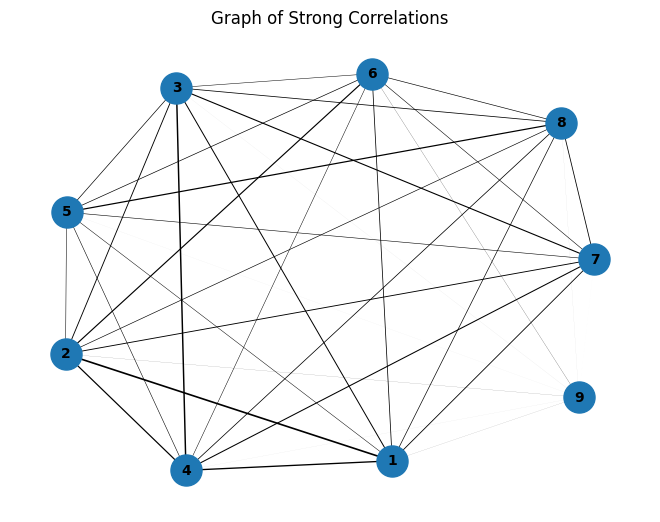

In [93]:
# Set a threshold for correlation strength (adjust as needed)
threshold = 0.1

# Create an empty graph
G = nx.Graph()

# Add nodes (assuming you have 9 nodes)
nodes = range(1, 10)  # Adjust based on your number of features
G.add_nodes_from(nodes)

# Prune weak correlations and add edges
for i in range(len(symptom_corr_matrix2)):
    for j in range(i + 1, len(symptom_corr_matrix2)):
        if abs(symptom_corr_matrix2[i, j]) >= threshold:
            G.add_edge(i + 1, j + 1, weight=symptom_corr_matrix2[i, j])
            
# Get edge weights
edge_weights = [abs(G[u][v]['weight']) for u, v in G.edges()]

# Calculate mean and standard deviation of edge weights
mean_weight = np.mean(edge_weights)
std_weight = np.std(edge_weights)

# Calculate z-scores for edge weights
edge_weights_z = [(weight - mean_weight) / std_weight for weight in edge_weights]

# make the min value 0
# edge_weights = [weight - np.min(edge_weights_z) + 1e-8 for weight in edge_weights_z]

edge_weights_z_adj = [((weight - np.min(edge_weights_z))/(np.max(edge_weights_z) - np.min(edge_weights_z)) + 0.075)**2.5 for weight in edge_weights_z ]


# Draw the graph
pos = nx.spring_layout(G, weight='weight', k=25)  # Adjust layout if needed
# nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold')
# Draw the graph with edge thickness based on weights
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold',
        width=edge_weights_z_adj, edge_vmin=min(edge_weights_z_adj), edge_vmax=max(edge_weights_z_adj))

# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# labels = nx.get_edge_attributes(G, 'weight')
# edge_labels = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Graph of Strong Correlations")
plt.show()


(array([7., 1., 0., 4., 8., 5., 4., 4., 1., 2.]),
 array([0.005625, 0.120625, 0.235625, 0.350625, 0.465625, 0.580625,
        0.695625, 0.810625, 0.925625, 1.040625, 1.155625]),
 <BarContainer object of 10 artists>)

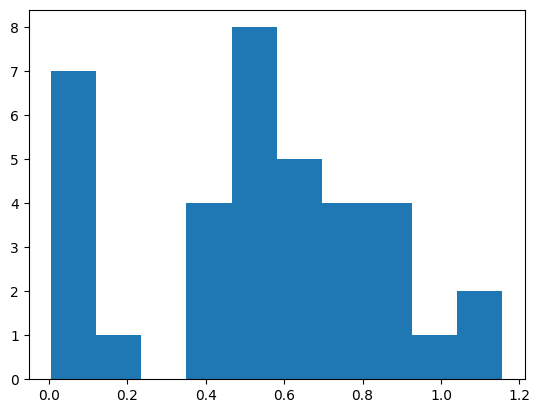

In [91]:
plt.hist(edge_weights_z_adj)

(array([2., 3., 2., 1., 0., 3., 9., 7., 6., 3.]),
 array([-2.28970514, -1.91221836, -1.53473159, -1.15724481, -0.77975804,
        -0.40227126, -0.02478449,  0.35270229,  0.73018906,  1.10767584,
         1.48516261]),
 <BarContainer object of 10 artists>)

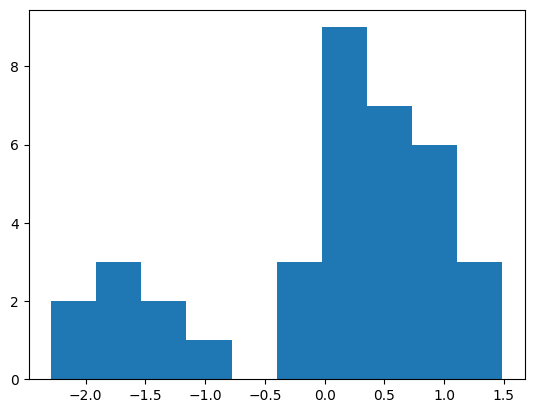

In [92]:
plt.hist(edge_weights_z)

## Error Analysis

In [21]:
gpt4_df['score_phq9'] = gpt4_df[score_columns].sum(axis=1)
expert1_df['score_phq9'] = expert1_df[score_columns].sum(axis=1)
expert2_df['score_phq9'] = expert2_df[score_columns].sum(axis=1)
self_report_df['score_phq9'] = self_report_df[score_columns].sum(axis=1)

In [22]:
gpt4_sr_df = pd.merge(gpt4_df[['user_id', 'score_phq9']], self_report_df[['user_id', 'score_phq9']], on='user_id', suffixes=('_gpt4', '_self_report'))
gpt4_sr_diff = gpt4_sr_df.score_phq9_gpt4 - gpt4_sr_df.score_phq9_self_report
gpt4_sr_diff_expert_annotated = gpt4_sr_df[gpt4_sr_df.user_id.isin(expert1_df.user_id)].score_phq9_gpt4 - gpt4_sr_df[gpt4_sr_df.user_id.isin(expert1_df.user_id)].score_phq9_self_report

expert1_sr_df = pd.merge(expert1_df[['user_id', 'score_phq9']], self_report_df[['user_id', 'score_phq9']], on='user_id', suffixes=('_expert1', '_self_report'))
expert1_sr_diff = expert1_sr_df.score_phq9_expert1 - expert1_sr_df.score_phq9_self_report

expert2_sr_df = pd.merge(expert2_df[['user_id', 'score_phq9']], self_report_df[['user_id', 'score_phq9']], on='user_id', suffixes=('_expert2', '_self_report'))
expert2_sr_diff = expert2_sr_df.score_phq9_expert2 - expert2_sr_df.score_phq9_self_report

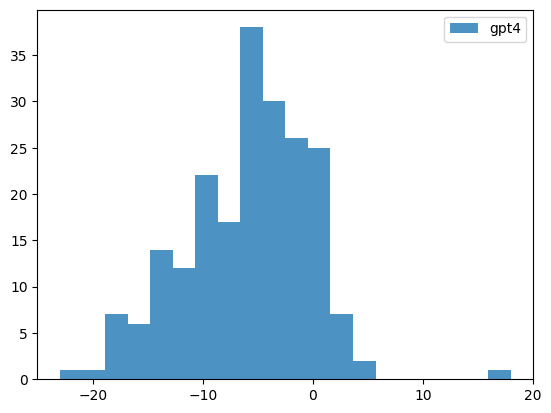

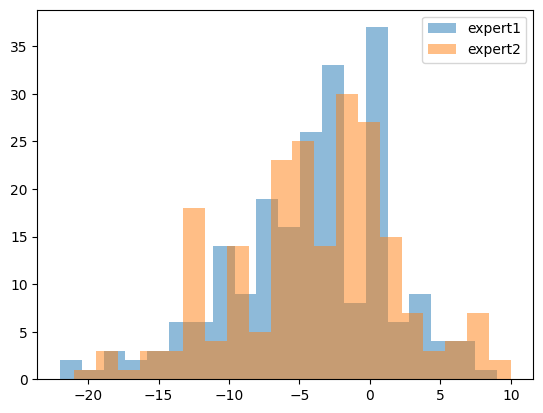

In [23]:
# Plot hist of all three differences in three different plots
plt.hist(gpt4_sr_diff_expert_annotated, bins=20, alpha=0.8, label='gpt4')
plt.legend(loc='upper right')
plt.show()

plt.hist(expert1_sr_diff, bins=20, alpha=0.5, label='expert1')
plt.hist(expert2_sr_diff, bins=20, alpha=0.5, label='expert2')
plt.legend(loc='upper right')
plt.show()


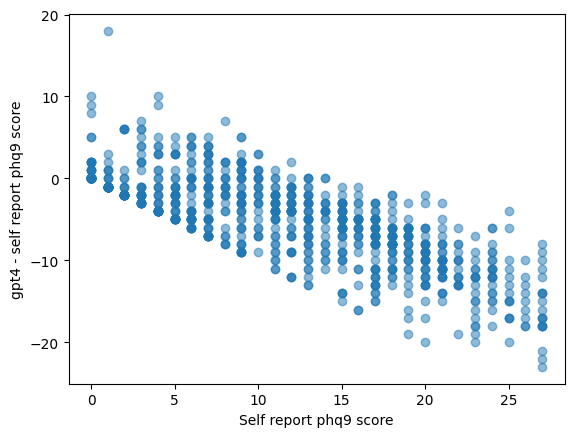

In [24]:
# scatter plot of gpt4 diff (y) vs self report phq9 score (x)
plt.scatter(temp3.score_phq9_self_report, gpt4_sr_diff, alpha=0.5)
plt.xlabel('Self report phq9 score')
plt.ylabel('gpt4 - self report phq9 score')
plt.show() 

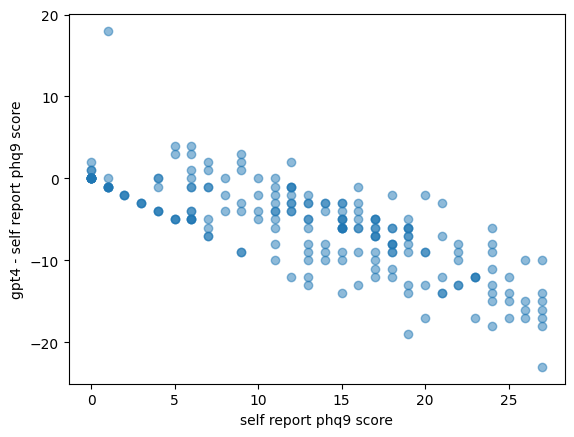

In [25]:
# scatter plot of gpt4 diff (y) vs expert1 phq9 score (x) for expert annotated user_ids
plt.scatter(temp3[temp3.user_id.isin(expert1_df.user_id)].score_phq9_self_report, gpt4_sr_diff_expert_annotated, alpha=0.5)
plt.xlabel('self report phq9 score')
plt.ylabel('gpt4 - self report phq9 score')
plt.show()

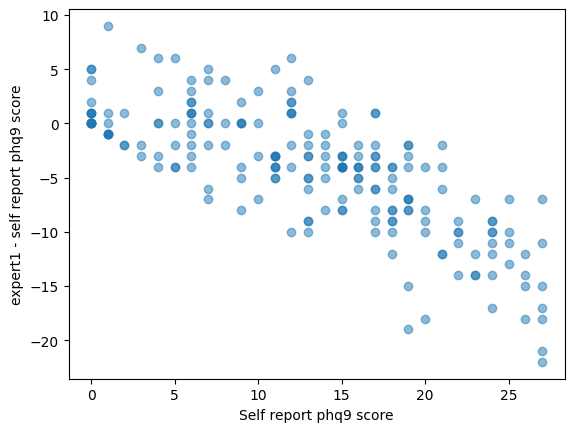

In [26]:
# scatter plot of expert1 diff (y) vs self report phq9 score (x)
plt.scatter(expert1_temp.score_phq9_self_report, expert1_sr_diff, alpha=0.5)
plt.xlabel('Self report phq9 score')
plt.ylabel('expert1 - self report phq9 score')
plt.show()

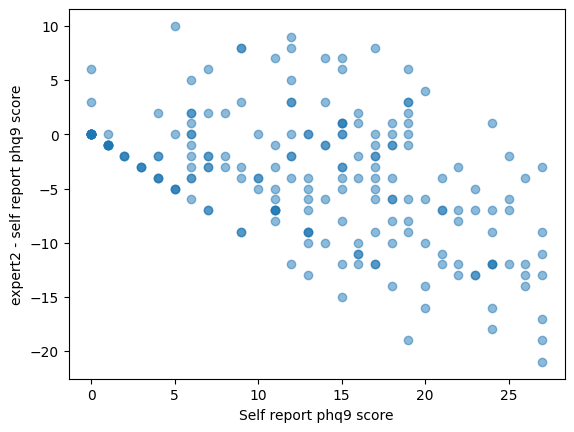

In [27]:
# scatter plot of expert2 diff (y) vs self report phq9 score (x)
plt.scatter(expert2_temp.score_phq9_self_report, expert2_sr_diff, alpha=0.5)
plt.xlabel('Self report phq9 score')
plt.ylabel('expert2 - self report phq9 score')
plt.show()

In [28]:
# Print the descriptive stats for all three diffs
print (gpt4_sr_diff_expert_annotated.describe())
print (expert1_sr_diff.describe())
print (expert2_sr_diff.describe())

count    209.000000
mean      -5.837321
std        5.535058
min      -23.000000
25%       -9.000000
50%       -5.000000
75%       -2.000000
max       18.000000
dtype: float64
count    209.000000
mean      -4.244019
std        5.663036
min      -22.000000
25%       -8.000000
50%       -4.000000
75%        0.000000
max        9.000000
dtype: float64
count    209.000000
mean      -3.894737
std        5.915139
min      -21.000000
25%       -7.000000
50%       -3.000000
75%        0.000000
max       10.000000
dtype: float64


In [28]:
gpt4_sr_df['diff_gpt4_sr'] = gpt4_sr_df.score_phq9_gpt4 - gpt4_sr_df.score_phq9_self_report
expert1_sr_df['diff_expert1_sr'] = expert1_sr_df.score_phq9_expert1 - expert1_sr_df.score_phq9_self_report
expert2_sr_df['diff_expert2_sr'] = expert2_sr_df.score_phq9_expert2 - expert2_sr_df.score_phq9_self_report

In [30]:
gpt4_expert1_df = pd.merge(gpt4_df[['user_id', 'score_phq9']], expert1_df[['user_id', 'score_phq9']], on='user_id', suffixes=('_gpt4', '_expert1'))
gpt4_expert1_df['diff_gpt4_expert1'] = gpt4_expert1_df.score_phq9_gpt4 - gpt4_expert1_df.score_phq9_expert1

gpt4_expert2_df = pd.merge(gpt4_df[['user_id', 'score_phq9']], expert2_df[['user_id', 'score_phq9']], on='user_id', suffixes=('_gpt4', '_expert2'))
gpt4_expert2_df['diff_gpt4_expert2'] = gpt4_expert2_df.score_phq9_gpt4 - gpt4_expert2_df.score_phq9_expert2

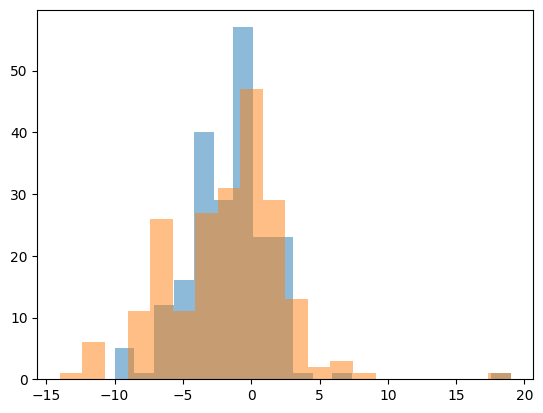

In [31]:
# plot the diff_gpt4_expert1 and diff_gpt4_expert2 on the same histogram plot
plt.hist(gpt4_expert1_df.diff_gpt4_expert1, bins=20, alpha=0.5, label='gpt4-expert1')
plt.hist(gpt4_expert2_df.diff_gpt4_expert2, bins=20, alpha=0.5, label='gpt4-expert2')
plt.show()

In [35]:
gpt4_expert1_df.describe(), gpt4_expert2_df.describe()

(          user_id  score_phq9_gpt4  score_phq9_expert1  diff_gpt4_expert1
 count  209.000000       209.000000          209.000000         209.000000
 mean   527.708134         7.114833            8.708134          -1.593301
 std    282.426464         4.895663            5.011140           3.167162
 min     24.000000         0.000000            0.000000         -10.000000
 25%    292.000000         2.000000            5.000000          -3.000000
 50%    537.000000         8.000000            9.000000          -1.000000
 75%    774.000000        11.000000           12.000000           0.000000
 max    976.000000        19.000000           20.000000          19.000000,
           user_id  score_phq9_gpt4  score_phq9_expert2  diff_gpt4_expert2
 count  209.000000       209.000000          209.000000         209.000000
 mean   527.708134         7.114833            9.057416          -1.942584
 std    282.426464         4.895663            6.992892           4.185202
 min     24.000000      

In [43]:
print ("0th and 15th percentile values for the difference between gpt4 estimate and expert1: \n", gpt4_expert1_df.diff_gpt4_expert1.quantile([0.00, 0.15]))
print ("0th and 15th percentile values for the difference between gpt4 estimate and expert2: \n", gpt4_expert2_df.diff_gpt4_expert2.quantile([0.00, 0.15]))

0th and 15th percentile values for the difference between gpt4 estimate and expert1: 
 0.00   -10.0
0.15    -5.0
Name: diff_gpt4_expert1, dtype: float64
0th and 15th percentile values for the difference between gpt4 estimate and expert2: 
 0.00   -14.0
0.15    -6.0
Name: diff_gpt4_expert2, dtype: float64


In [91]:
def return_analysis_df_for_diff_range(diff_df, diff_col, diff_range):
    lower_bound, upper_bound = diff_range
    users_in_range = diff_df[(diff_df[diff_col] >= lower_bound) & (diff_df[diff_col] <= upper_bound)].user_id.tolist()
    diff_df_filtered = diff_df[diff_df.user_id.isin(users_in_range)]
    diff_df_filtered = pd.merge(self_report_df[['user_id', 'user_text', 'score_phq9']], diff_df_filtered, on='user_id')
    diff_df_filtered['diff_gpt4_sr'] = diff_df_filtered.score_phq9_gpt4 - diff_df_filtered.score_phq9
    diff_df_filtered['diff_expert_sr'] = diff_df_filtered.score_phq9_expert1 - diff_df_filtered.score_phq9 if 'expert1' in diff_col else diff_df_filtered.score_phq9_expert2 - diff_df_filtered.score_phq9
    diff_df_filtered['diff_gpt4_sr_abs'] = diff_df_filtered['diff_gpt4_sr'].abs()
    diff_df_filtered['diff_expert_sr_abs'] = diff_df_filtered['diff_expert_sr'].abs()
    return diff_df_filtered

gpt4_expert1_analysis_df = return_analysis_df_for_diff_range(gpt4_expert1_df, 'diff_gpt4_expert1', (-20, 20))
gpt4_expert2_analysis_df = return_analysis_df_for_diff_range(gpt4_expert2_df, 'diff_gpt4_expert2', (-20, 20))

In [104]:
diff_df = pd.merge(gpt4_expert1_df, gpt4_expert2_df[['user_id', 'score_phq9_expert2', 'diff_gpt4_expert2']], on='user_id')
diff_df = pd.merge(self_report_df[['user_id', 'user_text', 'score_phq9']], diff_df, on='user_id')
diff_df['diff_gpt4_sr'] = diff_df.score_phq9_gpt4 - diff_df.score_phq9
diff_df['diff_expert1_sr'] = diff_df.score_phq9_expert1 - diff_df.score_phq9
diff_df['diff_expert2_sr'] = diff_df.score_phq9_expert2 - diff_df.score_phq9
diff_df['diff_gpt4_sr_abs'] = diff_df['diff_gpt4_sr'].abs()
diff_df['diff_expert1_sr_abs'] = diff_df['diff_expert1_sr'].abs()
diff_df['diff_expert2_sr_abs'] = diff_df['diff_expert2_sr'].abs()

In [113]:
diff_df[(diff_df.diff_gpt4_sr_abs>=8) & ((diff_df.diff_expert1_sr_abs<6)|(diff_df.diff_expert2_sr_abs<6))].sort_values(['diff_expert1_sr_abs', 'diff_expert2_sr_abs', 'diff_gpt4_sr_abs'], ascending=[True, True, False]).to_csv('../data/diff_error_analysis_1.csv', index=False)
diff_df[(diff_df.diff_gpt4_sr_abs>=8) & ((diff_df.diff_expert1_sr_abs<6)|(diff_df.diff_expert2_sr_abs<6))].sort_values(['diff_expert1_sr_abs', 'diff_expert2_sr_abs', 'diff_gpt4_sr_abs'], ascending=[True, True, False])

user_id                                          user_text  score_phq9  \
62       356  Depression is a state I'll never pray for my e...         1.0   
91       480  The last week has been hard, I have not wanted...        19.0   
177      860  Feeling like I have no purpose, constantly tir...        21.0   
8         66  Occasionally I have felt down as I am struggli...        13.0   
4         40  I believe have been depressed. I have found mo...        18.0   
204      966  I believe I have been depressed over the last ...        17.0   
79       422  I have been some depressed. because my chronic...        14.0   
131      682  Luckily I've been better than I have been over...        11.0   
208      976  I have not been depressed in the past 2 weeks ...        15.0   
193      928  over the last two weeks i have felt depressed ...        14.0   
73       397  No i have not be depressed over the last two w...        11.0   
184      886  There are some days that are worse than others...        13.0   
81       428  I am not depressed at all. I am having good ti...         9.0   
47       255  Lately due the lack of physical social interac...        16.0   
119      608  Yes, I have been depressed over the last two w...        17.0   
99       509  I have been depressed in the last couple of we...        18.0   
68       376  I have been very depressed intact almost at ve...        27.0   
97       499  I have occasional days or even just moments of...        19.0   
35       193  I've been clinically depressed for about 4 yea...        23.0   
174      848  Yes I’ve felt low and I knew it would pass but...        15.0   
126      651  i would say i have been depressed for well ove...        24.0   
143      723  I have struggled with depression for many year...        22.0   
164      811  Completely depressed on two days where I felt ...        25.0   
113      573  Over the last few weeks I have experienced pro...        26.0   

     score_phq9_gpt4  score_phq9_expert1  diff_gpt4_expert1  \
62                19                 0.0               19.0   
91                11                17.0               -6.0   
177                9                19.0              -10.0   
8                  5                10.0               -5.0   
4                 10                14.0               -4.0   
204                7                13.0               -6.0   
79                 5                10.0               -5.0   
131                3                 7.0               -4.0   
208                6                11.0               -5.0   
193                4                 9.0               -5.0   
73                 1                 6.0               -5.0   
184                1                 8.0               -7.0   
81                 0                 4.0               -4.0   
47                 3                11.0               -8.0   
119                8                11.0               -3.0   
99                10                12.0               -2.0   
68                17                20.0               -3.0   
97                10                12.0               -2.0   
35                11                16.0               -5.0   
174                5                 8.0               -3.0   
126               16                15.0                1.0   
143               13                12.0                1.0   
164               11                14.0               -3.0   
113               16                14.0                2.0   

     score_phq9_expert2  diff_gpt4_expert2  diff_gpt4_sr  diff_expert1_sr  \
62                  0.0               19.0          18.0             -1.0   
91                 19.0               -8.0          -8.0             -2.0   
177                17.0               -8.0         -12.0             -2.0   
8                   4.0                1.0          -8.0             -3.0   
4                  17.0               -7.0          -8.0            

In [115]:
diff_df[(diff_df.diff_gpt4_sr_abs<6) & ((diff_df.diff_expert1_sr_abs>=8)|(diff_df.diff_expert2_sr_abs>=8))].sort_values(['diff_gpt4_sr_abs', 'diff_expert1_sr_abs', 'diff_expert2_sr_abs'], ascending=[True, False, False])

user_id                                          user_text  score_phq9  \
37       198  This previous week's, i have been calm, relax,...         1.0   
102      518  Hopefully I've formatted everything correctly ...        12.0   
16        92  Since 2018 i've experienced severe depressive ...        16.0   
52       292  i feel its all my fault for trying to get thin...         9.0   
138      707  I have been clinically diagnosed with depressi...        12.0   
101      512  Yes I would say I have been depressed but it h...         9.0   
5         45  My depression is something I've learnt to live...         5.0   

     score_phq9_gpt4  score_phq9_expert1  diff_gpt4_expert1  \
37                 0                10.0              -10.0   
102               11                18.0               -7.0   
16                15                12.0                3.0   
52                10                11.0               -1.0   
138               14                14.0                0.0   
101               11                 9.0                2.0   
5                  9                11.0               -2.0   

     score_phq9_expert2  diff_gpt4_expert2  diff_gpt4_sr  diff_expert1_sr  \
37                  0.0                0.0          -1.0              9.0   
102                20.0               -9.0          -1.0              6.0   
16                  6.0                9.0          -1.0             -4.0   
52                 17.0               -7.0           1.0              2.0   
138                21.0               -7.0           2.0              2.0   
101                17.0               -6.0           2.0              0.0   
5                  15.0               -6.0           4.0              6.0   

     diff_expert2_sr  diff_gpt4_sr_abs  diff_expert1_sr_abs  \
37              -1.0               1.0                  9.0   
102              8.0               1.0                  6.0   
16             -10.0               1.0                  4.0   
52               8.0               1.0                  2.0   
138              9.0               2.0                  2.0   
101              8.0               2.0                  0.0   
5               10.0               4.0                  6.0   

     diff_expert2_sr_abs  
37                   1.0  
102                  8.0  
16                  10.0  
52                   8.0  
138                  9.0  
101                  8.0  
5                   10.0

In [118]:
diff_df[(diff_df.diff_gpt4_sr_abs<diff_df.diff_expert1_sr_abs-4) | (diff_df.diff_gpt4_sr_abs<diff_df.diff_expert2_sr_abs-4)].sort_values(['diff_gpt4_sr_abs', 'diff_expert1_sr_abs', 'diff_expert2_sr_abs'], ascending=[True, False, False]).to_csv('../data/diff_error_analysis_2.csv', index=False)
diff_df[(diff_df.diff_gpt4_sr_abs<diff_df.diff_expert1_sr_abs-4) | (diff_df.diff_gpt4_sr_abs<diff_df.diff_expert2_sr_abs-4)].sort_values(['diff_gpt4_sr_abs', 'diff_expert1_sr_abs', 'diff_expert2_sr_abs'], ascending=[True, False, False])

user_id                                          user_text  score_phq9  \
206      972  There has been time when I have not wanted to ...        11.0   
89       459  For thr 2 weeks I sometimes have thr thought t...         0.0   
37       198  This previous week's, i have been calm, relax,...         1.0   
102      518  Hopefully I've formatted everything correctly ...        12.0   
16        92  Since 2018 i've experienced severe depressive ...        16.0   
52       292  i feel its all my fault for trying to get thin...         9.0   
49       282  I've been depressed unkowningly in the past we...        11.0   
138      707  I have been clinically diagnosed with depressi...        12.0   
101      512  Yes I would say I have been depressed but it h...         9.0   
5         45  My depression is something I've learnt to live...         5.0   
17       102  Over the past 2 weeks my depression has become...        24.0   
42       233  I initially did not feel that I had been depre...        16.0   
192      921  Yes. I've been depressed because I feel useles...        20.0   
208      976  I have not been depressed in the past 2 weeks ...        15.0   

     score_phq9_gpt4  score_phq9_expert1  diff_gpt4_expert1  \
206               11                16.0               -5.0   
89                 0                 5.0               -5.0   
37                 0                10.0              -10.0   
102               11                18.0               -7.0   
16                15                12.0                3.0   
52                10                11.0               -1.0   
49                 9                 7.0                2.0   
138               14                14.0                0.0   
101               11                 9.0                2.0   
5                  9                11.0               -2.0   
17                18                12.0                6.0   
42                10                11.0               -1.0   
192               11                11.0                0.0   
208                6                11.0               -5.0   

     score_phq9_expert2  diff_gpt4_expert2  diff_gpt4_sr  diff_expert1_sr  \
206                18.0               -7.0           0.0              5.0   
89                  6.0               -6.0           0.0              5.0   
37                  0.0                0.0          -1.0              9.0   
102                20.0               -9.0          -1.0              6.0   
16                  6.0                9.0          -1.0             -4.0   
52                 17.0               -7.0           1.0              2.0   
49                  4.0                5.0          -2.0             -4.0   
138                21.0               -7.0           2.0              2.0   
101                17.0               -6.0           2.0              0.0   
5                  15.0               -6.0           4.0              6.0   
17                 12.0                6.0          -6.0            -12.0   
42                  4.0                6.0          -6.0             -5.0   
192                 6.0                5.0          -9.0             -9.0   
208                 0.0                6.0          -9.0             -4.0   

     diff_expert2_sr  diff_gpt4_sr_abs  diff_expert1_sr_abs  \
206              7.0               0.0                  5.0   
89               6.0               0.0                  5.0   
37              -1.0               1.0                  9.0   
102              8.0               1.0                  6.0   
16             -10.0               1.0                  4.0   
52               8.0               1.0                  2.0   
49              -7.0               2.0                  4.0   
138              9.0               2.0                  2.0   
101              8.0               2.0                  0.0   
5               10.0               4.0                  6.0   
17             -12.0    